# COVID-19 járvány terjedésének előrejelzése Közép-Kelet Európában Facebook mobilitási adatok segítségével

In [2]:
# Vizsgált országok: Covid-19 adatok és adatkeretek létrehozása

'''
Albánia, Bulgária, Görögország, Csehország, 
Magyarország, Lengyelország, Románia, Szlovákia, 
Szlovénia, Észtország, Lettország, Litvánia


1, Hungary -     HUN - kész
2, Albánia -     ALB - kész
3, Görögország - GRC - kész
4, Csehország  - CZE - kész
5, Lengyelország - POL - kész
6, Románia - ROU - kész
7, Szlovákia - SVK - kész
8, Szlovénia - SVN - kész
9, Észtország - EST - kész
10,Lettország - LVA - kész
11, Litvánia - LTU - kész
12, Bulgária - BGR - kész
'''

'\nAlbánia, Bulgária, Görögország, Csehország, \nMagyarország, Lengyelország, Románia, Szlovákia, \nSzlovénia, Észtország, Lettország, Litvánia\n\n\n1, Hungary -     HUN - kész\n2, Albánia -     ALB - kész\n3, Görögország - GRC - kész\n4, Csehország  - CZE - kész\n5, Lengyelország - POL - kész\n6, Románia - ROU - kész\n7, Szlovákia - SVK - kész\n8, Szlovénia - SVN - kész\n9, Észtország - EST - kész\n10,Lettország - LVA - kész\n11, Litvánia - LTU - kész\n12, Bulgária - BGR - kész\n'

In [3]:
# A szükséges csomagok betöltése az adatok beolvasásához

import pandas as pd
import numpy as np

In [4]:
# Adatok beolvasása: 2020-as és 2021 év

c_data_all = pd.read_excel(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\covid_19_adatok\owid-covid-data.xlsx', parse_dates=['date'], index_col = 'date')

In [5]:
# az összes sor és összes oszlop megjelenítése

#pd.options.display.max_columns = None # összes oszlop megjelenítése
#pd.options.display.max_rows = None # összes sor megjelenítése

In [6]:
# Az oszlopok neveinek kiírása

c_data_all.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [7]:
# Annak ellenőrzése, hogy az egyes változók hány hiányzó értéket tartalmaznak

c_data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116102 entries, 2020-02-24 to 2021-09-11
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               116102 non-null  object 
 1   continent                              110785 non-null  object 
 2   location                               116102 non-null  object 
 3   total_cases                            110469 non-null  float64
 4   new_cases                              110466 non-null  float64
 5   new_cases_smoothed                     109451 non-null  float64
 6   total_deaths                           99837 non-null   float64
 7   new_deaths                             99992 non-null   float64
 8   new_deaths_smoothed                    109451 non-null  float64
 9   total_cases_per_million                109886 non-null  float64
 10  new_cases_per_million                  1

In [8]:
# Pozitívitási arány kiszámítása és változóba történő elhelyezése a c_adatok_all adatkeretben-ben a 2020-as évre

c_data_all['covid_positivity_rate'] = c_data_all['new_cases'] / c_data_all['new_tests']

In [9]:
# Halálozási arány kiszámítása és változóba történő elhelyezése a c_adatok_all dataframe-ben

c_data_all['covid_death_rate'] = c_data_all['new_deaths'] / c_data_all['population']

In [10]:
#  a c_data_all adatkeret index típusának ellenőrzése

print(type(c_data_all.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [11]:
# dataframe létrehozása a 2020-as adatokra

c_data_all_2020 = c_data_all.loc['2020-04-01':'2020-12-31']

In [12]:
# dataframe létrehozása a 2021-es adatokra

c_data_all_2021 = c_data_all.loc['2021-01-01':'2021-09-30']

In [13]:
# Minden orszgára létrehozásra kerül a COVID-19 változókkal

# az első sorban szűrűnk az országra, a másodikban a szükséges változókra, míg a harmadik sorban átnevezzük a változókat

In [14]:
# Albánia ALB


c_data_all_filtered_2020_ALB = c_data_all_2020[c_data_all_2020['iso_code'] == 'ALB']

c_data_all_filtered_2020_ALB = c_data_all_filtered_2020_ALB[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_ALB = c_data_all_filtered_2020_ALB.rename(columns={'covid_positivity_rate':'ALB_covid_positivity_rate', 'covid_death_rate':'ALB_covid_death_rate'})


In [15]:
# Bulgária BGR


c_data_all_filtered_2020_BGR = c_data_all_2020[c_data_all_2020['iso_code'] == 'BGR']

c_data_all_filtered_2020_BGR = c_data_all_filtered_2020_BGR[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_BGR = c_data_all_filtered_2020_BGR.rename(columns={'covid_positivity_rate':'BGR_covid_positivity_rate', 'covid_death_rate':'BGR_covid_death_rate'})


In [16]:
# Csehország CZE


c_data_all_filtered_2020_CZE = c_data_all_2020[c_data_all_2020['iso_code'] == 'CZE']

c_data_all_filtered_2020_CZE = c_data_all_filtered_2020_CZE[['new_cases', 'covid_death_rate']]

c_data_all_filtered_2020_CZE = c_data_all_filtered_2020_CZE.rename(columns={'covid_positivity_rate':'CZE_covid_positivity_rate','covid_death_rate':'CZE_covid_death_rate'})

##################################

# mivel a pozitivitási arány több hiányzó értéket tartalmaz, ezért a napi esetszámok lesznek használva

In [17]:
# Észtország EST


c_data_all_filtered_2020_EST = c_data_all_2020[c_data_all_2020['iso_code'] == 'EST']

c_data_all_filtered_2020_EST = c_data_all_filtered_2020_EST[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_EST = c_data_all_filtered_2020_EST.rename(columns={'covid_positivity_rate':'EST_covid_positivity_rate','covid_death_rate':'EST_covid_death_rate'})


In [18]:
# Görögország GRC


c_data_all_filtered_2020_GRC = c_data_all_2020[c_data_all_2020['iso_code'] == 'GRC']

c_data_all_filtered_2020_GRC = c_data_all_filtered_2020_GRC[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_GRC = c_data_all_filtered_2020_GRC.rename(columns={'covid_positivity_rate':'GRC_covid_positivity_rate','covid_death_rate':'GRC_covid_death_rate'})


In [19]:
# Lengyelország POL


c_data_all_filtered_2020_POL = c_data_all_2020[c_data_all_2020['iso_code'] == 'POL']

c_data_all_filtered_2020_POL = c_data_all_filtered_2020_POL[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_POL = c_data_all_filtered_2020_POL.rename(columns={'covid_positivity_rate':'POL_covid_positivity_rate','covid_death_rate':'POL_covid_death_rate'})


In [20]:
# Lettország LVA


c_data_all_filtered_2020_LVA = c_data_all_2020[c_data_all_2020['iso_code'] == 'LVA']

c_data_all_filtered_2020_LVA = c_data_all_filtered_2020_LVA[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_LVA = c_data_all_filtered_2020_LVA.rename(columns={'covid_positivity_rate':'LVA_covid_positivity_rate','covid_death_rate':'LVA_covid_death_rate'})


In [21]:
# Litvánia LTU


c_data_all_filtered_2020_LTU = c_data_all_2020[c_data_all_2020['iso_code'] == 'LTU']

c_data_all_filtered_2020_LTU = c_data_all_filtered_2020_LTU[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_LTU = c_data_all_filtered_2020_LTU.rename(columns={'covid_positivity_rate':'LTU_covid_positivity_rate','covid_death_rate':'LTU_covid_death_rate'})


In [22]:
# Magyarország HUN


c_data_all_filtered_2020_HUN = c_data_all_2020[c_data_all_2020['iso_code'] == 'HUN']

c_data_all_filtered_2020_HUN = c_data_all_filtered_2020_HUN[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_HUN = c_data_all_filtered_2020_HUN.rename(columns={'covid_positivity_rate':'HUN_covid_positivity_rate', 'covid_death_rate':'HUN_covid_death_rate'})


In [23]:
# Románia ROU


c_data_all_filtered_2020_ROU = c_data_all_2020[c_data_all_2020['iso_code'] == 'ROU']

c_data_all_filtered_2020_ROU = c_data_all_filtered_2020_ROU[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_ROU = c_data_all_filtered_2020_ROU.rename(columns={'covid_positivity_rate':'ROU_covid_positivity_rate','covid_death_rate':'ROU_covid_death_rate'})


In [24]:
# Szlovákia SVK


c_data_all_filtered_2020_SVK = c_data_all_2020[c_data_all_2020['iso_code'] == 'SVK']

c_data_all_filtered_2020_SVK = c_data_all_filtered_2020_SVK[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_SVK = c_data_all_filtered_2020_SVK.rename(columns={'covid_positivity_rate':'SVK_covid_positivity_rate', 'covid_death_rate':'SVK_covid_death_rate'})


In [25]:
# Szlovénie SVN


c_data_all_filtered_2020_SVN = c_data_all_2020[c_data_all_2020['iso_code'] == 'SVN']

c_data_all_filtered_2020_SVN = c_data_all_filtered_2020_SVN[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_SVN = c_data_all_filtered_2020_SVN.rename(columns={'covid_positivity_rate':'SVN_covid_positivity_rate','covid_death_rate':'SVN_covid_death_rate'})


In [26]:
#############################################################################################
#############################################################################################
#############################################################################################


# A most következő részben a 2021-es évre is létrehozásra kerülnek az adatkeretek a COVID-19 változókkal

In [27]:
# Albánia ALB


c_data_all_filtered_2021_ALB = c_data_all_2021[c_data_all_2021['iso_code'] == 'ALB']

c_data_all_filtered_2021_ALB = c_data_all_filtered_2021_ALB[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2021_ALB = c_data_all_filtered_2021_ALB.rename(columns={'covid_positivity_rate':'ALB_covid_positivity_rate', 'covid_death_rate':'ALB_covid_death_rate'})

# A ALB_people_fully_vaccinated és ALB_people_vaccinated változókat nem vizsgáljuk, mivel több hiányzó érték van ezen változókban

In [28]:
# Bulgária BGR


c_data_all_filtered_2021_BGR = c_data_all_2021[c_data_all_2021['iso_code'] == 'BGR']

c_data_all_filtered_2021_BGR = c_data_all_filtered_2021_BGR[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_BGR = c_data_all_filtered_2021_BGR.rename(columns={'covid_positivity_rate':'BGR_covid_positivity_rate', 'covid_death_rate':'BGR_covid_death_rate', 'people_fully_vaccinated':'BGR_people_fully_vaccinated', 'people_vaccinated':'BGR_people_vaccinated'})


In [29]:
# Csehország CZE


c_data_all_filtered_2021_CZE = c_data_all_2021[c_data_all_2021['iso_code'] == 'CZE']

c_data_all_filtered_2021_CZE = c_data_all_filtered_2021_CZE[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated' ]]

c_data_all_filtered_2021_CZE = c_data_all_filtered_2021_CZE.rename(columns={'covid_positivity_rate':'CZE_covid_positivity_rate','covid_death_rate':'CZE_covid_death_rate', 'people_fully_vaccinated':'CZE_people_fully_vaccinated', 'people_vaccinated':'CZE_people_vaccinated'})


In [30]:
# Észtország EST


c_data_all_filtered_2021_EST = c_data_all_2021[c_data_all_2021['iso_code'] == 'EST']

c_data_all_filtered_2021_EST = c_data_all_filtered_2021_EST[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_EST = c_data_all_filtered_2021_EST.rename(columns={'covid_positivity_rate':'EST_covid_positivity_rate','covid_death_rate':'EST_covid_death_rate', 'people_fully_vaccinated':'EST_people_fully_vaccinated', 'people_vaccinated':'EST_people_vaccinated' })


In [31]:
# Görögország GRC


c_data_all_filtered_2021_GRC = c_data_all_2021[c_data_all_2021['iso_code'] == 'GRC']

c_data_all_filtered_2021_GRC = c_data_all_filtered_2021_GRC[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_GRC = c_data_all_filtered_2021_GRC.rename(columns={'covid_positivity_rate':'GRC_covid_positivity_rate','covid_death_rate':'GRC_covid_death_rate', 'people_fully_vaccinated':'GRC_people_fully_vaccinated', 'people_vaccinated':'GRC_people_vaccinated'})


In [32]:
# Lengyelország POL


c_data_all_filtered_2021_POL = c_data_all_2021[c_data_all_2021['iso_code'] == 'POL']

c_data_all_filtered_2021_POL = c_data_all_filtered_2021_POL[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_POL = c_data_all_filtered_2021_POL.rename(columns={'covid_positivity_rate':'POL_covid_positivity_rate','covid_death_rate':'POL_covid_death_rate', 'people_fully_vaccinated':'POL_people_fully_vaccinated', 'people_vaccinated':'POL_people_vaccinated'})


In [33]:
# Lettország LVA


c_data_all_filtered_2021_LVA = c_data_all_2021[c_data_all_2021['iso_code'] == 'LVA']

c_data_all_filtered_2021_LVA = c_data_all_filtered_2021_LVA[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_LVA = c_data_all_filtered_2021_LVA.rename(columns={'covid_positivity_rate':'LVA_covid_positivity_rate','covid_death_rate':'LVA_covid_death_rate', 'people_fully_vaccinated':'LVA_people_fully_vaccinated', 'people_vaccinated':'LVA_people_vaccinated'})
c_data_all_filtered_2021_LVA

,LVA_covid_positivity_rate,LVA_covid_death_rate,LVA_people_fully_vaccinated,LVA_people_vaccinated
date,,,,
2021-01-01,0.179545,0.000005,1.0,2327.0
2021-01-02,0.125701,0.000013,1.0,2329.0
2021-01-03,0.096336,0.000006,1.0,2333.0
2021-01-04,0.111892,0.000006,1.0,3039.0
2021-01-05,0.066710,0.000016,1.0,3934.0
...,...,...,...,...
2021-09-07,NaN,0.000002,777894.0,869869.0
2021-09-08,NaN,0.000002,781692.0,873107.0
2021-09-09,NaN,0.000002,784375.0,875811.0


In [34]:
# Litvánia LTU


c_data_all_filtered_2021_LTU = c_data_all_2021[c_data_all_2021['iso_code'] == 'LTU']

c_data_all_filtered_2021_LTU = c_data_all_filtered_2021_LTU[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_LTU = c_data_all_filtered_2021_LTU.rename(columns={'covid_positivity_rate':'LTU_covid_positivity_rate','covid_death_rate':'LTU_covid_death_rate', 'people_fully_vaccinated':'LTU_people_fully_vaccinated', 'people_vaccinated':'LTU_people_vaccinated'})


In [35]:
# Magyarország HUN


c_data_all_filtered_2021_HUN = c_data_all_2021[c_data_all_2021['iso_code'] == 'HUN']

c_data_all_filtered_2021_HUN = c_data_all_filtered_2021_HUN[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_HUN = c_data_all_filtered_2021_HUN.rename(columns={'covid_positivity_rate':'HUN_covid_positivity_rate', 'covid_death_rate':'HUN_covid_death_rate', 'people_fully_vaccinated':'HUN_people_fully_vaccinated', 'people_vaccinated':'HUN_people_vaccinated' })


In [36]:
# Románia ROU


c_data_all_filtered_2021_ROU = c_data_all_2021[c_data_all_2021['iso_code'] == 'ROU']

c_data_all_filtered_2021_ROU = c_data_all_filtered_2021_ROU[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_ROU = c_data_all_filtered_2021_ROU.rename(columns={'covid_positivity_rate':'ROU_covid_positivity_rate','covid_death_rate':'ROU_covid_death_rate', 'people_fully_vaccinated':'ROU_people_fully_vaccinated', 'people_vaccinated':'ROU_people_vaccinated'})


In [37]:
# Szlovákia SVK


c_data_all_filtered_2021_SVK = c_data_all_2021[c_data_all_2021['iso_code'] == 'SVK']

c_data_all_filtered_2021_SVK = c_data_all_filtered_2021_SVK[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_SVK = c_data_all_filtered_2021_SVK.rename(columns={'covid_positivity_rate':'SVK_covid_positivity_rate', 'covid_death_rate':'SVK_covid_death_rate', 'people_fully_vaccinated':'SVK_people_fully_vaccinated', 'people_vaccinated':'SVK_people_vaccinated'})


In [38]:
# Szlovénia SVN


c_data_all_filtered_2021_SVN = c_data_all_2021[c_data_all_2021['iso_code'] == 'SVN']

c_data_all_filtered_2021_SVN = c_data_all_filtered_2021_SVN[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_SVN = c_data_all_filtered_2021_SVN.rename(columns={'covid_positivity_rate':'SVN_covid_positivity_rate','covid_death_rate':'SVN_covid_death_rate', 'people_fully_vaccinated':'SVN_people_fully_vaccinated', 'people_vaccinated':'SVN_people_vaccinated'})


In [39]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [40]:
# Facebook adatok beolvasása egy változóba, 2020-as év

f_data_all_2020 = pd.read_table(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\mobilitási adatok\2020\movement-range-data-2020-03-01-2020-12-31\movement_range_data_2020_03_01__2020_12_31.txt', parse_dates=['ds'], index_col = 'ds')

C:\Users\Piros\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [41]:
# Az adatszerkezett
f_data_all_2020.shape

(5229342, 8)

In [42]:
# Betekintés az adatokba, első és utolsó sorok megtekintése.

f_data_all_2020

,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
ds,,,,,,,,
2020-03-01,AGO,GADM,AGO.10.10_1,Lubango,-0.02992,0.18751,full_february,DAY_OF_WEEK
2020-03-02,AGO,GADM,AGO.10.10_1,Lubango,0.06746,0.10521,full_february,DAY_OF_WEEK
2020-03-03,AGO,GADM,AGO.10.10_1,Lubango,0.05873,0.11397,full_february,DAY_OF_WEEK
2020-03-04,AGO,GADM,AGO.10.10_1,Lubango,0.01288,0.10492,full_february,DAY_OF_WEEK
2020-03-05,AGO,GADM,AGO.10.10_1,Lubango,0.02753,0.11056,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...
2020-12-12,ZWE,GADM,ZWE.9.1_1,Beitbridge,0.08277,0.09513,full_february,DAY_OF_WEEK
2020-12-13,ZWE,GADM,ZWE.9.1_1,Beitbridge,0.03378,0.09936,full_february,DAY_OF_WEEK
2020-12-17,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.00025,0.08457,full_february,DAY_OF_WEEK


In [43]:
# Az ds átnevezése date -re.

f_data_all_2020 = f_data_all_2020.rename_axis('date')

In [44]:
# Index típus kiíratása. Fontos, hogy datetime legyen.

print(type(f_data_all_2020.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [45]:
# A Facebook által előállított adatok NUT3-as szinten vannak.
# Az adott országon belüli adatok átlagolásra kerülnek minden napra.

# Az első sorban adott országra szűrjük az adatokat, majd átlagoljuk azokat minden napra, az utolsó sorban perdin az oszlopok átnevezése történik meg

In [46]:
# Magyarország HUN


f_data_2020_HUN = f_data_all_2020[f_data_all_2020['country'] == 'HUN']

f_data_2020_HUN_mean = f_data_2020_HUN.groupby('date').mean()

f_data_2020_HUN_mean = f_data_2020_HUN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'HUN_all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users':'HUN_all_day_ratio_single_tile_users'})


In [47]:
# Albánia ALB


f_data_2020_ALB = f_data_all_2020[f_data_all_2020['country'] == 'ALB']

f_data_2020_ALB_mean = f_data_2020_ALB.groupby('date').mean()

f_data_2020_ALB_mean = f_data_2020_ALB_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ALB_all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users':'ALB_all_day_ratio_single_tile_users'})


In [48]:
# Bulgária BGR


f_data_2020_BGR = f_data_all_2020[f_data_all_2020['country'] == 'BGR']

f_data_2020_BGR_mean = f_data_2020_BGR.groupby('date').mean()

f_data_2020_BGR_mean = f_data_2020_BGR_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'BGR_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'BGR_all_day_ratio_single_tile_users'})


In [49]:
# Csehország CZE


f_data_2020_CZE = f_data_all_2020[f_data_all_2020['country'] == 'CZE']

f_data_2020_CZE_mean = f_data_2020_CZE.groupby('date').mean()

f_data_2020_CZE_mean = f_data_2020_CZE_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'CZE_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'CZE_all_day_ratio_single_tile_users'})


In [50]:
# Észtország EST



f_data_2020_EST = f_data_all_2020[f_data_all_2020['country'] == 'EST']

f_data_2020_EST_mean = f_data_2020_EST.groupby('date').mean()

f_data_2020_EST_mean = f_data_2020_EST_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'EST_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'EST_all_day_ratio_single_tile_users'})


In [51]:
# Görögország GRC


f_data_2020_GRC = f_data_all_2020[f_data_all_2020['country'] == 'GRC']

f_data_2020_GRC_mean = f_data_2020_GRC.groupby('date').mean()

f_data_2020_GRC_mean = f_data_2020_GRC_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'GRC_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'GRC_all_day_ratio_single_tile_users'})


In [52]:
# Lengyelország POL


f_data_2020_POL = f_data_all_2020[f_data_all_2020['country'] == 'POL']

f_data_2020_POL_mean = f_data_2020_POL.groupby('date').mean()

f_data_2020_POL_mean = f_data_2020_POL_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'POL_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'POL_all_day_ratio_single_tile_users'})


In [53]:
# Lettország LVA


f_data_2020_LVA = f_data_all_2020[f_data_all_2020['country'] == 'LVA']

f_data_2020_LVA_mean = f_data_2020_LVA.groupby('date').mean()

f_data_2020_LVA_mean = f_data_2020_LVA_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LVA_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LVA_all_day_ratio_single_tile_users'})


In [54]:
# Litvánia LTU


f_data_2020_LTU = f_data_all_2020[f_data_all_2020['country'] == 'LTU']

f_data_2020_LTU_mean = f_data_2020_LTU.groupby('date').mean()

f_data_2020_LTU_mean = f_data_2020_LTU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LTU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LTU_all_day_ratio_single_tile_users'})


In [55]:
# Románia ROU


f_data_2020_ROU = f_data_all_2020[f_data_all_2020['country'] == 'ROU']

f_data_2020_ROU_mean = f_data_2020_ROU.groupby('date').mean()

f_data_2020_ROU_mean = f_data_2020_ROU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ROU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ROU_all_day_ratio_single_tile_users'})


In [56]:
# Szlovákia SVK



f_data_2020_SVK = f_data_all_2020[f_data_all_2020['country'] == 'SVK']

f_data_2020_SVK_mean = f_data_2020_SVK.groupby('date').mean()

f_data_2020_SVK_mean = f_data_2020_SVK_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVK_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVK_all_day_ratio_single_tile_users'})


In [57]:
# Szlovénia SVN


f_data_2020_SVN = f_data_all_2020[f_data_all_2020['country'] == 'SVN']

f_data_2020_SVN_mean = f_data_2020_SVN.groupby('date').mean()

f_data_2020_SVN_mean = f_data_2020_SVN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVN_all_day_ratio_single_tile_users'})


In [58]:
# A 2021-es Facebook adatok

In [59]:
# Adatok betöltése változóba


f_data_all_2021 = pd.read_table(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\mobilitási adatok\2021\movement-range-data-2021-09-30\movement-range-2021-09-30.txt', parse_dates=['ds'], index_col = 'ds')

C:\Users\Piros\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [60]:
# Az ds átnevezése date -re

f_data_all_2021 = f_data_all_2021.rename_axis('date')

In [61]:
# Betekintés az adatokba

f_data_all_2021


,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
date,,,,,,,,
2021-01-01,AGO,GADM,AGO.10.10_1,Lubango,-0.35291,0.25398,full_february,DAY_OF_WEEK
2021-01-02,AGO,GADM,AGO.10.10_1,Lubango,-0.06131,0.17330,full_february,DAY_OF_WEEK
2021-01-03,AGO,GADM,AGO.10.10_1,Lubango,-0.00392,0.21932,full_february,DAY_OF_WEEK
2021-01-04,AGO,GADM,AGO.10.10_1,Lubango,0.15114,0.11662,full_february,DAY_OF_WEEK
2021-01-05,AGO,GADM,AGO.10.10_1,Lubango,0.12696,0.10832,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...
2021-09-27,ZWE,GADM,ZWE.6.6_1,Zvimba,0.20534,0.16060,full_february,DAY_OF_WEEK
2021-09-29,ZWE,GADM,ZWE.6.6_1,Zvimba,0.15277,0.16781,full_february,DAY_OF_WEEK
2021-04-27,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.16900,0.09390,full_february,DAY_OF_WEEK


In [62]:
# Albánia ALB


f_data_all_2021_ALB = f_data_all_2021[f_data_all_2021['country'] == 'ALB']

f_data_2021_ALB_mean = f_data_all_2021_ALB.groupby('date').mean()

f_data_2021_ALB_mean = f_data_2021_ALB_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ALB_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ALB_all_day_ratio_single_tile_users'})


In [63]:
# Bulgária BGR


f_data_all_2021_BGR = f_data_all_2021[f_data_all_2021['country'] == 'BGR']

f_data_2021_BGR_mean = f_data_all_2021_BGR.groupby('date').mean()

f_data_2021_BGR_mean = f_data_2021_BGR_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'BGR_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'BGR_all_day_ratio_single_tile_users'})


In [64]:
# Csehország CZE 


f_data_all_2021_CZE = f_data_all_2021[f_data_all_2021['country'] == 'CZE']

f_data_2021_CZE_mean = f_data_all_2021_CZE.groupby('date').mean()

f_data_2021_CZE_mean = f_data_2021_CZE_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'CZE_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'CZE_all_day_ratio_single_tile_users'})


In [65]:
# Észtország EST


f_data_all_2021_EST = f_data_all_2021[f_data_all_2021['country'] == 'EST']

f_data_2021_EST_mean = f_data_all_2021_EST.groupby('date').mean()

f_data_2021_EST_mean = f_data_2021_EST_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'EST_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'EST_all_day_ratio_single_tile_users'})


In [66]:
# Görögország GRC


f_data_all_2021_GRC = f_data_all_2021[f_data_all_2021['country'] == 'GRC']

f_data_2021_GRC_mean = f_data_all_2021_GRC.groupby('date').mean()

f_data_2021_GRC_mean = f_data_2021_GRC_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'GRC_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'GRC_all_day_ratio_single_tile_users'})


In [67]:
# Lengyelország POL


f_data_all_2021_POL = f_data_all_2021[f_data_all_2021['country'] == 'POL']

f_data_2021_POL_mean = f_data_all_2021_POL.groupby('date').mean()

f_data_2021_POL_mean = f_data_2021_POL_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'POL_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'POL_all_day_ratio_single_tile_users'})


In [68]:
# Lettország LVA


f_data_all_2021_LVA = f_data_all_2021[f_data_all_2021['country'] == 'LVA']

f_data_2021_LVA_mean = f_data_all_2021_LVA.groupby('date').mean()

f_data_2021_LVA_mean = f_data_2021_LVA_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LVA_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LVA_all_day_ratio_single_tile_users'})
f_data_2021_LVA_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2021-01-01 to 2021-09-30
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_all_day_bing_tiles_visited_relative_change  273 non-null    float64
 1   LVA_all_day_ratio_single_tile_users             273 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [69]:
# Litvánia LTU


f_data_all_2021_LTU = f_data_all_2021[f_data_all_2021['country'] == 'LTU']

f_data_2021_LTU_mean = f_data_all_2021_LTU.groupby('date').mean()

f_data_2021_LTU_mean = f_data_2021_LTU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LTU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LTU_all_day_ratio_single_tile_users'})


In [70]:
# Magyarország HUN


f_data_all_2021_HUN = f_data_all_2021[f_data_all_2021['country'] == 'HUN']

f_data_2021_HUN_mean = f_data_all_2021_HUN.groupby('date').mean()

f_data_2021_HUN_mean = f_data_2021_HUN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'HUN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'HUN_all_day_ratio_single_tile_users'})



In [71]:
# Románia ROU


f_data_all_2021_ROU = f_data_all_2021[f_data_all_2021['country'] == 'ROU']

f_data_2021_ROU_mean = f_data_all_2021_ROU.groupby('date').mean()

f_data_2021_ROU_mean = f_data_2021_ROU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ROU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ROU_all_day_ratio_single_tile_users'})


In [72]:
# Szlovákia SVK


f_data_all_2021_SVK = f_data_all_2021[f_data_all_2021['country'] == 'SVK']

f_data_2021_SVK_mean = f_data_all_2021_SVK.groupby('date').mean()

f_data_2021_SVK_mean = f_data_2021_SVK_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVK_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVK_all_day_ratio_single_tile_users'})


In [73]:
# Szlovénia SVN


f_data_all_2021_SVN = f_data_all_2021[f_data_all_2021['country'] == 'SVN']

f_data_2021_SVN_mean = f_data_all_2021_SVN.groupby('date').mean()

f_data_2021_SVN_mean = f_data_2021_SVN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVN_all_day_ratio_single_tile_users'})


# Adatkeretek létrehozása

## 2020

In [74]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################


# VAR modellhez Dataframek létrehozása a 2020-as év

# 04.01 és 12.31 közötti időszak
# 04.01 és 09.30 közötti időszak
# 10.01 és 12.31 közötti időszak


In [75]:
# ALB

var_ALB_2020 = pd.concat([c_data_all_filtered_2020_ALB, f_data_2020_ALB_mean], axis = 1)

var_ALB_2020_fully = var_ALB_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_ALB_2020_04_to_09 = var_ALB_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_ALB_2020_10_to_12 = var_ALB_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [76]:
# Információ az adatkeretben található változókról

var_ALB_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       183 non-null    float64
 1   ALB_covid_death_rate                            183 non-null    float64
 2   ALB_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ALB_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [77]:
# Információ az adatkeretben található változókról

var_ALB_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       92 non-null     float64
 1   ALB_covid_death_rate                            92 non-null     float64
 2   ALB_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ALB_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [78]:
# Bulgária BGR

var_BGR_2020 = pd.concat([c_data_all_filtered_2020_BGR, f_data_2020_BGR_mean], axis = 1)

var_BGR_2020_fully = var_BGR_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_BGR_2020_04_to_09 = var_BGR_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_BGR_2020_10_to_12 = var_BGR_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [79]:
var_BGR_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       120 non-null    float64
 1   BGR_covid_death_rate                            183 non-null    float64
 2   BGR_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   BGR_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [80]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_BGR_2020_04_to_09_linear_interpolate = var_BGR_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [81]:
# Információ az adatkeretben található változókról

var_BGR_2020_04_to_09_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       183 non-null    float64
 1   BGR_covid_death_rate                            183 non-null    float64
 2   BGR_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   BGR_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [82]:
# Információ az adatkeretben található változókról

var_BGR_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       88 non-null     float64
 1   BGR_covid_death_rate                            92 non-null     float64
 2   BGR_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   BGR_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [83]:
# Mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_BGR_2020_10_to_12_linear_interpolate = var_BGR_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [84]:
# Információ az adatkeretben található változókról

var_BGR_2020_10_to_12_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       92 non-null     float64
 1   BGR_covid_death_rate                            92 non-null     float64
 2   BGR_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   BGR_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [85]:
# Csehország CZE

var_CZE_2020 = pd.concat([c_data_all_filtered_2020_CZE, f_data_2020_CZE_mean], axis=1)

var_CZE_2020_fully = var_CZE_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_CZE_2020_04_to_09 = var_CZE_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_CZE_2020_10_to_12 = var_CZE_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [86]:
# Információ az adatkeretben található változókról

# Több hiányzó érték, ezért nem alkalmazzuk a lináris interpolációt a pozitivitási arány változóra. A pozitivitási arány változó helyett a új napi esetszámokkat használjuk

var_CZE_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       183 non-null    float64
 1   CZE_covid_death_rate                            183 non-null    float64
 2   CZE_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   CZE_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [87]:
# Információ az adatkeretben található változókról

var_CZE_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       92 non-null     float64
 1   CZE_covid_death_rate                            92 non-null     float64
 2   CZE_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   CZE_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [88]:
# Észtország EST

var_EST_2020 = pd.concat([c_data_all_filtered_2020_EST, f_data_2020_EST_mean], axis = 1)

var_EST_2020_fully = var_EST_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_EST_2020_04_to_09 = var_EST_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_EST_2020_10_to_12 = var_EST_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [89]:
# Információ az adatkeretben található változókról

var_EST_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       183 non-null    float64
 1   EST_covid_death_rate                            183 non-null    float64
 2   EST_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   EST_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [90]:
# Információ az adatkeretben található változókról

var_EST_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       92 non-null     float64
 1   EST_covid_death_rate                            92 non-null     float64
 2   EST_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   EST_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [91]:
# Görögország GRC

var_GRC_2020 = pd.concat([c_data_all_filtered_2020_GRC, f_data_2020_GRC_mean], axis = 1)

var_GRC_2020_fully = var_GRC_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_GRC_2020_04_to_09 = var_GRC_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_GRC_2020_10_to_12 = var_GRC_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [92]:
# Információ az adatkeretben található változókról

var_GRC_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       146 non-null    float64
 1   GRC_covid_death_rate                            183 non-null    float64
 2   GRC_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   GRC_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [93]:
# Mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra.

var_GRC_2020_04_to_09_linear_interpolate = var_GRC_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [94]:
# Információ az adatkeretben található változókról

var_GRC_2020_04_to_09_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       183 non-null    float64
 1   GRC_covid_death_rate                            183 non-null    float64
 2   GRC_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   GRC_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [95]:
# Információ az adatkeretben található változókról

var_GRC_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       87 non-null     float64
 1   GRC_covid_death_rate                            92 non-null     float64
 2   GRC_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   GRC_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [96]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_GRC_2020_10_to_12_linear_interpolate = var_GRC_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [97]:
# Információ az adatkeretben található változókról

var_GRC_2020_10_to_12_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       92 non-null     float64
 1   GRC_covid_death_rate                            92 non-null     float64
 2   GRC_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   GRC_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [98]:
# Lengyelország POL

var_POL_2020 = pd.concat([c_data_all_filtered_2020_POL, f_data_2020_POL_mean], axis = 1)

var_POL_2020_fully = var_POL_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_POL_2020_04_to_09 = var_POL_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_POL_2020_10_to_12 = var_POL_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [99]:
var_POL_2020_fully_linear_interpolate = var_POL_2020_fully.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')
var_POL_2020_fully_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2020-04-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       275 non-null    float64
 1   POL_covid_death_rate                            275 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  275 non-null    float64
 3   POL_all_day_ratio_single_tile_users             275 non-null    float64
dtypes: float64(4)
memory usage: 10.7 KB


In [100]:
# Információ az adatkeretben található változókról

var_POL_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       153 non-null    float64
 1   POL_covid_death_rate                            183 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   POL_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [101]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_POL_2020_04_to_09_linear_interpolate = var_POL_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')


In [102]:
# mivel nincs kezdeti érték, ezért mindössze két hiányzó érték kerülhetet feltöltésre
# mivel továbbra van hiányzó érték az elejéről, ezért ezeket a rekordokat eltválolítjuk az adatkeretből
#var_POL_2020_04_to_09 = var_POL_2020_04_to_09.dropna()
var_POL_2020_04_to_09_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       183 non-null    float64
 1   POL_covid_death_rate                            183 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   POL_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [103]:
# Információ az adatkeretben található változókról

var_POL_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       92 non-null     float64
 1   POL_covid_death_rate                            92 non-null     float64
 2   POL_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   POL_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [104]:
# Lettország LVA

var_LVA_2020 = pd.concat([c_data_all_filtered_2020_LVA, f_data_2020_LVA_mean], axis = 1)

var_LVA_2020_fully = var_LVA_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_LVA_2020_04_to_09 = var_LVA_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_LVA_2020_10_to_12 = var_LVA_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak

var_LVA_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       92 non-null     float64
 1   LVA_covid_death_rate                            92 non-null     float64
 2   LVA_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   LVA_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [105]:
# Információ az adatkeretben található változókról

var_LVA_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       183 non-null    float64
 1   LVA_covid_death_rate                            181 non-null    float64
 2   LVA_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LVA_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [106]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_LVA_2020_04_to_09_linear_interpolate = var_LVA_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [107]:
# Információ az adatkeretben található változókról

var_LVA_2020_04_to_09_linear_interpolate.info()# az első értékek hiányoznak halálozási arány változóban, ezért nem tudjuk alkalmazni a lineáris interpolációt


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       183 non-null    float64
 1   LVA_covid_death_rate                            183 non-null    float64
 2   LVA_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LVA_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [108]:
# Litvánia LTU

var_LTU_2020 = pd.concat([c_data_all_filtered_2020_LTU, f_data_2020_LTU_mean], axis = 1)

var_LTU_2020_fully = var_LTU_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_LTU_2020_04_to_09 = var_LTU_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_LTU_2020_10_to_12 = var_LTU_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [109]:
# Információ az adatkeretben található változókról

var_LTU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       183 non-null    float64
 1   LTU_covid_death_rate                            183 non-null    float64
 2   LTU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LTU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [110]:
# Információ az adatkeretben található változókról

var_LTU_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       92 non-null     float64
 1   LTU_covid_death_rate                            92 non-null     float64
 2   LTU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   LTU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [111]:
# HUN

var_HUN_2020 = pd.concat([c_data_all_filtered_2020_HUN, f_data_2020_HUN_mean], axis = 1)

var_HUN_2020_fully = var_HUN_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_HUN_2020_04_to_09 = var_HUN_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_HUN_2020_10_to_12 = var_HUN_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

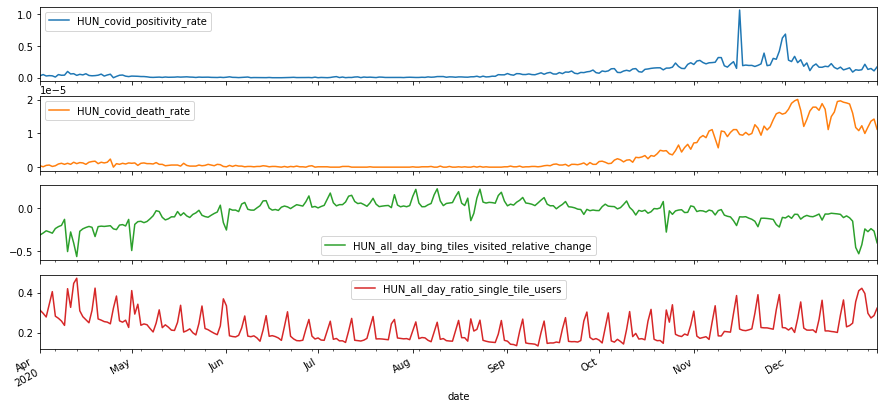

In [112]:
var_HUN_2020_fully.plot(subplots=True, figsize = (15,7))

In [113]:
# Információ az adatkeretben található változókról

var_HUN_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       183 non-null    float64
 1   HUN_covid_death_rate                            183 non-null    float64
 2   HUN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   HUN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [114]:
# Információ az adatkeretben található változókról

var_HUN_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       92 non-null     float64
 1   HUN_covid_death_rate                            92 non-null     float64
 2   HUN_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   HUN_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [115]:
# ROU

var_ROU_2020 = pd.concat([c_data_all_filtered_2020_ROU, f_data_2020_ROU_mean], axis = 1)

var_ROU_2020_fully = var_ROU_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_ROU_2020_04_to_09 = var_ROU_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_ROU_2020_10_to_12 = var_ROU_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [116]:
# Információ az adatkeretben található változókról

var_ROU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       167 non-null    float64
 1   ROU_covid_death_rate                            183 non-null    float64
 2   ROU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ROU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [117]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_ROU_2020_04_to_09_linear_interpolate = var_ROU_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_area='inside')

In [118]:
# Információ az adatkeretben található változókról

var_ROU_2020_04_to_09_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       183 non-null    float64
 1   ROU_covid_death_rate                            183 non-null    float64
 2   ROU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ROU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [119]:
# Információ az adatkeretben található változókról

var_ROU_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       62 non-null     float64
 1   ROU_covid_death_rate                            92 non-null     float64
 2   ROU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ROU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [120]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_ROU_2020_10_to_12_linear_interpolate = var_ROU_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [121]:
# Információ az adatkeretben található változókról

var_ROU_2020_10_to_12_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       92 non-null     float64
 1   ROU_covid_death_rate                            92 non-null     float64
 2   ROU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ROU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [122]:
# SVK


var_SVK_2020 = pd.concat([c_data_all_filtered_2020_SVK, f_data_2020_SVK_mean], axis = 1)

var_SVK_2020_fully = var_SVK_2020['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_SVK_2020_04_to_09 = var_SVK_2020['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_SVK_2020_10_to_12 = var_SVK_2020['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [123]:
# Információ az adatkeretben található változókról

var_SVK_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       183 non-null    float64
 1   SVK_covid_death_rate                            183 non-null    float64
 2   SVK_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVK_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [124]:
# Információ az adatkeretben található változókról

var_SVK_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       92 non-null     float64
 1   SVK_covid_death_rate                            92 non-null     float64
 2   SVK_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   SVK_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [125]:
# SVN


var_SVN_2020 = pd.concat([c_data_all_filtered_2020_SVN, f_data_2020_SVN_mean], axis = 1)

var_SVN_2020_fully = var_SVN_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_SVN_2020_04_to_09 = var_SVN_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_SVN_2020_10_to_12 = var_SVN_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [126]:
# Információ az adatkeretben található változókról

var_SVN_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       183 non-null    float64
 1   SVN_covid_death_rate                            183 non-null    float64
 2   SVN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [127]:
# Információ az adatkeretben található változókról

var_SVN_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       92 non-null     float64
 1   SVN_covid_death_rate                            92 non-null     float64
 2   SVN_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   SVN_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


# Adatkeretek létrehozása

## 2021

In [128]:
# Albánia ALB


var_ALB_2021 = pd.concat([c_data_all_filtered_2021_ALB, f_data_2021_ALB_mean], axis = 1)

var_ALB_2021 = var_ALB_2021.loc['2021-01-01':'2021-08-31']


In [129]:
# Információ az adatkeretben található változókról

var_ALB_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       162 non-null    float64
 1   ALB_covid_death_rate                            243 non-null    float64
 2   ALB_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 3   ALB_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [130]:
var_ALB_2021_linear_interpolate = var_ALB_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [131]:
var_ALB_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       243 non-null    float64
 1   ALB_covid_death_rate                            243 non-null    float64
 2   ALB_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 3   ALB_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [132]:
# Bulgária

var_BGR_2021 = pd.concat([c_data_all_filtered_2021_BGR, f_data_2021_BGR_mean], axis=1)

var_BGR_2021 = var_BGR_2021.loc['2021-01-01':'2021-08-31']


In [133]:
# Információ az adatkeretben található változókról

var_BGR_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       172 non-null    float64
 1   BGR_covid_death_rate                            243 non-null    float64
 2   BGR_people_fully_vaccinated                     212 non-null    float64
 3   BGR_people_vaccinated                           211 non-null    float64
 4   BGR_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   BGR_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [134]:
var_BGR_2021_linear_interpolate = var_BGR_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [135]:
var_BGR_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       243 non-null    float64
 1   BGR_covid_death_rate                            243 non-null    float64
 2   BGR_people_fully_vaccinated                     243 non-null    float64
 3   BGR_people_vaccinated                           243 non-null    float64
 4   BGR_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   BGR_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [136]:
# Csehország CZE

var_CZE_2021 = pd.concat([c_data_all_filtered_2021_CZE, f_data_2021_CZE_mean], axis=1)

var_CZE_2021 = var_CZE_2021.loc['2021-01-01':'2021-08-31']


In [137]:
# Információ az adatkeretben található változókról

var_CZE_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CZE_covid_positivity_rate                       243 non-null    float64
 1   CZE_covid_death_rate                            243 non-null    float64
 2   CZE_people_fully_vaccinated                     234 non-null    float64
 3   CZE_people_vaccinated                           243 non-null    float64
 4   CZE_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   CZE_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [138]:
var_CZE_2021_linear_interpolate = var_CZE_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [139]:
var_CZE_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CZE_covid_positivity_rate                       243 non-null    float64
 1   CZE_covid_death_rate                            243 non-null    float64
 2   CZE_people_fully_vaccinated                     243 non-null    float64
 3   CZE_people_vaccinated                           243 non-null    float64
 4   CZE_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   CZE_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [140]:
# Észtország EST

var_EST_2021 = pd.concat([c_data_all_filtered_2021_EST, f_data_2021_EST_mean], axis = 1)

var_EST_2021 = var_EST_2021.loc['2021-01-01':'2021-08-31']


In [141]:
# Információ az adatkeretben található változókról

var_EST_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       243 non-null    float64
 1   EST_covid_death_rate                            243 non-null    float64
 2   EST_people_fully_vaccinated                     239 non-null    float64
 3   EST_people_vaccinated                           243 non-null    float64
 4   EST_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   EST_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [142]:
var_EST_2021_linear_interpolate = var_EST_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [143]:
var_EST_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       243 non-null    float64
 1   EST_covid_death_rate                            243 non-null    float64
 2   EST_people_fully_vaccinated                     243 non-null    float64
 3   EST_people_vaccinated                           243 non-null    float64
 4   EST_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   EST_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [144]:
# Görögország GRC

var_GRC_2021 = pd.concat([c_data_all_filtered_2021_GRC, f_data_2021_GRC_mean], axis = 1)

var_GRC_2021 = var_GRC_2021.loc['2021-01-01':'2021-08-31']



In [145]:
# Információ az adatkeretben található változókról

var_GRC_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       225 non-null    float64
 1   GRC_covid_death_rate                            243 non-null    float64
 2   GRC_people_fully_vaccinated                     209 non-null    float64
 3   GRC_people_vaccinated                           224 non-null    float64
 4   GRC_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   GRC_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [146]:
var_GRC_2021_linear_interpolate = var_GRC_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [147]:
var_GRC_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       243 non-null    float64
 1   GRC_covid_death_rate                            243 non-null    float64
 2   GRC_people_fully_vaccinated                     243 non-null    float64
 3   GRC_people_vaccinated                           243 non-null    float64
 4   GRC_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   GRC_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [148]:
# Lengyelország POL

var_POL_2021 = pd.concat([c_data_all_filtered_2021_POL, f_data_2021_POL_mean], axis = 1)

var_POL_2021 = var_POL_2021.loc['2021-01-01':'2021-08-31']

In [149]:
# Információ az adatkeretben található változókról

var_POL_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       237 non-null    float64
 1   POL_covid_death_rate                            243 non-null    float64
 2   POL_people_fully_vaccinated                     190 non-null    float64
 3   POL_people_vaccinated                           205 non-null    float64
 4   POL_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   POL_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [150]:
var_POL_2021_linear_interpolate = var_POL_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [151]:
var_POL_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       243 non-null    float64
 1   POL_covid_death_rate                            243 non-null    float64
 2   POL_people_fully_vaccinated                     243 non-null    float64
 3   POL_people_vaccinated                           243 non-null    float64
 4   POL_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   POL_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [152]:
# Lettország LVA

var_LVA_2021 = pd.concat([c_data_all_filtered_2021_LVA, f_data_2021_LVA_mean],axis=1)

var_LVA_2021 = var_LVA_2021.loc['2021-01-01':'2021-08-31']


In [153]:
# Információ az adatkeretben található változókról

var_LVA_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       239 non-null    float64
 1   LVA_covid_death_rate                            243 non-null    float64
 2   LVA_people_fully_vaccinated                     243 non-null    float64
 3   LVA_people_vaccinated                           243 non-null    float64
 4   LVA_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   LVA_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [154]:
var_LVA_2021_linear_interpolate = var_LVA_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [155]:
var_LVA_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       243 non-null    float64
 1   LVA_covid_death_rate                            243 non-null    float64
 2   LVA_people_fully_vaccinated                     243 non-null    float64
 3   LVA_people_vaccinated                           243 non-null    float64
 4   LVA_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   LVA_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [156]:
# Litvánia LTU

var_LTU_2021 = pd.concat([c_data_all_filtered_2021_LTU, f_data_2021_LTU_mean], axis = 1)

var_LTU_2021 = var_LTU_2021.loc['2021-01-01':'2021-08-31']



In [157]:
# Információ az adatkeretben található változókról

var_LTU_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       243 non-null    float64
 1   LTU_covid_death_rate                            243 non-null    float64
 2   LTU_people_fully_vaccinated                     227 non-null    float64
 3   LTU_people_vaccinated                           243 non-null    float64
 4   LTU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   LTU_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [158]:
var_LTU_2021_linear_interpolate = var_LTU_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [159]:
var_LTU_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       243 non-null    float64
 1   LTU_covid_death_rate                            243 non-null    float64
 2   LTU_people_fully_vaccinated                     243 non-null    float64
 3   LTU_people_vaccinated                           243 non-null    float64
 4   LTU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   LTU_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [160]:
# Magyarország HUN

var_HUN_2021 = pd.concat([c_data_all_filtered_2021_HUN, f_data_2021_HUN_mean], axis = 1)

var_HUN_2021 = var_HUN_2021.loc['2021-01-01':'2021-08-31']


In [161]:
# Információ az adatkeretben található változókról

var_HUN_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       218 non-null    float64
 1   HUN_covid_death_rate                            243 non-null    float64
 2   HUN_people_fully_vaccinated                     186 non-null    float64
 3   HUN_people_vaccinated                           186 non-null    float64
 4   HUN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   HUN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [162]:
var_HUN_2021_linear_interpolate = var_HUN_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [163]:
var_HUN_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       243 non-null    float64
 1   HUN_covid_death_rate                            243 non-null    float64
 2   HUN_people_fully_vaccinated                     243 non-null    float64
 3   HUN_people_vaccinated                           243 non-null    float64
 4   HUN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   HUN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

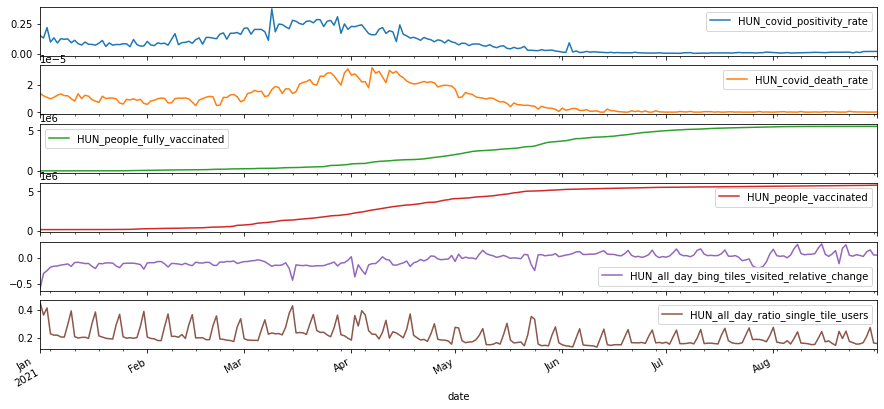

In [164]:
var_HUN_2021_linear_interpolate.plot(subplots=True, figsize=(15,7))

In [165]:
# Románia ROU

var_ROU_2021 = pd.concat([c_data_all_filtered_2021_ROU, f_data_2021_ROU_mean], axis = 1)

var_ROU_2021 = var_ROU_2021.loc['2021-01-01':'2021-08-31']


In [166]:
# Információ az adatkeretben található változókról

var_ROU_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       148 non-null    float64
 1   ROU_covid_death_rate                            243 non-null    float64
 2   ROU_people_fully_vaccinated                     220 non-null    float64
 3   ROU_people_vaccinated                           236 non-null    float64
 4   ROU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   ROU_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [167]:
var_ROU_2021_linear_interpolate = var_ROU_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [168]:
var_ROU_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       243 non-null    float64
 1   ROU_covid_death_rate                            243 non-null    float64
 2   ROU_people_fully_vaccinated                     243 non-null    float64
 3   ROU_people_vaccinated                           243 non-null    float64
 4   ROU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   ROU_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [169]:
# Szlovákia SVK

var_SVK_2021 = pd.concat([c_data_all_filtered_2021_SVK, f_data_2021_SVK_mean], axis = 1)

var_SVK_2021 = var_SVK_2021.loc['2021-01-01':'2021-08-31']


In [170]:
# Információ az adatkeretben található változókról

var_SVK_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       243 non-null    float64
 1   SVK_covid_death_rate                            243 non-null    float64
 2   SVK_people_fully_vaccinated                     226 non-null    float64
 3   SVK_people_vaccinated                           240 non-null    float64
 4   SVK_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVK_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [171]:
var_SVK_2021_linear_interpolate = var_SVK_2021.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [172]:
var_SVK_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       243 non-null    float64
 1   SVK_covid_death_rate                            243 non-null    float64
 2   SVK_people_fully_vaccinated                     243 non-null    float64
 3   SVK_people_vaccinated                           243 non-null    float64
 4   SVK_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVK_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [173]:
# Szlovénia SVN

var_SVN_2021 = pd.concat([c_data_all_filtered_2021_SVN, f_data_2021_SVN_mean], axis = 1)

var_SVN_2021 = var_SVN_2021.loc['2021-01-01':'2021-08-31']


In [174]:
# Információ az adatkeretben található változókról

var_SVN_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       243 non-null    float64
 1   SVN_covid_death_rate                            243 non-null    float64
 2   SVN_people_fully_vaccinated                     243 non-null    float64
 3   SVN_people_vaccinated                           243 non-null    float64
 4   SVN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


# VAR modell építése, Stacionarítás vizsgálata, Differenciálás, Granger-okság, VAR modell

In [175]:
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################

# VAR modell építése a 2020.04.01-2020.09.30 közötti időszakra

In [176]:
# csomagok betöltése a VAR modell építéséhez

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt  # Diagram új ablak történő megjelenítése
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import statsmodels.api as sm

# Albánia

In [177]:
# Albánia ALB


In [178]:
# Stacionarítás ellenőrzése --> Függvény létrehozása, amelynek köszönhetően a dataframeben található változók mindegyikére futtatható lesz a stacionaritás tesztelése

# A stacionarítás teszteléséhez felhasznált függvény Selva által került megírásra.

# Forrás: Selva Prabhakaran (2019): Vector Autoregression (VAR) – Comprehensive Guide with Examples in Python, online, letöltés dátuma: 2021.09.27. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/


def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag = 'AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [179]:
# A stacionarítás ellenőrzésének eredménye

# ADF Teszt elvégzése a dataframe minden oszlopára

for name, column in var_ALB_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4985
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.5342. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1088
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.7115. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    ---

In [180]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ALB_2020_04_to_09_differenced_1 = var_ALB_2020_04_to_09.diff().dropna()

In [181]:
# A stacionarítás ellenőrzésének eredménye a differenciálás után

# ADF Test on each column
for name, column in var_ALB_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4006
 No. Lags Chosen       = 3
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.9038
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [182]:
# Mivel az egyik változó nem stacionárius, ezért ismét differenciálásra kerülnek a változók

# 2 differenciázott

var_ALB_2020_04_to_09_differenced_2 = var_ALB_2020_04_to_09_differenced_1.diff().dropna()

In [183]:
# Stacioniarítsá ellenőrzése a differenciálás után


# ADF Test on each column of 2nd Differences Dataframe
for name, column in var_ALB_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.2605
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7244
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [184]:
# Dummy válotozók létrehozása referencia kódolással

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ALB_2020_04_to_09_differenced_2[x] = (var_ALB_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [185]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ALB_2020_04_to_09_differenced_2_endogen = var_ALB_2020_04_to_09_differenced_2.iloc[:,:4]
var_ALB_2020_04_to_09_differenced_2_exogen = var_ALB_2020_04_to_09_differenced_2.iloc[:, 4:]

In [186]:
# Az endogén változók megtekintése

var_ALB_2020_04_to_09_differenced_2_endogen

,ALB_covid_positivity_rate,ALB_covid_death_rate,ALB_all_day_bing_tiles_visited_relative_change,ALB_all_day_ratio_single_tile_users
date,,,,
2020-04-03,-0.028665,-3.480762e-07,-0.094953,0.067767
2020-04-04,-0.160384,6.961524e-07,-0.016887,0.010936
2020-04-05,0.160472,-1.740381e-06,-0.170803,0.143806
2020-04-06,-0.150151,1.392305e-06,0.404366,-0.334371
2020-04-07,0.038029,-3.480762e-07,-0.204876,0.177854
...,...,...,...,...
2020-09-26,-0.016485,-1.392305e-06,-0.096028,0.052008
2020-09-27,0.014531,3.480762e-07,0.120083,-0.055080
2020-09-28,0.038555,3.480762e-07,0.012077,-0.023928


In [187]:
# Az exogén változók megtekintése

var_ALB_2020_04_to_09_differenced_2_exogen

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
date,,,,,,
2020-04-03,0,0,0,0,1,0
2020-04-04,0,0,0,0,0,1
2020-04-05,0,0,0,0,0,0
2020-04-06,1,0,0,0,0,0
2020-04-07,0,1,0,0,0,0
...,...,...,...,...,...,...
2020-09-26,0,0,0,0,0,1
2020-09-27,0,0,0,0,0,0
2020-09-28,1,0,0,0,0,0


In [188]:
# Késleltetést számának meghatározása az információs kritériumok segítségével


model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen = VAR(endog=var_ALB_2020_04_to_09_differenced_2_endogen, exog=var_ALB_2020_04_to_09_differenced_2_exogen)


In [189]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-46.56,-46.04,6.001e-21,-46.35
1,-47.94,-47.12,1.510e-21,-47.61
2,-49.15,-48.03,4.506e-22,-48.70
3,-49.71,-48.30,2.577e-22,-49.14
4,-49.82,-48.11,2.319e-22,-49.13
5,-50.10,-48.08,1.767e-22,-49.28
6,-51.30,-48.99*,5.347e-23,-50.36*
7,-51.41,-48.80,4.818e-23,-50.35
8,-51.51,-48.60,4.397e-23,-50.33
9,-51.60,-48.39,4.087e-23,-50.30


In [190]:
# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [191]:
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_pr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.fit(14).test_causality('ALB_covid_positivity_rate', ['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f')

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
1.354,1.503,0.110,"(28, 416)"


In [192]:
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_dr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.fit(14).test_causality('ALB_covid_death_rate', ['ALB_all_day_bing_tiles_visited_relative_change', 'ALB_all_day_ratio_single_tile_users'], kind='f')

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
0.7364,1.503,0.836,"(28, 416)"


In [193]:

# VAR modell illesztése

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.fit(14)
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -46.9919
Nobs:                     167.000    HQIC:                  -49.7873
Log likelihood:           3620.84    FPE:                4.13435e-23
AIC:                     -51.6969    Det(Omega_mle):     1.14911e-23
--------------------------------------------------------------------
Results for equation ALB_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.000729         0.012389            0.059           0.953
Monday    

In [194]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e az adatkeretben található változók

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable.summary()


Test statistic,Critical value,p-value,df
179.9,26.30,0.000,16


In [195]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.resid


In [196]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_pr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_covid_positivity_rate']


In [197]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.344980,0.556969
2,1.201985,0.548267
3,1.722464,0.631951
4,1.829371,0.767105
5,1.864730,0.867528
6,6.401592,0.379738
7,7.666430,0.362924
8,12.372538,0.135340
9,13.987133,0.122784
10,15.469612,0.115855


In [198]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_dr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_covid_death_rate']

In [199]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.001471,0.969403
2,0.008775,0.995622
3,0.195136,0.978371
4,0.439203,0.979143
5,1.171431,0.947589
6,2.386877,0.880907
7,4.200925,0.756366
8,6.541686,0.586788
9,6.718962,0.666353
10,8.220175,0.607340


In [200]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_rmch = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_all_day_bing_tiles_visited_relative_change']

In [201]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.014820,0.903106
2,0.034124,0.983083
3,0.216435,0.974893
4,0.370245,0.984840
5,2.614132,0.759217
6,4.803173,0.569294
7,4.999050,0.660079
8,5.148405,0.741603
9,5.175732,0.818728
10,5.315734,0.869114


In [202]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_st = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_all_day_ratio_single_tile_users']

In [203]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.089402,0.764939
2,0.118414,0.942511
3,0.122647,0.988988
4,6.557163,0.161224
5,7.734259,0.171502
6,15.547171,0.016402
7,16.059006,0.024583
8,16.063179,0.041485
9,16.321127,0.060471
10,18.972058,0.040619


## Bulgária

In [204]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1107
 No. Lags Chosen       = 1
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1255
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7048. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

In [205]:
# Mivel a halálozási arány nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_BGR_2020_04_to_09_differenced_1 = var_BGR_2020_04_to_09_linear_interpolate.diff().dropna()

In [206]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6419
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3653
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [207]:
# Dummy változók létrehozása az adatkeretbe Bulgária

In [208]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_BGR_2020_04_to_09_differenced_1[x] = (var_BGR_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [209]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_BGR_2020_04_to_09_differenced_1_endogen = var_BGR_2020_04_to_09_differenced_1.iloc[:,:4]
var_BGR_2020_04_to_09_differenced_1_exogen = var_BGR_2020_04_to_09_differenced_1.iloc[:, 4:]

In [210]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellbebn megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_BGR_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen, exog=var_BGR_2020_04_to_09_differenced_1_exogen)


In [211]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.31,-50.79,5.223e-23,-51.10
1,-52.23,-51.41,2.077e-23,-51.90
2,-52.57,-51.45*,1.486e-23,-52.11*
3,-52.53,-51.12,1.539e-23,-51.96
4,-52.60,-50.89,1.449e-23,-51.90
5,-52.77,-50.76,1.224e-23,-51.95
6,-52.81*,-50.51,1.179e-23*,-51.88
7,-52.70,-50.09,1.335e-23,-51.64
8,-52.66,-49.76,1.391e-23,-51.49
9,-52.68,-49.48,1.389e-23,-51.38


In [212]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [213]:
model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_pr = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6).test_causality('BGR_covid_positivity_rate', causing = ['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f')

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
0.6889,1.769,0.763,"(12, 580)"


In [214]:
model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_dr = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6).test_causality('BGR_covid_death_rate', causing = ['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f')

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
1.082,1.769,0.372,"(12, 580)"


In [215]:
# VAR modell illesztése


model_var_BGR_2020_04_to_09_differenced_1_endog_exog_fitted = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6)
model_var_BGR_2020_04_to_09_differenced_1_endog_exog_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.5216
Nobs:                     176.000    HQIC:                  -51.8494
Log likelihood:           3767.54    FPE:                1.24475e-23
AIC:                     -52.7554    Det(Omega_mle):     6.50508e-24
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000681         0.028446           -0.024           0.981
Monday       

In [216]:
# Fehérzaj folyamat tesztelése

In [217]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e az adatkeretben található változók

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_whiteness_all_variable = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).test_whiteness(nlags = 7,signif=0.05, adjusted=False)

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_whiteness_all_variable.summary()

Test statistic,Critical value,p-value,df
104.3,26.30,0.000,16


In [218]:
# Rezidumok tesztelése, hogy fehérzajt követ-e az adott változó

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6).resid


In [219]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_pr = model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals['BGR_covid_positivity_rate']


In [220]:
sm.stats.acorr_ljungbox(model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_pr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.004174,0.948487
2,0.008904,0.995558
3,0.025583,0.998920
4,0.248360,0.992899
5,0.433934,0.994343
6,0.994359,0.985825


In [221]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_dr = model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals['BGR_covid_death_rate']


In [222]:
sm.stats.acorr_ljungbox(model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_dr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.692183,0.405423
2,1.291824,0.524184
3,1.295414,0.730222
4,1.473153,0.831386
5,2.055320,0.841439
6,2.069480,0.913199


In [223]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_rmch = model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals['BGR_all_day_bing_tiles_visited_relative_change']


In [224]:
sm.stats.acorr_ljungbox(model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_rmch, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.084393,0.771430
2,0.110309,0.946339
3,0.164105,0.983165
4,0.214240,0.994656
5,0.284079,0.997932
6,1.099633,0.981552


In [225]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_st = model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals['BGR_all_day_ratio_single_tile_users']


In [226]:
sm.stats.acorr_ljungbox(model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_residuals_st, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.455407,0.499778
2,0.834814,0.658753
3,0.885094,0.829023
4,0.885771,0.926593
5,0.891058,0.970866
6,1.527432,0.957652


# Csehország

In [227]:
# CZE Csehország

var_CZE_2020_04_to_09.info() # több hiányzó értéket tartalmaz, ezért nem a pozitivitási arányt használjuk

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       183 non-null    float64
 1   CZE_covid_death_rate                            183 non-null    float64
 2   CZE_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   CZE_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [228]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2594
 No. Lags Chosen       = 12
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.9311. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0327
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7411. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -----------------

In [229]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_CZE_2020_04_to_09_differenced_1 = var_CZE_2020_04_to_09.diff().dropna()

In [230]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6063
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0917. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4672
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.1236. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    ------------------

In [231]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_CZE_2020_04_to_09_differenced_2 = var_CZE_2020_04_to_09_differenced_1.diff().dropna()

In [232]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6923
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0754. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7869
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    --------------------------------------------

In [233]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 3 differenciázott

var_CZE_2020_04_to_09_differenced_3 = var_CZE_2020_04_to_09_differenced_2.diff().dropna()

In [234]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7106
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0933
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null Hypothesis: Dat

In [235]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_CZE_2020_04_to_09_differenced_3[x] = (var_CZE_2020_04_to_09_differenced_3.index.get_level_values(0).weekday == i).astype(int)

In [236]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_CZE_2020_04_to_09_differenced_3_endogen = var_CZE_2020_04_to_09_differenced_3.iloc[:,:4]
var_CZE_2020_04_to_09_differenced_3_exogen = var_CZE_2020_04_to_09_differenced_3.iloc[:, 4:]

In [237]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_CZE_2020_04_to_09_differenced_3_endog_exog = VAR(endog=var_CZE_2020_04_to_09_differenced_3_endogen, exog=var_CZE_2020_04_to_09_differenced_3_exogen)


In [238]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-24.76,-24.23,1.767e-11,-24.55
1,-28.48,-27.65,4.297e-13,-28.14
2,-29.83,-28.70,1.113e-13,-29.37
3,-30.78,-29.35,4.315e-14,-30.20
4,-31.38,-29.65,2.377e-14,-30.68
5,-31.68,-29.65,1.772e-14,-30.85
6,-32.37,-30.05,8.868e-15,-31.43
7,-33.16,-30.54,4.062e-15,-32.10
8,-33.49,-30.56,2.968e-15,-32.30
9,-33.84,-30.62,2.103e-15,-32.54


In [239]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [240]:
model_var_CZE_2020_04_to_09_differenced_3_endog_exog_Granger_c_pr = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.fit(14).test_causality('new_cases', causing = ['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f')

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
0.8132,1.504,0.740,"(28, 412)"


In [241]:
model_var_CZE_2020_04_to_09_differenced_3_endog_exog_Granger_c_dr = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.fit(14).test_causality('CZE_covid_death_rate', causing = ['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f')

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
1.267,1.504,0.168,"(28, 412)"


In [242]:
# VAR modell illesztése

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_ = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.fit(14)
model_var_CZE_2020_04_to_09_differenced_3_endog_exog_.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.4051
Nobs:                     166.000    HQIC:                  -33.2117
Log likelihood:           2225.56    FPE:                6.50063e-16
AIC:                     -35.1293    Det(Omega_mle):     1.79492e-16
--------------------------------------------------------------------
Results for equation new_cases
                                                          coefficient        std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------
const                                                      247.133578        287.717036            0.859           0.390
Monday           

In [243]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_CZE_2020_04_to_09_differenced_3_endog_exog_whitness_test = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_CZE_2020_04_to_09_differenced_3_endog_exog_whitness_test.summary()

Test statistic,Critical value,p-value,df
138.5,26.30,0.000,16


In [244]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_.resid


In [245]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_pr = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals['new_cases']


In [246]:
sm.stats.acorr_ljungbox(model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.173377,0.677128
2,0.194002,0.907555
3,0.371838,0.945997
4,1.731117,0.785058
5,1.832207,0.871841
6,1.884178,0.930036
7,4.261312,0.749235
8,4.396558,0.819691
9,4.396574,0.883429
10,4.666830,0.912295


In [247]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_dr = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals['CZE_covid_death_rate']


In [248]:
sm.stats.acorr_ljungbox(model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.002495,0.960166
2,0.107843,0.947507
3,0.269680,0.965626
4,0.873583,0.928320
5,1.075899,0.956215
6,1.919614,0.926941
7,4.625589,0.705546
8,5.388585,0.715350
9,7.096041,0.627121
10,7.539141,0.673753


In [249]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_rmch = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals['CZE_all_day_bing_tiles_visited_relative_change']


In [250]:
sm.stats.acorr_ljungbox(model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.407486,0.523248
2,0.548783,0.760035
3,0.727067,0.866820
4,1.603000,0.808253
5,3.144243,0.677759
6,4.371246,0.626571
7,4.978190,0.662625
8,7.138340,0.521783
9,8.103125,0.523788
10,9.293015,0.504540


In [251]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_st = model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals['CZE_all_day_ratio_single_tile_users']


In [252]:
sm.stats.acorr_ljungbox(model_var_CZE_2020_04_to_09_differenced_3_endog_exog_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.125698,0.722935
2,0.134709,0.934864
3,0.165269,0.982991
4,0.495783,0.973910
5,1.776454,0.879131
6,3.246171,0.777376
7,3.888085,0.792574
8,6.208715,0.623865
9,7.530492,0.582063
10,7.616190,0.666270


# Észtország

In [253]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9473
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0401. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9166
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0435. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------

In [254]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)

<ipython-input-254-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)
<ipython-input-254-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)
<ipython-input-254-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [255]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_EST_2020_04_to_09_endogen = var_EST_2020_04_to_09.iloc[:,:4]
var_EST_2020_04_to_09_exogen = var_EST_2020_04_to_09.iloc[:, 4:]

In [256]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_EST_2020_04_to_09_exogen_endog_exog = VAR(endog=var_EST_2020_04_to_09_endogen, exog=var_EST_2020_04_to_09_exogen)


In [257]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_EST_2020_04_to_09_exogen_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.39,-50.87,4.801e-23,-51.18
1,-54.14,-53.32*,3.087e-24,-53.80*
2,-54.19,-53.08,2.928e-24,-53.74
3,-54.19,-52.78,2.928e-24,-53.62
4,-54.14,-52.44,3.091e-24,-53.45
5,-54.13,-52.13,3.128e-24,-53.32
6,-54.27*,-51.97,2.744e-24*,-53.34
7,-54.23,-51.64,2.863e-24,-53.18
8,-54.15,-51.26,3.144e-24,-52.98
9,-54.15,-50.96,3.186e-24,-52.86


In [258]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [259]:
model_var_EST_2020_04_to_09_exogen_endog_exog_Granger_c_pr = model_var_EST_2020_04_to_09_exogen_endog_exog.fit(6).test_causality('EST_covid_positivity_rate', causing = ['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f')

model_var_EST_2020_04_to_09_exogen_endog_exog_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
1.722,1.769,0.058,"(12, 584)"


In [260]:
model_var_EST_2020_04_to_09_exogen_endog_exog_Granger_c_dr = model_var_EST_2020_04_to_09_exogen_endog_exog.fit(6).test_causality('EST_covid_death_rate', causing = ['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f')

model_var_EST_2020_04_to_09_exogen_endog_exog_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
2.997,1.769,0.000,"(12, 584)"


In [261]:
# VAR modell illesztése

model_var_EST_2020_04_to_09_exogen_endog_exog_ = model_var_EST_2020_04_to_09_exogen_endog_exog.fit(6)
model_var_EST_2020_04_to_09_exogen_endog_exog_.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -51.6140
Nobs:                     177.000    HQIC:                  -52.9366
Log likelihood:           3884.15    FPE:                4.21052e-24
AIC:                     -53.8391    Det(Omega_mle):     2.20788e-24
--------------------------------------------------------------------
Results for equation EST_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000931         0.009901           -0.094           0.925
Monday       

In [262]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_EST_2020_04_to_09_exogen_endog_exog_whitness_test = model_var_EST_2020_04_to_09_exogen_endog_exog_.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_EST_2020_04_to_09_exogen_endog_exog_whitness_test.summary()

Test statistic,Critical value,p-value,df
53.06,26.30,0.000,16


In [263]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat
model_var_EST_2020_04_to_09_exogen_endog_exog_residuals = model_var_EST_2020_04_to_09_exogen_endog_exog_.resid


In [264]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_pr = model_var_EST_2020_04_to_09_exogen_endog_exog_residuals['EST_covid_positivity_rate']

sm.stats.acorr_ljungbox(model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_pr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.022282,0.881341
2,0.078987,0.961276
3,0.079048,0.994227
4,0.455126,0.977720
5,0.521369,0.991320
6,1.091477,0.981906


In [265]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_dr = model_var_EST_2020_04_to_09_exogen_endog_exog_residuals['EST_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_dr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.412957,0.520472
2,0.438999,0.802921
3,0.477980,0.923702
4,1.602636,0.808318
5,2.350307,0.798851
6,2.500234,0.868441


In [266]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_rmch = model_var_EST_2020_04_to_09_exogen_endog_exog_residuals['EST_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_rmch, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,1.315354,0.251428
2,1.683189,0.431023
3,1.707626,0.635240
4,1.792109,0.773926
5,1.798967,0.876203
6,2.311911,0.888895


In [267]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_st = model_var_EST_2020_04_to_09_exogen_endog_exog_residuals['EST_all_day_ratio_single_tile_users']


sm.stats.acorr_ljungbox(model_var_EST_2020_04_to_09_exogen_endog_exog_residuals_st, lags = 6, return_df = True)


,lb_stat,lb_pvalue
1,1.016752,0.313291
2,1.601054,0.449092
3,1.795552,0.615903
4,1.961746,0.742795
5,1.963027,0.854237
6,2.030805,0.916844


## Görögország

In [268]:
###########################################################################################
###########################################################################################

# Görögország GRC

In [270]:
var_GRC_2020_04_to_09_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       183 non-null    float64
 1   GRC_covid_death_rate                            183 non-null    float64
 2   GRC_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   GRC_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [271]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6066
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0916. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7379
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.4117. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    ---

In [272]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_GRC_2020_04_to_09_differenced_1 = var_GRC_2020_04_to_09_linear_interpolate.diff().dropna()

In [273]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.1579
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1086
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [274]:
# Mivel az egyik változó nem stacionárius, ezért ismét differenciálásra kerülnek a változók

# 2 differenciázott

var_GRC_2020_04_to_09_differenced_2 = var_GRC_2020_04_to_09_differenced_1.diff().dropna()

In [275]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9522
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8777
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [276]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_GRC_2020_04_to_09_differenced_2[x] = (var_GRC_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [277]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_GRC_2020_04_to_09_differenced_2_endogen = var_GRC_2020_04_to_09_differenced_2.iloc[:,:4]
var_GRC_2020_04_to_09_differenced_2_exogen = var_GRC_2020_04_to_09_differenced_2.iloc[:, 4:]

In [278]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_GRC_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_GRC_2020_04_to_09_differenced_2_endogen, exog=var_GRC_2020_04_to_09_differenced_2_exogen)


In [279]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-52.31,-51.79,1.912e-23,-52.10
1,-54.15,-53.33,3.041e-24,-53.82
2,-55.13,-54.01,1.140e-24,-54.68
3,-55.63,-54.21,6.979e-25,-55.05
4,-56.21,-54.50,3.889e-25,-55.52
5,-56.58,-54.56*,2.719e-25,-55.76
6,-56.84,-54.53,2.093e-25,-55.90
7,-56.91,-54.30,1.975e-25,-55.85
8,-56.90,-53.99,2.018e-25,-55.72
9,-57.08,-53.87,1.694e-25,-55.78


In [280]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


In [281]:
model_var_GRC_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('GRC_covid_positivity_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
6.778,1.503,0.000,"(28, 416)"


In [282]:
model_var_GRC_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('GRC_covid_death_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.614,1.503,0.026,"(28, 416)"


In [283]:
# VAR modell illesztése

model_var_GRC_2020_04_to_09_differenced_2_endog_exog = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_GRC_2020_04_to_09_differenced_2_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -53.1214
Nobs:                     167.000    HQIC:                  -55.9167
Log likelihood:           4132.65    FPE:                9.00356e-26
AIC:                     -57.8264    Det(Omega_mle):     2.50247e-26
--------------------------------------------------------------------
Results for equation GRC_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.022178         0.011495           -1.929           0.054
Monday    

In [284]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_GRC_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
156.5,26.30,0.000,16


In [285]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.resid


In [286]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_pr = model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals['GRC_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.141156,0.707134
2,1.823978,0.401724
3,2.286128,0.515184
4,2.881666,0.577820
5,2.945491,0.708389
6,2.984053,0.810846
7,3.423523,0.843258
8,3.426857,0.904792
9,3.962880,0.913839
10,7.868008,0.641728


In [287]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_dr = model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals['GRC_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.308722,0.578466
2,0.361045,0.834834
3,0.369583,0.946452
4,0.464592,0.976855
5,1.080448,0.955820
6,2.037451,0.916222
7,2.679397,0.912994
8,2.894141,0.940824
9,3.386871,0.946966
10,4.273572,0.934163


In [288]:
# Annak tesztelése, hogy a relatív mobilitás változása arány változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_rmch = model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals['GRC_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.004497,0.946535
2,0.177753,0.914959
3,0.186774,0.979696
4,1.672837,0.795646
5,4.884731,0.430109
6,4.918250,0.554340
7,5.042180,0.654816
8,6.403507,0.602129
9,6.404393,0.698861
10,6.453357,0.775846


In [289]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_st = model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals['GRC_all_day_ratio_single_tile_users']


sm.stats.acorr_ljungbox(model_var_GRC_2020_04_to_09_differenced_2_endog_exog_residuals_st, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.472875,0.491667
2,0.507323,0.775954
3,0.510089,0.916669
4,1.737152,0.783958
5,2.304657,0.805583
6,2.307617,0.889347
7,2.567469,0.921932
8,3.421791,0.905174
9,3.522944,0.939922
10,4.829315,0.902284


# Lengyelország

In [290]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_04_to_09_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5705
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.9869. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3191
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.6204. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    ----

In [291]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_POL_2020_04_to_09_differenced_1 = var_POL_2020_04_to_09_linear_interpolate.diff().dropna()

In [292]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4033
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0353
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

In [293]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_POL_2020_04_to_09_differenced_1[x] = (var_POL_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [294]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_POL_2020_04_to_09_differenced_1_endogen = var_POL_2020_04_to_09_differenced_1.iloc[:,:4]
var_POL_2020_04_to_09_differenced_1_exogen = var_POL_2020_04_to_09_differenced_1.iloc[:, 4:]

In [295]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_POL_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_POL_2020_04_to_09_differenced_1_endogen, exog=var_POL_2020_04_to_09_differenced_1_exogen)


In [296]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés

lags = model_var_POL_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-55.19,-54.67,1.078e-24,-54.98
1,-55.68,-54.86,6.574e-25,-55.35
2,-55.99,-54.87*,4.852e-25,-55.53
3,-56.00,-54.58,4.819e-25,-55.42
4,-56.08,-54.37,4.422e-25,-55.39
5,-56.36,-54.35,3.365e-25,-55.55*
6,-56.38,-54.07,3.324e-25,-55.44
7,-56.40*,-53.80,3.290e-25*,-55.34
8,-56.34,-53.44,3.529e-25,-55.16
9,-56.27,-53.07,3.820e-25,-54.97


In [297]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [298]:
model_var_POL_2020_04_to_09_differenced_1_endog_exog.fit(7).test_causality('POL_covid_positivity_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.8282,1.709,0.638,"(14, 560)"


In [299]:
model_var_POL_2020_04_to_09_differenced_1_endog_exog.fit(7).test_causality('POL_covid_death_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.8492,1.709,0.615,"(14, 560)"


In [300]:
# VAR modell illesztése

model_var_POL_2020_04_to_09_differenced_1_endog_exog = model_var_POL_2020_04_to_09_differenced_1_endog_exog.fit(7)
model_var_POL_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.8294
Nobs:                     175.000    HQIC:                  -54.3342
Log likelihood:           3990.85    FPE:                9.25601e-25
AIC:                     -55.3612    Det(Omega_mle):     4.46374e-25
--------------------------------------------------------------------
Results for equation POL_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.004934         0.005345            0.923           0.356
Monday       

In [301]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_POL_2020_04_to_09_differenced_1_endog_exog_Whitness_test_all = model_var_POL_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 8,signif=0.05, adjusted=False)
model_var_POL_2020_04_to_09_differenced_1_endog_exog_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
50.60,26.30,0.000,16


In [302]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals = model_var_POL_2020_04_to_09_differenced_1_endog_exog.resid


In [303]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_pr = model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals['POL_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_pr, lags = 7, return_df = True)


,lb_stat,lb_pvalue
1,0.001113,0.973385
2,0.004981,0.997512
3,0.032287,0.998472
4,1.042025,0.903358
5,2.148742,0.828204
6,2.157185,0.904689
7,2.171615,0.949734


In [304]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_dr = model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals['POL_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_dr, lags = 7, return_df = True)


,lb_stat,lb_pvalue
1,0.011701,0.913862
2,0.011904,0.994066
3,0.618986,0.892073
4,1.530560,0.821215
5,1.654713,0.894555
6,2.656213,0.850592
7,3.842081,0.797776


In [305]:
# Annak tesztelése, hogy a relatív mobilitás változása arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_rmch = model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals['POL_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_rmch, lags = 7, return_df = True)

,lb_stat,lb_pvalue
1,0.002109,0.963372
2,0.112937,0.945096
3,0.113070,0.990224
4,0.131324,0.997936
5,0.203115,0.999080
6,0.281011,0.999584
7,2.808352,0.902147


In [306]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_st = model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals['POL_all_day_ratio_single_tile_users']


sm.stats.acorr_ljungbox(model_var_POL_2020_04_to_09_differenced_1_endog_exog_residuals_st, lags = 7, return_df = True)


,lb_stat,lb_pvalue
1,0.060681,0.805422
2,0.107855,0.947501
3,0.329594,0.954370
4,0.773766,0.941930
5,0.774509,0.978631
6,1.264053,0.973603
7,2.578585,0.921064


# Lettország

In [307]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6661
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.4487. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8051
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0575. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    ---

In [308]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LVA_2020_04_to_09_differenced_1 = var_LVA_2020_04_to_09_linear_interpolate.diff().dropna()


In [309]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2514
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.1881. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3052
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

In [310]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_LVA_2020_04_to_09_differenced_2 = var_LVA_2020_04_to_09_differenced_1.diff().dropna()


In [311]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6102
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1432
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [312]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LVA_2020_04_to_09_differenced_2[x] = (var_LVA_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [313]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_LVA_2020_04_to_09_differenced_2_endogen = var_LVA_2020_04_to_09_differenced_2.iloc[:,:4]
var_LVA_2020_04_to_09_differenced_2_exogen = var_LVA_2020_04_to_09_differenced_2.iloc[:, 4:]

In [314]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LVA_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_LVA_2020_04_to_09_differenced_2_endogen, exog=var_LVA_2020_04_to_09_differenced_2_exogen)

In [315]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-52.66,-52.14,1.346e-23,-52.45
1,-54.45,-53.62,2.262e-24,-54.11
2,-55.36,-54.24,9.081e-25,-54.91
3,-55.72,-54.30*,6.343e-25,-55.15
4,-55.91,-54.19,5.272e-25,-55.21
5,-56.10,-54.09,4.369e-25,-55.28
6,-56.45,-54.13,3.106e-25,-55.51
7,-56.75,-54.14,2.307e-25,-55.69
8,-56.99,-54.07,1.845e-25,-55.81*
9,-57.04,-53.83,1.778e-25,-55.73


In [316]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


In [317]:
model_var_LVA_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('LVA_covid_positivity_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.8464,1.503,0.694,"(28, 416)"


In [318]:
model_var_LVA_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('LVA_covid_death_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.096,1.503,0.339,"(28, 416)"


In [319]:
# VAR modell illesztése

model_var_LVA_2020_04_to_09_differenced_2_endog_exog = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_LVA_2020_04_to_09_differenced_2_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:37
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.9402
Nobs:                     167.000    HQIC:                  -55.7355
Log likelihood:           4117.52    FPE:                1.07923e-25
AIC:                     -57.6452    Det(Omega_mle):     2.99963e-26
--------------------------------------------------------------------
Results for equation LVA_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.008869         0.006389            1.388           0.165
Monday    

In [320]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_LVA_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
127.5,26.30,0.000,16


In [321]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.resid

In [322]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_pr = model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals['LVA_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.297093,0.585711
2,0.453422,0.797151
3,0.476408,0.924043
4,0.719018,0.948963
5,2.418239,0.788755
6,3.255442,0.776170
7,5.874539,0.554473
8,5.877680,0.660931
9,5.888720,0.751002
10,7.528030,0.674831


In [323]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_dr = model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals['LVA_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.003530,0.952621
2,0.202798,0.903573
3,0.219362,0.974405
4,0.367443,0.985055
5,0.904816,0.969872
6,1.793973,0.937638
7,1.852491,0.967552
8,3.165283,0.923561
9,3.437463,0.944404
10,4.471485,0.923582


In [324]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduuma fehérzajfolyamatot követ-e

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_rmch = model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals['LVA_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.012998,0.909230
2,0.088245,0.956837
3,0.451165,0.929481
4,0.454412,0.977785
5,0.729601,0.981305
6,1.479783,0.960826
7,1.573158,0.979668
8,4.124527,0.845717
9,4.163731,0.900309
10,4.564581,0.918306


In [325]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_st = model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals['LVA_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_LVA_2020_04_to_09_differenced_2_endog_exog_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.005400,0.941423
2,0.210519,0.900091
3,0.252879,0.968633
4,0.763631,0.943256
5,1.489426,0.914287
6,2.039347,0.916044
7,2.059063,0.956499
8,3.777451,0.876624
9,4.146592,0.901502
10,5.215975,0.876291


# Litvánia

In [326]:
var_LTU_2020_04_to_09

,LTU_covid_positivity_rate,LTU_covid_death_rate,LTU_all_day_bing_tiles_visited_relative_change,LTU_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.019189,7.435326e-07,-0.379640,0.357831
2020-04-02,0.026768,0.000000e+00,-0.389131,0.360162
2020-04-03,0.022550,0.000000e+00,-0.381758,0.334377
2020-04-04,0.022366,3.717663e-07,-0.354726,0.341568
2020-04-05,0.015214,3.717663e-07,-0.262771,0.339761
...,...,...,...,...
2020-09-26,0.028727,0.000000e+00,0.101195,0.169560
2020-09-27,0.048404,7.435326e-07,0.117577,0.212400
2020-09-28,0.024225,3.717663e-07,0.036098,0.143228


In [327]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.2896
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.6339. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0691
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0289. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -------------------------

In [328]:
# Mivel van változó, amely nem stacionárius, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LTU_2020_04_to_09_differenced_1 = var_LTU_2020_04_to_09.diff().dropna()

In [329]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4728
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9187
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 

In [330]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LTU_2020_04_to_09_differenced_1[x] = (var_LTU_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [331]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_LTU_2020_04_to_09_differenced_1_endogen = var_LTU_2020_04_to_09_differenced_1.iloc[:,:4]
var_LTU_2020_04_to_09_differenced_1_exogen = var_LTU_2020_04_to_09_differenced_1.iloc[:, 4:]


In [332]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

var_LTU_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_LTU_2020_04_to_09_differenced_1_endogen, exog=var_LTU_2020_04_to_09_differenced_1_exogen)

In [333]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = var_LTU_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-55.69,-55.17,6.492e-25,-55.48
1,-56.08,-55.27*,4.401e-25,-55.75
2,-56.33,-55.22,3.434e-25,-55.88*
3,-56.45,-55.03,3.066e-25,-55.87
4,-56.48,-54.77,2.972e-25,-55.79
5,-56.63,-54.62,2.567e-25,-55.82
6,-56.52,-54.22,2.878e-25,-55.59
7,-56.66,-54.05,2.543e-25*,-55.60
8,-56.59,-53.69,2.736e-25,-55.42
9,-56.61,-53.41,2.721e-25,-55.31


In [334]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


var_LTU_2020_04_to_09_differenced_1_endog_exog.fit(13).test_causality('LTU_covid_positivity_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.167,1.521,0.262,"(26, 440)"


In [335]:

var_LTU_2020_04_to_09_differenced_1_endog_exog.fit(13).test_causality('LTU_covid_death_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.806,1.521,0.010,"(26, 440)"


In [336]:
# VAR modell illesztése

var_LTU_2020_04_to_09_differenced_1_endog_exog = var_LTU_2020_04_to_09_differenced_1_endog_exog.fit(13)
var_LTU_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:37
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.2659
Nobs:                     169.000    HQIC:                  -54.8629
Log likelihood:           4062.59    FPE:                2.85920e-25
AIC:                     -56.6366    Det(Omega_mle):     8.63083e-26
--------------------------------------------------------------------
Results for equation LTU_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.012959         0.008680           -1.493           0.135
Monday    

In [337]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

var_LTU_2020_04_to_09_differenced_1_endog_exog_Whitness_test_all = var_LTU_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 14,signif=0.05, adjusted=False)
var_LTU_2020_04_to_09_differenced_1_endog_exog_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
127.5,26.30,0.000,16


In [338]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals = var_LTU_2020_04_to_09_differenced_1_endog_exog.resid


In [339]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_residuals_pr = var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals['LTU_covid_positivity_rate']


sm.stats.acorr_ljungbox(var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_residuals_pr, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.003307,0.954143
2,0.004663,0.997671
3,0.157816,0.984093
4,0.467160,0.976618
5,1.512023,0.911678
6,1.652523,0.948727
7,1.758249,0.972002
8,2.599084,0.956950
9,2.781411,0.972334
10,3.623977,0.962720


In [340]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_dr = var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals['LTU_covid_death_rate']


sm.stats.acorr_ljungbox(var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_dr, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.066350,0.796727
2,0.612728,0.736119
3,1.002898,0.800551
4,1.040609,0.903577
5,1.072610,0.956499
6,1.111132,0.981047
7,2.515445,0.925930
8,2.876770,0.941851
9,3.105945,0.959946
10,3.428645,0.969466


In [341]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_rmch = var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals['LTU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_rmch, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.001163,0.972791
2,0.506971,0.776091
3,0.815347,0.845793
4,1.194629,0.878982
5,1.548086,0.907455
6,1.552708,0.955917
7,2.299238,0.941441
8,2.437756,0.964570
9,2.615156,0.977624
10,3.478695,0.967817


In [342]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_st = var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals['LTU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(var_LTU_2020_04_to_09_differenced_1_endog_exog_residuals_st, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.067704,0.794710
2,2.404502,0.300517
3,3.415686,0.331863
4,4.399086,0.354681
5,5.960969,0.310035
6,6.074724,0.414872
7,6.602865,0.471365
8,6.697481,0.569596
9,8.810573,0.454941
10,9.923788,0.447205


# Magyaroszág

In [343]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1169
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.9477. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1583
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.6913. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    ---

In [344]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_HUN_2020_04_to_09_differenced_1 = var_HUN_2020_04_to_09.diff().dropna()

In [345]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1573
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.2221. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.3526
 No. Lags Chosen       = 3
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    ---------------------------

In [346]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_HUN_2020_04_to_09_differenced_2 = var_HUN_2020_04_to_09_differenced_1.diff().dropna()

In [347]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7087
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5183
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [348]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_HUN_2020_04_to_09_differenced_2[x] = (var_HUN_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [349]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_HUN_2020_04_to_09_differenced_2_endo = var_HUN_2020_04_to_09_differenced_2.iloc[:,:4]
var_HUN_2020_04_to_09_differenced_2_exo = var_HUN_2020_04_to_09_differenced_2.iloc[:, 4:]

In [350]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_HUN_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_HUN_2020_04_to_09_differenced_2_endo, exog=var_HUN_2020_04_to_09_differenced_2_exo)


In [351]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-49.38,-48.86,3.587e-22,-49.17
1,-51.09,-50.27,6.474e-23,-50.76
2,-52.11,-50.99,2.351e-23,-51.65
3,-52.65,-51.24,1.362e-23,-52.08
4,-53.02,-51.31,9.433e-24,-52.33
5,-53.46,-51.45,6.101e-24,-52.65
6,-54.25,-51.93*,2.802e-24,-53.31
7,-54.50,-51.88,2.202e-24,-53.44*
8,-54.60,-51.69,1.998e-24,-53.42
9,-54.59,-51.38,2.050e-24,-53.29


In [352]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_HUN_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('HUN_covid_positivity_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.562,1.503,0.036,"(28, 416)"


In [353]:

model_var_HUN_2020_04_to_09_differenced_2_endog_exog.fit(14).test_causality('HUN_covid_death_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.812,1.503,0.008,"(28, 416)"


In [354]:
# VAR modell illesztése

model_var_HUN_2020_04_to_09_differenced_2_endog_exog = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_HUN_2020_04_to_09_differenced_2_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.1914
Nobs:                     167.000    HQIC:                  -52.9867
Log likelihood:           3887.99    FPE:                1.68621e-24
AIC:                     -54.8963    Det(Omega_mle):     4.68669e-25
--------------------------------------------------------------------
Results for equation HUN_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.018160         0.011097           -1.636           0.102
Monday    

In [355]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_HUN_2020_04_to_09_differenced_2_endog_exog_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
157.6,26.30,0.000,16


In [356]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.resid

In [357]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_pr = model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals['HUN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.777418,0.377932
2,0.779068,0.677372
3,1.070984,0.784083
4,3.571920,0.467027
5,6.810886,0.235089
6,6.826748,0.337167
7,8.730390,0.272597
8,9.000448,0.342258
9,9.435179,0.398111
10,9.624592,0.474023


In [358]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_dr = model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals['HUN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.097594,0.754736
2,0.332894,0.846668
3,0.600921,0.896222
4,1.687990,0.792898
5,1.810787,0.874657
6,2.258878,0.894417
7,4.215861,0.754606
8,7.690788,0.464243
9,11.119481,0.267608
10,11.981479,0.286298


In [359]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_rmch = model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals['HUN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.029319,0.864044
2,0.377054,0.828178
3,0.838386,0.840265
4,0.910115,0.923105
5,0.992952,0.963132
6,1.372061,0.967536
7,2.360305,0.937244
8,6.501463,0.591245
9,9.171551,0.421592
10,9.256506,0.507946


In [360]:

# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_st = model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals['HUN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_HUN_2020_04_to_09_differenced_2_endog_exog_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.194928,0.658847
2,0.498313,0.779458
3,1.249225,0.741224
4,1.259459,0.868215
5,1.511044,0.911792
6,2.344957,0.885400
7,3.517793,0.833337
8,7.606609,0.472809
9,9.484413,0.393811
10,9.550930,0.480734


# Románia

In [361]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_04_to_09_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2554
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.1867. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8173
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.814. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    ---

In [362]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ROU_2020_04_to_09_differenced_1 = var_ROU_2020_04_to_09_linear_interpolate.diff().dropna()

In [363]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.4763
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8966
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0021. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------


In [364]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ROU_2020_04_to_09_differenced_1[x] = (var_ROU_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [365]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ROU_2020_04_to_09_differenced_1_endo = var_ROU_2020_04_to_09_differenced_1.iloc[:,:4]
var_ROU_2020_04_to_09_differenced_1_exo = var_ROU_2020_04_to_09_differenced_1.iloc[:, 4:]

In [366]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ROU_2020_04_to_09_differenced_1_endo_exo = VAR(endog=var_ROU_2020_04_to_09_differenced_1_endo, exog=var_ROU_2020_04_to_09_differenced_1_exo)

In [367]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ROU_2020_04_to_09_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.25,-50.73,5.546e-23,-51.04
1,-51.81,-51.00,3.144e-23,-51.48
2,-52.18,-51.06*,2.186e-23,-51.73*
3,-52.13,-50.72,2.303e-23,-51.56
4,-52.37,-50.66,1.808e-23,-51.68
5,-52.46,-50.45,1.666e-23,-51.65
6,-52.60,-50.29,1.463e-23,-51.66
7,-52.62*,-50.02,1.437e-23*,-51.57
8,-52.56,-49.66,1.543e-23,-51.38
9,-52.47,-49.28,1.703e-23,-51.18


In [368]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_ROU_2020_04_to_09_differenced_1_endo_exo.fit(7).test_causality('ROU_covid_positivity_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.371,1.709,0.003,"(14, 560)"


In [369]:
model_var_ROU_2020_04_to_09_differenced_1_endo_exo.fit(7).test_causality('ROU_covid_death_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.974,1.709,0.018,"(14, 560)"


In [370]:
# VAR modell illesztése

model_var_ROU_2020_04_to_09_differenced_1_endo_exo = model_var_ROU_2020_04_to_09_differenced_1_endo_exo.fit(7)
model_var_ROU_2020_04_to_09_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.0701
Nobs:                     175.000    HQIC:                  -51.5749
Log likelihood:           3749.41    FPE:                1.46142e-23
AIC:                     -52.6019    Det(Omega_mle):     7.04774e-24
--------------------------------------------------------------------
Results for equation ROU_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.041373         0.016802            2.462           0.014
Monday       

In [371]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all = model_var_ROU_2020_04_to_09_differenced_1_endo_exo.test_whiteness(nlags = 8,signif=0.05, adjusted=False)
model_var_ROU_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all.summary()


Test statistic,Critical value,p-value,df
36.28,26.30,0.003,16


In [372]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals = model_var_ROU_2020_04_to_09_differenced_1_endo_exo.resid


In [373]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_pr = model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals['ROU_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_pr, lags = 7, return_df = True)

,lb_stat,lb_pvalue
1,0.000238,0.987686
2,0.010301,0.994863
3,0.262481,0.966923
4,0.587085,0.964488
5,0.588632,0.988518
6,0.652947,0.995451
7,0.685113,0.998448


In [374]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_dr = model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals['ROU_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_dr, lags = 7, return_df = True)

,lb_stat,lb_pvalue
1,0.017670,0.894249
2,0.078761,0.961385
3,0.278966,0.963935
4,0.400645,0.982424
5,0.539228,0.990616
6,0.785744,0.992450
7,0.817699,0.997259


In [375]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_rmch = model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals['ROU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_rmch, lags = 7, return_df = True)


,lb_stat,lb_pvalue
1,0.047483,0.827502
2,0.812250,0.666227
3,1.124674,0.771121
4,1.189202,0.879873
5,1.247512,0.940239
6,1.392671,0.966303
7,1.713044,0.974006


In [376]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_st = model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals['ROU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_ROU_2020_04_to_09_differenced_1_endo_exo_residuals_st, lags = 7, return_df = True)

,lb_stat,lb_pvalue
1,0.017341,0.895234
2,0.458032,0.795316
3,0.466940,0.926092
4,2.288046,0.682946
5,2.487838,0.778326
6,2.530536,0.865035
7,2.900868,0.894019


# Szlovákia

In [377]:
var_SVK_2020_04_to_09

,SVK_covid_positivity_rate,SVK_covid_death_rate,SVK_all_day_bing_tiles_visited_relative_change,SVK_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.031066,1.831258e-07,-0.295050,0.315875
2020-04-02,0.017882,0.000000e+00,-0.287336,0.311151
2020-04-03,0.012705,0.000000e+00,-0.285793,0.293262
2020-04-04,0.013780,0.000000e+00,-0.286034,0.352915
2020-04-05,0.013514,0.000000e+00,-0.258000,0.414357
...,...,...,...,...
2020-09-26,0.097613,5.493775e-07,-0.109071,0.277144
2020-09-27,0.244626,0.000000e+00,-0.021720,0.301145
2020-09-28,0.103475,0.000000e+00,-0.005187,0.184824


In [378]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.488
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.8943. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8841
 No. Lags Chosen       = 3
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0022. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    --------------------------

In [379]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVK_2020_04_to_09_differenced_1 = var_SVK_2020_04_to_09.diff().dropna()

In [380]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.7485
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0843
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [381]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVK_2020_04_to_09_differenced_1[x] = (var_SVK_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [382]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVK_2020_04_to_09_differenced_1_endo = var_SVK_2020_04_to_09_differenced_1.iloc[:,:4]
var_SVK_2020_04_to_09_differenced_1_exo = var_SVK_2020_04_to_09_differenced_1.iloc[:, 4:]

In [383]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVK_2020_04_to_09_differenced_1_endo_exo = VAR(endog=var_SVK_2020_04_to_09_differenced_1_endo, exog=var_SVK_2020_04_to_09_differenced_1_exo)

In [384]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVK_2020_04_to_09_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.98,-51.46,2.667e-23,-51.77
1,-52.78,-51.97,1.192e-23,-52.45
2,-53.11,-52.00*,8.605e-24,-52.66
3,-53.24,-51.83,7.579e-24,-52.67*
4,-53.24,-51.53,7.568e-24,-52.55
5,-53.25,-51.24,7.540e-24,-52.44
6,-53.36*,-51.06,6.782e-24*,-52.43
7,-53.33,-50.73,7.077e-24,-52.27
8,-53.26,-50.36,7.686e-24,-52.08
9,-53.14,-49.94,8.738e-24,-51.84


In [385]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVK_2020_04_to_09_differenced_1_endo_exo.fit(6).test_causality('SVK_covid_positivity_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.7478,1.769,0.704,"(12, 580)"


In [386]:
model_var_SVK_2020_04_to_09_differenced_1_endo_exo.fit(6).test_causality('SVK_covid_death_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.883,1.769,0.000,"(12, 580)"


In [387]:
# VAR modell illesztése

model_var_SVK_2020_04_to_09_differenced_1_endo_exo = model_var_SVK_2020_04_to_09_differenced_1_endo_exo.fit(6)
model_var_SVK_2020_04_to_09_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.4125
Nobs:                     176.000    HQIC:                  -51.7403
Log likelihood:           3757.94    FPE:                1.38823e-23
AIC:                     -52.6463    Det(Omega_mle):     7.25487e-24
--------------------------------------------------------------------
Results for equation SVK_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.004479         0.033759            0.133           0.894
Monday       

In [388]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all = model_var_SVK_2020_04_to_09_differenced_1_endo_exo.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_SVK_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
34.20,26.30,0.005,16


In [389]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals = model_var_SVK_2020_04_to_09_differenced_1_endo_exo.resid

In [390]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_pr = model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals['SVK_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_pr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.016572,0.897570
2,0.391911,0.822049
3,0.522543,0.913912
4,1.176486,0.881955
5,1.505052,0.912486
6,2.030801,0.916844


In [391]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_dr = model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals['SVK_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_dr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.000251,0.987355
2,0.071910,0.964684
3,0.335778,0.953165
4,0.651571,0.957164
5,6.711067,0.243031
6,8.941338,0.176904


In [392]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_rmch = model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals['SVK_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_rmch, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.213956,0.643684
2,0.231365,0.890758
3,0.231849,0.972291
4,0.233065,0.993715
5,0.647974,0.985702
6,1.721959,0.943413


In [393]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_st = model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals['SVK_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVK_2020_04_to_09_differenced_1_endo_exo_residuals_st, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.017616,0.894410
2,0.020335,0.989884
3,0.024046,0.999015
4,0.028315,0.999901
5,0.657191,0.985235
6,1.956791,0.923629


# Szlovénia

In [394]:
var_SVN_2020_04_to_09

,SVN_covid_positivity_rate,SVN_covid_death_rate,SVN_all_day_bing_tiles_visited_relative_change,SVN_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.035616,0.000000e+00,-0.417424,0.320046
2020-04-02,0.052632,9.621292e-07,-0.407859,0.300913
2020-04-03,0.031145,1.443194e-06,-0.436568,0.286507
2020-04-04,0.065649,9.621292e-07,-0.467594,0.349970
2020-04-05,0.040900,2.886387e-06,-0.479101,0.407799
...,...,...,...,...
2020-09-26,0.095983,4.810646e-07,-0.058330,0.190305
2020-09-27,0.174917,4.810646e-07,-0.054388,0.239977
2020-09-28,0.015953,9.621292e-07,0.002302,0.147492


In [395]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.9235
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.9934. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7665
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0033. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -------------------------

In [396]:
# Mivel, van változó, amely nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVN_2020_04_to_09_differenced_1 = var_SVN_2020_04_to_09.diff().dropna()

In [397]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0649
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0011. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5737
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

In [398]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVN_2020_04_to_09_differenced_1[x] = (var_SVN_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [399]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVN_2020_04_to_09_differenced_1_endo = var_SVN_2020_04_to_09_differenced_1.iloc[:,:4]
var_SVN_2020_04_to_09_differenced_1_exo = var_SVN_2020_04_to_09_differenced_1.iloc[:, 4:]

In [400]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVN_2020_04_to_09_differenced_1_endo_exo = VAR(endog=var_SVN_2020_04_to_09_differenced_1_endo, exog=var_SVN_2020_04_to_09_differenced_1_exo)

In [401]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVN_2020_04_to_09_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.53,-51.01,4.161e-23,-51.32
1,-52.22,-51.40*,2.098e-23,-51.89
2,-52.30,-51.19,1.934e-23,-51.85
3,-52.44,-51.03,1.685e-23,-51.87
4,-52.49,-50.78,1.617e-23,-51.79
5,-52.63,-50.62,1.407e-23,-51.81
6,-53.23*,-50.92,7.795e-24*,-52.29*
7,-53.20,-50.60,8.022e-24,-52.15
8,-53.11,-50.21,8.871e-24,-51.94
9,-53.13,-49.93,8.856e-24,-51.83


In [402]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVN_2020_04_to_09_differenced_1_endo_exo.fit(6).test_causality('SVN_covid_positivity_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.916,1.769,0.030,"(12, 580)"


In [403]:
model_var_SVN_2020_04_to_09_differenced_1_endo_exo.fit(6).test_causality('SVN_covid_death_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.044,1.769,0.406,"(12, 580)"


In [404]:
# VAR modell illesztése

model_var_SVN_2020_04_to_09_differenced_1_endo_exo = model_var_SVN_2020_04_to_09_differenced_1_endo_exo.fit(6)
model_var_SVN_2020_04_to_09_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.5812
Nobs:                     176.000    HQIC:                  -51.9090
Log likelihood:           3772.79    FPE:                1.17271e-23
AIC:                     -52.8150    Det(Omega_mle):     6.12859e-24
--------------------------------------------------------------------
Results for equation SVN_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000580         0.010645           -0.055           0.957
Monday       

In [405]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all = model_var_SVN_2020_04_to_09_differenced_1_endo_exo.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_SVN_2020_04_to_09_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
64.99,26.30,0.000,16


In [406]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals = model_var_SVN_2020_04_to_09_differenced_1_endo_exo.resid

In [407]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_pr = model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals['SVN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_pr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,3.033489,0.081562
2,4.320232,0.115312
3,5.306631,0.150673
4,9.098163,0.058692
5,12.740909,0.025932
6,12.931771,0.044132


In [408]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_dr = model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals['SVN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_dr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.250348,0.616830
2,0.300981,0.860286
3,0.971566,0.808132
4,4.077854,0.395572
5,4.777755,0.443601
6,8.952234,0.176282


In [409]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_rmch = model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals['SVN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_rmch, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.018434,0.892003
2,0.024148,0.987998
3,0.044462,0.997540
4,0.069134,0.999416
5,0.070056,0.999933
6,0.233887,0.999756


In [410]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_st = model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals['SVN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVN_2020_04_to_09_differenced_1_endo_exo_residuals_st, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.048957,0.824889
2,0.106826,0.947988
3,0.285797,0.962677
4,0.595463,0.963567
5,0.917288,0.968957
6,2.031168,0.916810


# 2020.10.01 - 2020.12.31

# Albánia

In [411]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ALB_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8253
 No. Lags Chosen       = 1
 Critical value 1%     = -3.505
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.368. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5077
 No. Lags Chosen       = 3
 Critical value 1%     = -3.507
 Critical value 5%     = -2.895
 Critical value 10%    = -2.585
 => P-Value = 0.5297. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    ----

In [412]:
# Mivel, van változó, amely nem stacioner, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ALB_2020_10_to_12_differenced_1 = var_ALB_2020_10_to_12.diff().dropna()

In [413]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ALB_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2844
 No. Lags Chosen       = 1
 Critical value 1%     = -3.506
 Critical value 5%     = -2.895
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.2693
 No. Lags Chosen       = 2
 Critical value 1%     = -3.507
 Critical value 5%     = -2.895
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [414]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ALB_2020_10_to_12_differenced_1[x] = (var_ALB_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [415]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ALB_2020_10_to_12_differenced_1_endo = var_ALB_2020_10_to_12_differenced_1.iloc[:,:4]
var_ALB_2020_10_to_12_differenced_1_exo = var_ALB_2020_10_to_12_differenced_1.iloc[:, 4:]

In [416]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ALB_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_ALB_2020_10_to_12_differenced_1_endo, exog=var_ALB_2020_10_to_12_differenced_1_exo)

In [417]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ALB_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-50.43,-49.58,1.251e-22,-50.09
1,-51.05,-49.71*,6.783e-23,-50.52
2,-51.23,-49.41,5.739e-23,-50.50
3,-51.28,-48.97,5.567e-23*,-50.36
4,-51.28,-48.48,5.806e-23,-50.16
5,-51.20,-47.91,6.600e-23,-49.88
6,-51.29,-47.51,6.449e-23,-49.78
7,-51.31,-47.05,6.902e-23,-49.61
8,-51.42,-46.68,7.012e-23,-49.52
9,-51.31,-46.07,9.305e-23,-49.21


In [418]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_ALB_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('ALB_covid_positivity_rate',['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.170,1.678,0.302,"(28, 56)"


In [419]:
model_var_ALB_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('ALB_covid_death_rate',['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.6127,1.678,0.920,"(28, 56)"


In [420]:
# VAR modell illesztése

model_var_ALB_2020_10_to_12_differenced_1_endo_exo = model_var_ALB_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_ALB_2020_10_to_12_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -46.1777
Nobs:                     77.0000    HQIC:                  -50.7801
Log likelihood:           1888.13    FPE:                5.90641e-23
AIC:                     -53.8483    Det(Omega_mle):     5.40473e-24
--------------------------------------------------------------------
Results for equation ALB_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.041467         0.072309            0.573           0.566
Monday    

In [421]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_ALB_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_ALB_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
268.6,26.30,0.000,16


In [422]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_ALB_2020_10_to_12_differenced_1_endo_exo.resid

In [423]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals['ALB_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.879246,0.348408
2,1.129109,0.568613
3,1.135750,0.768452
4,1.203600,0.877506
5,1.438398,0.920067
6,1.450165,0.962736
7,3.016373,0.883483
8,7.773533,0.455899
9,9.392423,0.401866
10,9.927713,0.446858


In [424]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals['ALB_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.445088,0.229318
2,1.718653,0.423447
3,2.493769,0.476418
4,3.157365,0.531845
5,3.164070,0.674708
6,3.773875,0.707246
7,4.461364,0.725365
8,4.513402,0.808091
9,6.305604,0.708985
10,8.897130,0.541893


In [425]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals['ALB_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,3.740328,0.053114
2,6.013666,0.049448
3,6.102481,0.106729
4,6.102764,0.191604
5,6.108503,0.295804
6,6.461000,0.373575
7,10.461131,0.163912
8,10.490430,0.232276
9,11.026683,0.273884
10,11.151602,0.345829


In [426]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals['ALB_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_ALB_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.530480,0.466405
2,3.391380,0.183473
3,3.408854,0.332777
4,3.532130,0.473010
5,3.750101,0.585926
6,3.825133,0.700327
7,7.285695,0.399752
8,7.592019,0.474302
9,7.791548,0.555282
10,7.820440,0.646371


# Bulgária

In [427]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_10_to_12_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8755
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.3437. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3557
 No. Lags Chosen       = 7
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.6033. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    ----

In [428]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_BGR_2020_10_to_12_differenced_1 = var_BGR_2020_10_to_12_linear_interpolate.diff().dropna()

In [429]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7155
 No. Lags Chosen       = 12
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0714. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4322
 No. Lags Chosen       = 6
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    ------------------------

In [430]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_BGR_2020_10_to_12_differenced_2 = var_BGR_2020_10_to_12_differenced_1.diff().dropna()



In [431]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8106
 No. Lags Chosen       = 12
 Critical value 1%     = -3.518
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4973
 No. Lags Chosen       = 7
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nu

In [432]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_BGR_2020_10_to_12_differenced_2[x] = (var_BGR_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)


In [433]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_BGR_2020_10_to_12_differenced_2_endo = var_BGR_2020_10_to_12_differenced_2.iloc[:,:4]
var_BGR_2020_10_to_12_differenced_2_exo = var_BGR_2020_10_to_12_differenced_2.iloc[:, 4:]

In [434]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_BGR_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_BGR_2020_10_to_12_differenced_2_endo, exog=var_BGR_2020_10_to_12_differenced_2_exo)

In [435]:

# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_BGR_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-39.88,-39.02,4.792e-18,-39.54
1,-40.85,-39.50,1.825e-18,-40.31
2,-41.75,-39.91,7.503e-19,-41.02
3,-41.91,-39.58,6.581e-19,-40.98
4,-42.20,-39.38,5.076e-19,-41.08
5,-42.76,-39.45,3.067e-19,-41.43
6,-43.73,-39.93*,1.249e-19,-42.21
7,-43.91,-39.62,1.149e-19,-42.19
8,-43.97,-39.19,1.232e-19,-42.06
9,-44.32,-39.05,1.030e-19,-42.22


In [436]:

# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_BGR_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('BGR_covid_positivity_rate',['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.011,1.693,0.474,"(28, 52)"


In [437]:
model_var_BGR_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('BGR_covid_death_rate',['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.8440,1.693,0.681,"(28, 52)"


In [438]:
# VAR modell illesztése

model_var_BGR_2020_10_to_12_differenced_2_endo_exo = model_var_BGR_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_BGR_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -38.5630
Nobs:                     76.0000    HQIC:                  -43.2027
Log likelihood:           1579.71    FPE:                1.35577e-19
AIC:                     -46.2913    Det(Omega_mle):     1.21166e-20
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      1.357867         2.419971            0.561           0.575
Monday    

In [439]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_BGR_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_BGR_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
321.8,26.30,0.000,16


In [440]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_BGR_2020_10_to_12_differenced_2_endo_exo.resid

In [441]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_pr = model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals['BGR_covid_positivity_rate']

sm.stats.acorr_ljungbox(model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.895166,0.168620
2,4.450400,0.108046
3,4.465847,0.215357
4,11.271237,0.023679
5,14.640381,0.012015
6,14.842563,0.021517
7,16.323888,0.022317
8,18.868842,0.015577
9,19.845583,0.018890
10,19.849929,0.030704


In [442]:

# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals['BGR_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.190931,0.662143
2,1.659437,0.436172
3,4.514663,0.210986
4,4.846308,0.303434
5,4.883305,0.430287
6,4.886706,0.558424
7,5.325650,0.620288
8,8.732921,0.365325
9,9.460575,0.395889
10,9.517046,0.483835


In [443]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals['BGR_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.044721,0.832519
2,2.310227,0.315022
3,2.455963,0.483302
4,2.753830,0.599829
5,9.620282,0.086738
6,10.672118,0.099054
7,11.679089,0.111618
8,13.084157,0.108987
9,17.625411,0.039777
10,17.625979,0.061610


In [444]:

# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals['BGR_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_BGR_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.282410,0.595126
2,1.745454,0.417811
3,1.885217,0.596569
4,1.888103,0.756330
5,6.893140,0.228710
6,8.370728,0.212181
7,9.836278,0.198043
8,10.881747,0.208490
9,14.441618,0.107460
10,14.926025,0.134782


# Csehország

In [445]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5641
 No. Lags Chosen       = 8
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.5016. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4136
 No. Lags Chosen       = 9
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.1379. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -------------------

In [446]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_CZE_2020_10_to_12_differenced_1 = var_CZE_2020_10_to_12.diff().dropna()


In [447]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5497
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.1038. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0039
 No. Lags Chosen       = 8
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.2849. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -------------------

In [448]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_CZE_2020_10_to_12_differenced_2 = var_CZE_2020_10_to_12_differenced_1.diff().dropna()

In [449]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.7948
 No. Lags Chosen       = 6
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.8361
 No. Lags Chosen       = 7
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null Hypothesis: Da

In [450]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_CZE_2020_10_to_12_differenced_2[x] = (var_CZE_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [451]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_CZE_2020_10_to_12_differenced_2_endo = var_CZE_2020_10_to_12_differenced_2.iloc[:,:4]
var_CZE_2020_10_to_12_differenced_2_exo = var_CZE_2020_10_to_12_differenced_2.iloc[:, 4:]

In [452]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_CZE_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_CZE_2020_10_to_12_differenced_2_endo, exog=var_CZE_2020_10_to_12_differenced_2_exo)

In [453]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_CZE_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-20.12,-19.26,1.830e-09,-19.78
1,-21.61,-20.26,4.145e-10,-21.07
2,-22.48,-20.64,1.765e-10,-21.74
3,-23.31,-20.98*,7.888e-11,-22.37
4,-23.38,-20.56,7.553e-11,-22.26
5,-23.69,-20.38,5.834e-11,-22.37
6,-24.00,-20.20,4.596e-11,-22.49
7,-24.21,-19.92,4.131e-11,-22.49
8,-24.45,-19.67,3.691e-11,-22.54
9,-24.51,-19.23,4.157e-11,-22.40


In [454]:

# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_CZE_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('new_cases',['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.091,1.693,0.011,"(28, 52)"


In [455]:
model_var_CZE_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('CZE_covid_death_rate',['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.755,1.693,0.040,"(28, 52)"


In [456]:
# VAR modell illesztése

model_var_CZE_2020_10_to_12_differenced_2_endo_exo = model_var_CZE_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_CZE_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -18.5355
Nobs:                     76.0000    HQIC:                  -23.1751
Log likelihood:           818.663    FPE:                6.76171e-11
AIC:                     -26.2637    Det(Omega_mle):     6.04298e-12
--------------------------------------------------------------------
Results for equation new_cases
                                                          coefficient        std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------
const                                                   -27622.759630      13574.885273           -2.035           0.042
Monday           

In [457]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_CZE_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_CZE_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
330.7,26.30,0.000,16


In [458]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_CZE_2020_10_to_12_differenced_2_endo_exo.resid

In [459]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_pr = model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals['new_cases']


sm.stats.acorr_ljungbox(model_var_CZE_2020_10_to_12_differenced_2_endo_exo_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,8.839539,2.947737e-03
2,10.035052,6.620885e-03
3,10.421237,1.530482e-02
4,11.573399,2.082222e-02
5,15.112866,9.890811e-03
6,17.791867,6.773933e-03
7,20.927163,3.879461e-03
8,23.913986,2.369134e-03
9,28.824183,6.937980e-04
10,43.449819,4.131548e-06


In [460]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals['CZE_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.949174,0.329930
2,1.100365,0.576845
3,1.105347,0.775783
4,1.954537,0.744121
5,3.967718,0.554073
6,4.331139,0.631960
7,5.790610,0.564401
8,7.318929,0.502646
9,7.558295,0.579197
10,8.175761,0.611673


In [461]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals['CZE_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.683418,0.194471
2,2.022813,0.363707
3,2.396668,0.494255
4,5.442354,0.244843
5,6.325439,0.275828
6,6.389551,0.380995
7,9.417286,0.224068
8,9.588921,0.295071
9,14.056369,0.120334
10,14.239845,0.162330


In [462]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals['CZE_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_CZE_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.478394,0.224026
2,1.655364,0.437061
3,1.944269,0.584054
4,5.568118,0.233806
5,6.229560,0.284518
6,6.230056,0.397919
7,9.015030,0.251579
8,9.049901,0.338104
9,12.503285,0.186400
10,12.898725,0.229389


# Észtország

In [463]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6553
 No. Lags Chosen       = 8
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.998. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0573
 No. Lags Chosen       = 7
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.963. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EST_all_day_bing_tiles_visited_relative_change" 
    -------

In [464]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_EST_2020_10_to_12_differenced_1 = var_EST_2020_10_to_12.diff().dropna()

In [465]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4407
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4781
 No. Lags Chosen       = 6
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

In [466]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_EST_2020_10_to_12_differenced_1[x] = (var_EST_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [467]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_EST_2020_10_to_12_differenced_1_endo = var_EST_2020_10_to_12_differenced_1.iloc[:,:4]
var_EST_2020_10_to_12_differenced_1_exo = var_EST_2020_10_to_12_differenced_1.iloc[:, 4:]

In [468]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_EST_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_EST_2020_10_to_12_differenced_1_endo, exog=var_EST_2020_10_to_12_differenced_1_exo)

In [469]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_EST_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-48.82,-47.97,6.263e-22,-48.48
1,-49.46,-48.12*,3.334e-22,-48.92
2,-49.92,-48.09,2.137e-22,-49.19
3,-50.04,-47.73,1.924e-22,-49.12
4,-50.38,-47.58,1.418e-22,-49.26*
5,-50.53,-47.24,1.291e-22,-49.21
6,-50.52,-46.75,1.389e-22,-49.01
7,-50.64,-46.38,1.354e-22,-48.94
8,-50.95,-46.20,1.132e-22*,-49.05
9,-50.99,-45.76,1.275e-22,-48.90


In [470]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_EST_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('EST_covid_positivity_rate',['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
0.6569,1.678,0.886,"(28, 56)"


In [471]:
model_var_EST_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('EST_covid_death_rate',['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.190,1.678,0.285,"(28, 56)"


In [472]:
# VAR modell illesztése

model_var_EST_2020_10_to_12_differenced_1_endo_exo = model_var_EST_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_EST_2020_10_to_12_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -44.0345
Nobs:                     77.0000    HQIC:                  -48.6370
Log likelihood:           1805.62    FPE:                5.03580e-22
AIC:                     -51.7052    Det(Omega_mle):     4.60807e-23
--------------------------------------------------------------------
Results for equation EST_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.115743         0.197378            0.586           0.558
Monday    

In [473]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_EST_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_EST_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_EST_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()


Test statistic,Critical value,p-value,df
238.8,26.30,0.000,16


In [474]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_EST_2020_10_to_12_differenced_1_endo_exo.resid

In [475]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals['EST_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.886306,0.346480
2,1.185154,0.552901
3,6.720570,0.081358
4,9.383302,0.052201
5,9.391484,0.094432
6,9.909326,0.128523
7,10.597731,0.157154
8,13.197378,0.105237
9,13.355609,0.147164
10,15.493160,0.115090


In [476]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals['EST_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.031718,0.858647
2,4.822941,0.089683
3,5.025855,0.169914
4,5.105749,0.276618
5,5.536154,0.353998
6,6.110192,0.410960
7,6.868394,0.442710
8,8.845457,0.355500
9,13.387765,0.145831
10,17.278743,0.068419


In [477]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals['EST_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.075643,0.783291
2,0.183466,0.912349
3,0.458778,0.927850
4,0.541546,0.969332
5,3.532858,0.618422
6,5.434208,0.489444
7,5.830097,0.559722
8,7.773936,0.455859
9,7.805726,0.553837
10,9.287741,0.505031


In [478]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals['EST_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_EST_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.538605,0.463012
2,1.222861,0.542574
3,1.509941,0.679978
4,1.821021,0.768634
5,2.054405,0.841567
6,4.104196,0.662578
7,6.349749,0.499555
8,10.474586,0.233282
9,10.476379,0.313312
10,11.971816,0.286947


# Görögország

In [479]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_10_to_12_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9583
 No. Lags Chosen       = 9
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.3051. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6151
 No. Lags Chosen       = 9
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.4753. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    ---

In [480]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_GRC_2020_10_to_12_differenced_1 = var_GRC_2020_10_to_12_linear_interpolate.diff().dropna()

In [481]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.06
 No. Lags Chosen       = 8
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.2609. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1068
 No. Lags Chosen       = 8
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.2418. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    -----

In [482]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_GRC_2020_10_to_12_differenced_2 = var_GRC_2020_10_to_12_differenced_1.diff().dropna()

In [483]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8917
 No. Lags Chosen       = 7
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0436
 No. Lags Chosen       = 6
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [484]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_GRC_2020_10_to_12_differenced_2[x] = (var_GRC_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)


In [485]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_GRC_2020_10_to_12_differenced_2_endo = var_GRC_2020_10_to_12_differenced_2.iloc[:,:4]
var_GRC_2020_10_to_12_differenced_2_exo = var_GRC_2020_10_to_12_differenced_2.iloc[:, 4:]

In [486]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_GRC_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_GRC_2020_10_to_12_differenced_2_endo, exog=var_GRC_2020_10_to_12_differenced_2_exo)

In [487]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_GRC_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-45.56,-44.70,1.635e-20,-45.22
1,-47.46,-46.11,2.468e-21,-46.92
2,-48.11,-46.27,1.306e-21,-47.37
3,-48.56,-46.23,8.469e-22,-47.63
4,-48.62,-45.80,8.290e-22,-47.49
5,-48.50,-45.19,9.802e-22,-47.18
6,-48.78,-44.98,7.961e-22,-47.26
7,-49.09,-44.80,6.443e-22,-47.38
8,-49.31,-44.52,5.934e-22,-47.40
9,-49.64,-44.36,5.067e-22,-47.53


In [488]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_GRC_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('GRC_covid_positivity_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.757,1.693,0.000,"(28, 52)"


In [489]:
model_var_GRC_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('GRC_covid_death_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.607,1.693,0.069,"(28, 52)"


In [490]:
# VAR modell illesztése

model_var_GRC_2020_10_to_12_differenced_2_endo_exo = model_var_GRC_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_GRC_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -47.4624
Nobs:                     76.0000    HQIC:                  -52.1020
Log likelihood:           1917.89    FPE:                1.85035e-23
AIC:                     -55.1906    Det(Omega_mle):     1.65367e-24
--------------------------------------------------------------------
Results for equation GRC_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.044584         0.051000            0.874           0.382
Monday    

In [491]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_GRC_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_GRC_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
343.4,26.30,0.000,16


In [492]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_GRC_2020_10_to_12_differenced_2_endo_exo.resid

In [493]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_pr = model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals['GRC_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.076878,0.781573
2,0.499249,0.779093
3,0.595193,0.897532
4,1.268136,0.866758
5,1.378092,0.926695
6,1.388138,0.966576
7,11.312546,0.125555
8,19.493774,0.012431
9,21.535069,0.010475
10,25.671290,0.004208


In [494]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals['GRC_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.462780,0.496327
2,2.065108,0.356096
3,8.917591,0.030407
4,9.761432,0.044644
5,10.599549,0.059924
6,10.747187,0.096511
7,13.596217,0.058847
8,17.452933,0.025723
9,18.422301,0.030578
10,23.608403,0.008710


In [495]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals['GRC_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,1.133213,0.287091
2,1.486826,0.475488
3,1.609190,0.657308
4,5.514252,0.238480
5,7.575944,0.181207
6,7.653414,0.264610
7,15.745729,0.027544
8,16.874857,0.031439
9,17.225564,0.045299
10,18.324062,0.049737


In [496]:

# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals['GRC_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_GRC_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.489946,0.222225
2,1.970057,0.373429
3,2.251597,0.521857
4,5.937739,0.203846
5,8.072598,0.152280
6,8.187802,0.224665
7,15.601940,0.029013
8,16.900712,0.031160
9,17.206441,0.045580
10,18.130794,0.052797


# Lengyelország

In [497]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0429
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.2681. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8109
 No. Lags Chosen       = 12
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.3751. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    ---

In [498]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_POL_2020_10_to_12_differenced_1 = var_POL_2020_10_to_12.diff().dropna()

In [499]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3089
 No. Lags Chosen       = 5
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8893
 No. Lags Chosen       = 12
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.3371. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

In [500]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_POL_2020_10_to_12_differenced_2 = var_POL_2020_10_to_12_differenced_1.diff().dropna()

In [501]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7181
 No. Lags Chosen       = 7
 Critical value 1%     = -3.513
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.011
 No. Lags Chosen       = 11
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0014. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

In [502]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_POL_2020_10_to_12_differenced_2[x] = (var_POL_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [503]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_POL_2020_10_to_12_differenced_2_endo = var_POL_2020_10_to_12_differenced_2.iloc[:,:4]
var_POL_2020_10_to_12_differenced_2_exo = var_POL_2020_10_to_12_differenced_2.iloc[:, 4:]

In [504]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_POL_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_POL_2020_10_to_12_differenced_2_endo, exog=var_POL_2020_10_to_12_differenced_2_exo)

In [505]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_POL_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-40.47,-39.61,2.661e-18,-40.13
1,-41.54,-40.19,9.154e-19,-41.00
2,-42.24,-40.40,4.626e-19,-41.50
3,-42.49,-40.16,3.676e-19,-41.56
4,-42.71,-39.89,3.067e-19,-41.58
5,-42.72,-39.41,3.183e-19,-41.40
6,-43.05,-39.24,2.467e-19,-41.53
7,-43.52,-39.23,1.693e-19,-41.81
8,-43.95,-39.16,1.264e-19,-42.03
9,-43.99,-38.71,1.439e-19,-41.88


In [506]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_POL_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('POL_covid_positivity_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.347,1.693,0.174,"(28, 52)"


In [507]:
model_var_POL_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('POL_covid_death_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
4.045,1.693,0.000,"(28, 52)"


In [508]:
# VAR modell illesztése

model_var_POL_2020_10_to_12_differenced_2_endo_exo = model_var_POL_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_POL_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -40.7401
Nobs:                     76.0000    HQIC:                  -45.3797
Log likelihood:           1662.44    FPE:                1.53713e-20
AIC:                     -48.4683    Det(Omega_mle):     1.37374e-21
--------------------------------------------------------------------
Results for equation POL_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      1.350298         0.915824            1.474           0.140
Monday    

In [509]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_POL_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_POL_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_POL_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
343.7,26.30,0.000,16


In [510]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_POL_2020_10_to_12_differenced_2_endo_exo.resid

In [511]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_pr = model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals['POL_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.049452,0.824020
2,0.874691,0.645748
3,0.874693,0.831530
4,3.182980,0.527684
5,8.629043,0.124807
6,8.889976,0.179861
7,9.474604,0.220352
8,9.819203,0.277946
9,10.621302,0.302562
10,14.463760,0.152869


In [512]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals['POL_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.033355,0.855086
2,2.763967,0.251080
3,5.847359,0.119277
4,5.847499,0.210830
5,9.617569,0.086825
6,9.781474,0.134161
7,10.995393,0.138820
8,11.538892,0.172993
9,12.094873,0.208014
10,12.302621,0.265314


In [513]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals['POL_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.060702,0.805390
2,7.568839,0.022722
3,8.200269,0.042049
4,8.795421,0.066421
5,9.162403,0.102759
6,9.401828,0.152209
7,21.513019,0.003081
8,21.583544,0.005749
9,24.284554,0.003873
10,24.317198,0.006802


In [514]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals['POL_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_POL_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,2.073818,0.149846
2,5.973888,0.050441
3,7.936790,0.047336
4,9.125718,0.058033
5,9.161774,0.102783
6,9.473072,0.148668
7,20.906801,0.003911
8,21.815735,0.005269
9,22.991334,0.006216
10,23.183938,0.010088


# Lettország

In [515]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.6209
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.9881. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.0953
 No. Lags Chosen       = 10
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    --------

In [516]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LVA_2020_10_to_12_differenced_1 = var_LVA_2020_10_to_12.diff().dropna()

In [517]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.375
 No. Lags Chosen       = 5
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6373
 No. Lags Chosen       = 9
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null 

In [518]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LVA_2020_10_to_12_differenced_1[x] = (var_LVA_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)


In [519]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_LVA_2020_10_to_12_differenced_1_endo = var_LVA_2020_10_to_12_differenced_1.iloc[:,:4]
var_LVA_2020_10_to_12_differenced_1_exo = var_LVA_2020_10_to_12_differenced_1.iloc[:, 4:]

In [520]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LVA_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_LVA_2020_10_to_12_differenced_1_endo, exog=var_LVA_2020_10_to_12_differenced_1_exo)

In [521]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LVA_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-47.33,-46.48,2.787e-21,-46.99
1,-48.18,-46.84,1.201e-21,-47.64
2,-48.68,-46.85*,7.395e-22,-47.95*
3,-48.63,-46.32,7.882e-22,-47.71
4,-48.91,-46.11,6.160e-22*,-47.79
5,-48.69,-45.41,8.067e-22,-47.38
6,-48.56,-44.78,9.920e-22,-47.05
7,-48.55,-44.29,1.099e-21,-46.84
8,-48.86,-44.11,9.115e-22,-46.96
9,-48.91,-43.68,1.018e-21,-46.82


In [522]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_LVA_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('LVA_covid_positivity_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.568,1.678,0.076,"(28, 56)"


In [523]:
model_var_LVA_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('LVA_covid_death_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.549,1.678,0.082,"(28, 56)"


In [524]:
# VAR modell illesztése

model_var_LVA_2020_10_to_12_differenced_1_endo_exo = model_var_LVA_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_LVA_2020_10_to_12_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:42
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -43.3305
Nobs:                     77.0000    HQIC:                  -47.9329
Log likelihood:           1778.51    FPE:                1.01824e-21
AIC:                     -51.0011    Det(Omega_mle):     9.31758e-23
--------------------------------------------------------------------
Results for equation LVA_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.041329         0.080197           -0.515           0.606
Monday    

In [525]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_LVA_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_LVA_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
332.1,26.30,0.000,16


In [526]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_LVA_2020_10_to_12_differenced_1_endo_exo.resid

In [527]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals['LVA_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,6.346875,0.011759
2,8.108346,0.017350
3,9.711492,0.021185
4,9.711520,0.045578
5,17.233601,0.004077
6,24.622106,0.000401
7,24.812715,0.000819
8,25.220566,0.001426
9,25.246157,0.002711
10,26.659868,0.002947


In [528]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals['LVA_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.852751,0.355775
2,12.318014,0.002114
3,15.797917,0.001247
4,18.677703,0.000909
5,22.178828,0.000484
6,23.252680,0.000716
7,32.832013,0.000028
8,34.028209,0.000040
9,36.749604,0.000029
10,38.958033,0.000026


In [529]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals['LVA_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.291858,0.589032
2,0.843805,0.655798
3,0.974672,0.807380
4,7.048211,0.133362
5,7.502237,0.185886
6,11.380562,0.077303
7,12.505327,0.085118
8,13.301568,0.101886
9,13.550275,0.139246
10,14.118265,0.167665


In [530]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals['LVA_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_LVA_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.539025,0.214763
2,2.005908,0.366794
3,2.011235,0.570078
4,5.557900,0.234687
5,6.248595,0.282776
6,8.169459,0.225949
7,10.314939,0.171418
8,10.342165,0.241827
9,11.532263,0.240980
10,11.933532,0.289530


# Litvánia

In [531]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6372
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.8624. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.5395
 No. Lags Chosen       = 8
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.9977. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -----

In [532]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LTU_2020_10_to_12_differenced_1 = var_LTU_2020_10_to_12.diff().dropna()

In [533]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7776
 No. Lags Chosen       = 12
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9332
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [534]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LTU_2020_10_to_12_differenced_1[x] = (var_LTU_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [535]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_LTU_2020_10_to_12_differenced_1_endo = var_LTU_2020_10_to_12_differenced_1.iloc[:,:4]
var_LTU_2020_10_to_12_differenced_1_exo = var_LTU_2020_10_to_12_differenced_1.iloc[:, 4:]

In [536]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LTU_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_LTU_2020_10_to_12_differenced_1_endo, exog=var_LTU_2020_10_to_12_differenced_1_exo)

In [537]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LTU_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-44.18,-43.33*,6.512e-20,-43.84
1,-44.61,-43.27,4.271e-20,-44.07
2,-45.01,-43.19,2.879e-20,-44.28
3,-45.10,-42.79,2.692e-20,-44.18
4,-45.44,-42.64,1.996e-20,-44.32
5,-45.71,-42.43,1.589e-20,-44.40
6,-45.80,-42.03,1.559e-20,-44.29
7,-45.87,-41.61,1.599e-20,-44.16
8,-46.03,-41.28,1.546e-20,-44.13
9,-45.84,-40.61,2.191e-20,-43.75


In [538]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_LTU_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('LTU_covid_positivity_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.057,1.678,0.011,"(28, 56)"


In [539]:
model_var_LTU_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('LTU_covid_death_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.6844,1.678,0.862,"(28, 56)"


In [540]:

# VAR modell illesztése

model_var_LTU_2020_10_to_12_differenced_1_endo_exo = model_var_LTU_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_LTU_2020_10_to_12_differenced_1_endo_exo.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:42
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -40.7023
Nobs:                     77.0000    HQIC:                  -45.3047
Log likelihood:           1677.32    FPE:                1.41010e-20
AIC:                     -48.3729    Det(Omega_mle):     1.29033e-21
--------------------------------------------------------------------
Results for equation LTU_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.126295         0.366065           -0.345           0.730
Monday    

In [541]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_LTU_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_LTU_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
249.6,26.30,0.000,16


In [542]:

# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_LTU_2020_10_to_12_differenced_1_endo_exo.resid

In [543]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals['LTU_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,4.362678,0.036735
2,5.338772,0.069295
3,10.403219,0.015432
4,13.310586,0.009854
5,13.310587,0.020636
6,14.027038,0.029336
7,14.049359,0.050310
8,14.095059,0.079321
9,14.205577,0.115198
10,14.363784,0.157036


In [544]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals['LTU_covid_death_rate']

sm.stats.acorr_ljungbox(model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.231982,0.630058
2,1.136378,0.566551
3,3.300825,0.347528
4,3.470883,0.482319
5,3.865354,0.568960
6,3.865837,0.694826
7,9.023436,0.250978
8,9.283592,0.318940
9,9.553153,0.387855
10,11.040401,0.354379


In [545]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals['LTU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.435284,0.509408
2,1.446494,0.485174
3,2.611284,0.455515
4,3.512103,0.476040
5,5.250612,0.386067
6,5.672657,0.460839
7,6.610265,0.470554
8,6.707794,0.568462
9,6.940854,0.643277
10,8.574122,0.572940


In [546]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals['LTU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_LTU_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.264798,0.606843
2,0.286690,0.866455
3,0.602039,0.895965
4,1.996770,0.736353
5,3.227926,0.664893
6,3.465369,0.748571
7,4.325782,0.741582
8,4.327861,0.826398
9,4.830858,0.848796
10,6.410574,0.779670


# Magyarország

In [547]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.355
 No. Lags Chosen       = 1
 Critical value 1%     = -3.505
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0004. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5984
 No. Lags Chosen       = 2
 Critical value 1%     = -3.506
 Critical value 5%     = -2.895
 Critical value 10%    = -2.584
 => P-Value = 0.4844. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    --------------------------

In [548]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_HUN_2020_10_to_12_differenced_1 = var_HUN_2020_10_to_12.diff().dropna()

In [549]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4143
 No. Lags Chosen       = 5
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7677
 No. Lags Chosen       = 1
 Critical value 1%     = -3.506
 Critical value 5%     = -2.895
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null 

In [550]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_HUN_2020_10_to_12_differenced_1[x] = (var_HUN_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [551]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_HUN_2020_10_to_12_differenced_1_endo = var_HUN_2020_10_to_12_differenced_1.iloc[:,:4]
var_HUN_2020_10_to_12_differenced_1_exo = var_HUN_2020_10_to_12_differenced_1.iloc[:, 4:]


In [552]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_HUN_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_HUN_2020_10_to_12_differenced_1_endo, exog=var_HUN_2020_10_to_12_differenced_1_exo)

In [553]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_HUN_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-44.52,-43.67*,4.639e-20,-44.18
1,-44.72,-43.38,3.814e-20*,-44.19*
2,-44.70,-42.87,3.945e-20,-43.97
3,-44.71,-42.39,3.997e-20,-43.78
4,-44.47,-41.67,5.259e-20,-43.35
5,-44.40,-41.11,5.930e-20,-43.08
6,-44.24,-40.46,7.438e-20,-42.73
7,-44.18,-39.92,8.640e-20,-42.48
8,-44.03,-39.29,1.135e-19,-42.13
9,-44.31,-39.07,1.017e-19,-42.21


In [554]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_HUN_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('HUN_covid_positivity_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.6452,1.678,0.896,"(28, 56)"


In [555]:
model_var_HUN_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('HUN_covid_death_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.5815,1.678,0.940,"(28, 56)"


In [556]:
# VAR modell illesztése

model_var_HUN_2020_10_to_12_differenced_1_endo_exo = model_var_HUN_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_HUN_2020_10_to_12_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:43
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -37.4786
Nobs:                     77.0000    HQIC:                  -42.0810
Log likelihood:           1553.21    FPE:                3.54234e-19
AIC:                     -45.1492    Det(Omega_mle):     3.24147e-20
--------------------------------------------------------------------
Results for equation HUN_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.414338         1.113314            0.372           0.710
Monday    

In [557]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_HUN_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_HUN_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
253.9,26.30,0.000,16


In [558]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_HUN_2020_10_to_12_differenced_1_endo_exo.resid

In [559]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals['HUN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,1.006041,0.315853
2,1.503260,0.471597
3,2.854473,0.414611
4,3.096776,0.541763
5,4.251362,0.513822
6,6.627773,0.356645
7,6.734666,0.457019
8,9.261683,0.320704
9,9.322618,0.408042
10,10.672122,0.383627


In [560]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals['HUN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,2.343965,0.125769
2,2.619203,0.269928
3,2.649753,0.448834
4,4.162853,0.384415
5,4.468031,0.484172
6,6.332651,0.386976
7,8.206275,0.314757
8,8.823015,0.357446
9,8.835824,0.452565
10,8.840111,0.547342


In [561]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals['HUN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.119187,0.729918
2,0.495237,0.780658
3,0.509226,0.916860
4,1.467029,0.832465
5,1.587709,0.902732
6,2.159860,0.904425
7,2.698300,0.911440
8,2.954284,0.937194
9,2.989970,0.964691
10,3.097943,0.979024


In [562]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals['HUN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_HUN_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.152369,0.283054
2,2.509230,0.285186
3,2.806411,0.422446
4,3.229180,0.520231
5,3.351641,0.645945
6,4.646346,0.589903
7,7.324946,0.395848
8,7.802294,0.453017
9,7.914447,0.542790
10,8.156492,0.613554


# Románia

In [563]:

# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_10_to_12_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.25
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.6517. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.765
 No. Lags Chosen       = 10
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.398. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    -------

In [564]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ROU_2020_10_to_12_differenced_1 = var_ROU_2020_10_to_12_linear_interpolate.diff().dropna()

In [565]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9276
 No. Lags Chosen       = 5
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0536
 No. Lags Chosen       = 9
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.2636. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------

In [566]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_ROU_2020_10_to_12_differenced_2 = var_ROU_2020_10_to_12_differenced_1.diff().dropna()

In [567]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4792
 No. Lags Chosen       = 9
 Critical value 1%     = -3.515
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4106
 No. Lags Chosen       = 10
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [568]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ROU_2020_10_to_12_differenced_2[x] = (var_ROU_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [569]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ROU_2020_10_to_12_differenced_2_endo = var_ROU_2020_10_to_12_differenced_2.iloc[:,:4]
var_ROU_2020_10_to_12_differenced_2_exo = var_ROU_2020_10_to_12_differenced_2.iloc[:, 4:]

In [570]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ROU_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_ROU_2020_10_to_12_differenced_2_endo, exog=var_ROU_2020_10_to_12_differenced_2_exo)


In [571]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ROU_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-43.38,-42.52,1.450e-19,-43.04
1,-44.95,-43.60,3.030e-20,-44.41
2,-45.62,-43.78*,1.576e-20,-44.88
3,-46.04,-43.71,1.054e-20,-45.11
4,-46.17,-43.35,9.575e-21,-45.05
5,-46.72,-43.40,5.857e-21,-45.39
6,-47.37,-43.57,3.266e-21,-45.85
7,-47.57,-43.27,2.966e-21,-45.85
8,-47.54,-42.76,3.474e-21,-45.63
9,-47.61,-42.33,3.870e-21,-45.50


In [572]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_ROU_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('ROU_covid_positivity_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.456,1.693,0.120,"(28, 52)"


In [573]:
model_var_ROU_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('ROU_covid_death_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.226,1.693,0.258,"(28, 52)"


In [574]:
# VAR modell illesztése

model_var_ROU_2020_10_to_12_differenced_2_endo_exo = model_var_ROU_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_ROU_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:43
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -42.7721
Nobs:                     76.0000    HQIC:                  -47.4118
Log likelihood:           1739.66    FPE:                2.01463e-21
AIC:                     -50.5004    Det(Omega_mle):     1.80049e-22
--------------------------------------------------------------------
Results for equation ROU_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.154282         0.193742            0.796           0.426
Monday    

In [575]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_ROU_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_ROU_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
287.4,26.30,0.000,16


In [576]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_ROU_2020_10_to_12_differenced_2_endo_exo.resid

In [577]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_pr = model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals['ROU_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.666257,0.414360
2,8.531091,0.014044
3,10.521274,0.014617
4,10.602102,0.031419
5,10.778976,0.055943
6,11.010594,0.088050
7,20.617669,0.004379
8,22.499287,0.004070
9,24.436283,0.003662
10,25.229186,0.004928


In [578]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals['ROU_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.551071,0.457881
2,1.187487,0.552256
3,2.535563,0.468898
4,2.536721,0.638073
5,2.828696,0.726375
6,2.833430,0.829444
7,5.410231,0.610033
8,9.732720,0.284289
9,9.778154,0.368742
10,10.073116,0.434102


In [579]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals['ROU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.205184,0.650568
2,0.498438,0.779409
3,1.877846,0.598143
4,1.878823,0.758034
5,4.271189,0.511068
6,5.122792,0.528164
7,13.994699,0.051276
8,15.657870,0.047547
9,15.745589,0.072388
10,16.673170,0.081916


In [580]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals['ROU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_ROU_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.168391,0.681546
2,0.274064,0.871942
3,1.046120,0.790094
4,1.182687,0.880941
5,5.658267,0.340903
6,5.779767,0.448308
7,15.730608,0.027695
8,17.290611,0.027221
9,17.500182,0.041436
10,17.507052,0.063871


# Szlovákia

In [581]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9253
 No. Lags Chosen       = 7
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.0425. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2657
 No. Lags Chosen       = 10
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.9757. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    -------------------------

In [582]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVK_2020_10_to_12_differenced_1 = var_SVK_2020_10_to_12.diff().dropna()

In [583]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3296
 No. Lags Chosen       = 10
 Critical value 1%     = -3.515
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4883
 No. Lags Chosen       = 12
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nu

In [584]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVK_2020_10_to_12_differenced_1[x] = (var_SVK_2020_10_to_12_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [585]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVK_2020_10_to_12_differenced_1_endo = var_SVK_2020_10_to_12_differenced_1.iloc[:,:4]
var_SVK_2020_10_to_12_differenced_1_exo = var_SVK_2020_10_to_12_differenced_1.iloc[:, 4:]

In [586]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVK_2020_10_to_12_differenced_1_endo_exo = VAR(endog=var_SVK_2020_10_to_12_differenced_1_endo, exog=var_SVK_2020_10_to_12_differenced_1_exo)

In [587]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVK_2020_10_to_12_differenced_1_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-42.33,-41.48*,4.123e-19,-41.99
1,-42.81,-41.47,2.586e-19,-42.27
2,-43.14,-41.31,1.875e-19,-42.41
3,-43.32,-41.00,1.605e-19,-42.39
4,-43.15,-40.35,1.969e-19,-42.03
5,-43.15,-39.86,2.064e-19,-41.83
6,-42.99,-39.22,2.585e-19,-41.48
7,-43.74,-39.48,1.340e-19,-42.04
8,-44.09,-39.34,1.079e-19*,-42.19
9,-43.90,-38.66,1.539e-19,-41.80


In [588]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVK_2020_10_to_12_differenced_1_endo_exo.fit(8).test_causality('SVK_covid_positivity_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.895,1.701,0.024,"(16, 176)"


In [589]:
model_var_SVK_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('SVK_covid_positivity_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.039,1.678,0.440,"(28, 56)"


In [590]:
model_var_SVK_2020_10_to_12_differenced_1_endo_exo.fit(14).test_causality('SVK_covid_death_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.145,1.678,0.326,"(28, 56)"


In [591]:
# VAR modell illesztése

model_var_SVK_2020_10_to_12_differenced_1_endo_exo = model_var_SVK_2020_10_to_12_differenced_1_endo_exo.fit(14)
model_var_SVK_2020_10_to_12_differenced_1_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:44
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -38.5474
Nobs:                     77.0000    HQIC:                  -43.1498
Log likelihood:           1594.36    FPE:                1.21654e-19
AIC:                     -46.2180    Det(Omega_mle):     1.11321e-20
--------------------------------------------------------------------
Results for equation SVK_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.329912         0.273820            1.205           0.228
Monday    

In [592]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all = model_var_SVK_2020_10_to_12_differenced_1_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_SVK_2020_10_to_12_differenced_1_endo_exo_Whitness_test_all.summary()


Test statistic,Critical value,p-value,df
260.0,26.30,0.000,16


In [593]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals = model_var_SVK_2020_10_to_12_differenced_1_endo_exo.resid

In [594]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_pr = model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals['SVK_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.269744,0.603504
2,0.299388,0.860971
3,1.235173,0.744581
4,3.301376,0.508714
5,4.398689,0.493552
6,4.810331,0.568360
7,5.483193,0.601212
8,6.346367,0.608494
9,6.357375,0.703686
10,7.287855,0.698019


In [595]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_dr = model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals['SVK_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.454553,0.227799
2,7.583616,0.022555
3,10.273912,0.016376
4,10.355433,0.034848
5,11.684851,0.039371
6,11.736400,0.068114
7,13.287138,0.065414
8,13.468555,0.096713
9,13.488936,0.141701
10,13.626942,0.190698


In [596]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_rmch = model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals['SVK_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.234137,0.266604
2,1.548826,0.460974
3,1.583501,0.663137
4,4.162534,0.384456
5,6.269587,0.280864
6,9.419364,0.151330
7,9.428389,0.223344
8,9.441321,0.306444
9,9.441715,0.397538
10,9.786468,0.459423


In [597]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_st = model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals['SVK_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVK_2020_10_to_12_differenced_1_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.008694,0.925712
2,1.979539,0.371662
3,2.425199,0.488961
4,5.409879,0.247766
5,6.046899,0.301682
6,10.425608,0.107835
7,10.430593,0.165457
8,10.443431,0.235271
9,12.488664,0.187141
10,12.494984,0.253293


# Szlovénia

In [598]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_10_to_12.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4144
 No. Lags Chosen       = 6
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.5753. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6479
 No. Lags Chosen       = 8
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.4581. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    ----

In [599]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVN_2020_10_to_12_differenced_1 = var_SVN_2020_10_to_12.diff().dropna()

In [600]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_10_to_12_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.471
 No. Lags Chosen       = 5
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7025
 No. Lags Chosen       = 7
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0736. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------

In [601]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_SVN_2020_10_to_12_differenced_2 = var_SVN_2020_10_to_12_differenced_1.diff().dropna()

In [602]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_10_to_12_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5803
 No. Lags Chosen       = 8
 Critical value 1%     = -3.514
 Critical value 5%     = -2.898
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9191
 No. Lags Chosen       = 6
 Critical value 1%     = -3.512
 Critical value 5%     = -2.897
 Critical value 10%    = -2.586
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [603]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVN_2020_10_to_12_differenced_2[x] = (var_SVN_2020_10_to_12_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [604]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVN_2020_10_to_12_differenced_2_endo = var_SVN_2020_10_to_12_differenced_2.iloc[:,:4]
var_SVN_2020_10_to_12_differenced_2_exo = var_SVN_2020_10_to_12_differenced_2.iloc[:, 4:]

In [605]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVN_2020_10_to_12_differenced_2_endo_exo = VAR(endog=var_SVN_2020_10_to_12_differenced_2_endo, exog=var_SVN_2020_10_to_12_differenced_2_exo)

In [606]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVN_2020_10_to_12_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-38.08,-37.22,2.899e-17,-37.74
1,-39.68,-38.33,5.883e-18,-39.14
2,-40.68,-38.84,2.193e-18,-39.95
3,-41.20,-38.87,1.332e-18,-40.27
4,-41.34,-38.52,1.200e-18,-40.22
5,-42.52,-39.21*,3.881e-19,-41.20
6,-42.70,-38.89,3.507e-19,-41.18
7,-43.27,-38.97,2.186e-19,-41.55
8,-43.35,-38.56,2.296e-19,-41.44
9,-43.39,-38.12,2.612e-19,-41.29


In [607]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVN_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('SVN_covid_positivity_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.206,1.693,0.007,"(28, 52)"


In [608]:
model_var_SVN_2020_10_to_12_differenced_2_endo_exo.fit(14).test_causality('SVN_covid_death_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.9727,1.693,0.520,"(28, 52)"


In [609]:
# VAR modell illesztése

model_var_SVN_2020_10_to_12_differenced_2_endo_exo = model_var_SVN_2020_10_to_12_differenced_2_endo_exo.fit(14)
model_var_SVN_2020_10_to_12_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:44
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -38.9622
Nobs:                     76.0000    HQIC:                  -43.6018
Log likelihood:           1594.88    FPE:                9.09603e-20
AIC:                     -46.6904    Det(Omega_mle):     8.12919e-21
--------------------------------------------------------------------
Results for equation SVN_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.323222         0.426890            0.757           0.449
Monday    

In [610]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all = model_var_SVN_2020_10_to_12_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_SVN_2020_10_to_12_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
357.2,26.30,0.000,16


In [611]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals = model_var_SVN_2020_10_to_12_differenced_2_endo_exo.resid

In [612]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_pr = model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals['SVN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,2.081706,0.149073
2,2.081941,0.353112
3,7.821168,0.049856
4,8.183099,0.085097
5,8.621428,0.125151
6,9.042089,0.171225
7,10.319204,0.171195
8,10.569663,0.227294
9,12.119608,0.206650
10,12.222321,0.270453


In [613]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_dr = model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals['SVN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,11.426643,0.000724
2,14.445115,0.000730
3,14.688842,0.002103
4,16.926621,0.001997
5,17.569595,0.003537
6,18.286617,0.005554
7,24.631563,0.000882
8,24.841474,0.001654
9,24.849153,0.003143
10,24.970692,0.005401


In [614]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_rmch = model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals['SVN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.038846,0.843755
2,0.947567,0.622642
3,9.241957,0.026241
4,12.240194,0.015652
5,24.063703,0.000211
6,24.180200,0.000484
7,26.318713,0.000442
8,27.404539,0.000602
9,30.100472,0.000422
10,31.121863,0.000560


In [615]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_st = model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals['SVN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVN_2020_10_to_12_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,3.169192,0.075040
2,5.826888,0.054288
3,10.883843,0.012371
4,10.886045,0.027875
5,18.226263,0.002676
6,18.319941,0.005480
7,20.974821,0.003808
8,20.975588,0.007213
9,23.318869,0.005519
10,23.319772,0.009626


# 2021-es év vizsgálata

# Albánia

In [616]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ALB_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1512
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.6942. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6144
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.4757. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -

In [617]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ALB_2021_differenced_1 = var_ALB_2021_linear_interpolate.diff().dropna()


In [618]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ALB_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4596
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.1256. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.3824
 No. Lags Chosen       = 3
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    ---------------------------

In [619]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_ALB_2021_differenced_2 = var_ALB_2021_differenced_1.diff().dropna()


In [620]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ALB_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1534
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0615
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

In [621]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ALB_2021_differenced_2[x] = (var_ALB_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [622]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ALB_2021_differenced_2_endo = var_ALB_2021_differenced_2.iloc[:,:4]
var_ALB_2021_differenced_2_exo = var_ALB_2021_differenced_2.iloc[:, 4:]

In [623]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ALB_2021_differenced_2_endo_exo = VAR(endog=var_ALB_2021_differenced_2_endo, exog=var_ALB_2021_differenced_2_exo)


In [624]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ALB_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-48.32,-47.90,1.034e-21,-48.15
1,-49.86,-49.20,2.218e-22,-49.59
2,-50.74,-49.83,9.248e-23,-50.37
3,-51.13,-49.99,6.212e-23,-50.67
4,-51.36,-49.98,4.947e-23,-50.80
5,-51.66,-50.03*,3.686e-23,-51.00
6,-51.86,-49.99,3.020e-23,-51.11*
7,-51.94,-49.83,2.804e-23,-51.09
8,-51.99,-49.64,2.671e-23,-51.04
9,-52.10,-49.50,2.414e-23,-51.05


In [625]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_ALB_2021_differenced_2_endo_exo.fit(14).test_causality('ALB_covid_positivity_rate',['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.251,1.494,0.176,"(28, 656)"


In [626]:
model_var_ALB_2021_differenced_2_endo_exo.fit(14).test_causality('ALB_covid_death_rate',['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
0.8763,1.494,0.652,"(28, 656)"


In [627]:
# VAR modell illesztése

model_var_ALB_2021_differenced_2_endo_exo = model_var_ALB_2021_differenced_2_endo_exo.fit(14)
model_var_ALB_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -48.4757
Nobs:                     227.000    HQIC:                  -50.7436
Log likelihood:           4897.14    FPE:                2.09886e-23
AIC:                     -52.2779    Det(Omega_mle):     7.87943e-24
--------------------------------------------------------------------
Results for equation ALB_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.005995         0.006514            0.920           0.357
Monday    

In [628]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_ALB_2021_differenced_2_endo_exo_Whitness_test_all = model_var_ALB_2021_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_ALB_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
148.2,26.30,0.000,16


In [629]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ALB_2021_differenced_2_endo_exo_residuals = model_var_ALB_2021_differenced_2_endo_exo.resid

In [630]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2021_differenced_2_endo_exo_residuals_pr = model_var_ALB_2021_differenced_2_endo_exo_residuals['ALB_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_ALB_2021_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,2.765525,0.096315
2,2.857985,0.239550
3,2.971697,0.396010
4,3.688167,0.449849
5,5.967780,0.309367
6,6.527571,0.366751
7,7.063301,0.422319
8,10.242488,0.248417
9,12.296032,0.197130
10,12.371846,0.260941


In [631]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2021_differenced_2_endo_exo_residuals_dr = model_var_ALB_2021_differenced_2_endo_exo_residuals['ALB_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_ALB_2021_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.031415,0.859317
2,0.066048,0.967515
3,0.102494,0.991537
4,0.191262,0.995709
5,0.576541,0.989052
6,1.268330,0.973375
7,1.334393,0.987497
8,1.585170,0.991202
9,1.602671,0.996311
10,1.617635,0.998520


In [632]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2021_differenced_2_endo_exo_residuals_rmch = model_var_ALB_2021_differenced_2_endo_exo_residuals['ALB_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_ALB_2021_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.152287,0.696359
2,0.741794,0.690115
3,0.793485,0.851025
4,0.870655,0.928732
5,0.965629,0.965290
6,1.366918,0.967840
7,3.458282,0.839624
8,3.548697,0.895378
9,3.562775,0.937768
10,7.740849,0.654134


In [633]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2021_differenced_2_endo_exo_residuals_st = model_var_ALB_2021_differenced_2_endo_exo_residuals['ALB_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_ALB_2021_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.415598,0.234129
2,2.585214,0.274554
3,2.633544,0.451639
4,2.656132,0.616912
5,2.683155,0.748694
6,5.006462,0.542985
7,8.129982,0.321272
8,8.907215,0.350184
9,9.157024,0.422908
10,15.134542,0.127233


# Bulgária

In [634]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7751
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.3929. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3418
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.6098. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_people_fully_vaccinated" 
    --------------------

In [635]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_BGR_2021_differenced_1 = var_BGR_2021_linear_interpolate.diff().dropna()

In [636]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9123
 No. Lags Chosen       = 11
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9384
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0411. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Da

In [637]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_BGR_2021_differenced_2 = var_BGR_2021_differenced_1.diff().dropna()

In [638]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0955
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.41
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data ha

In [639]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_BGR_2021_differenced_2[x] = (var_BGR_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)


In [640]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_BGR_2021_differenced_2_endo = var_BGR_2021_differenced_2.iloc[:,:6]
var_BGR_2021_differenced_2_exo = var_BGR_2021_differenced_2.iloc[:, 6:]

In [641]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_BGR_2021_differenced_2_endo_exo = VAR(endog=var_BGR_2021_differenced_2_endo, exog=var_BGR_2021_differenced_2_exo)

In [642]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_BGR_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-7.683,-7.050,0.0004605,-7.428
1,-9.454,-8.277,7.842e-05,-8.979
2,-10.51,-8.786,2.743e-05,-9.812
3,-11.12,-8.854,1.494e-05,-10.20
4,-11.74,-8.930*,8.083e-06,-10.60
5,-12.17,-8.816,5.299e-06,-10.81
6,-12.53,-8.637,3.719e-06,-10.96
7,-12.77,-8.338,2.953e-06,-10.98
8,-13.03,-8.056,2.315e-06,-11.03*
9,-13.09,-7.568,2.241e-06,-10.86


In [643]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_BGR_2021_differenced_2_endo_exo.fit(14).test_causality('BGR_covid_positivity_rate',['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.939,1.490,0.003,"(28, 816)"


In [644]:
model_var_BGR_2021_differenced_2_endo_exo.fit(14).test_causality('BGR_covid_death_rate',['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.551,1.490,0.000,"(28, 816)"


In [645]:
# VAR modell illesztése

model_var_BGR_2021_differenced_2_endo_exo = model_var_BGR_2021_differenced_2_endo_exo.fit(14)
model_var_BGR_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:45
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.60097
Nobs:                     227.000    HQIC:                  -10.5148
Log likelihood:           184.128    FPE:                1.29999e-06
AIC:                     -13.8390    Det(Omega_mle):     1.72002e-07
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.025316         0.230408            0.110           0.913
Monday    

In [646]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_BGR_2021_differenced_2_endo_exo_Whitness_test_all = model_var_BGR_2021_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_BGR_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
335.4,51.00,0.000,36


In [647]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_BGR_2021_differenced_2_endo_exo_residuals = model_var_BGR_2021_differenced_2_endo_exo.resid

In [648]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_pr = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.449620,0.502516
2,0.889660,0.640933
3,0.889748,0.827901
4,0.890093,0.925978
5,0.903263,0.969985
6,1.131895,0.980115
7,2.516014,0.925886
8,7.745939,0.458673
9,7.929247,0.541292
10,11.317548,0.333319


In [649]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_dr = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.027885,0.867379
2,1.773721,0.411947
3,1.936931,0.585600
4,2.422659,0.658536
5,5.133770,0.399774
6,5.448357,0.487720
7,10.195930,0.177740
8,13.383495,0.099318
9,13.546199,0.139408
10,14.195059,0.164279


In [650]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_pfv = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_pfv, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.099741,0.752141
2,0.103772,0.949437
3,0.157058,0.984204
4,0.157133,0.997071
5,0.158045,0.999501
6,1.002633,0.985512
7,1.226332,0.990308
8,1.270306,0.995897
9,1.272630,0.998508
10,3.232142,0.975421


In [651]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_pc = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_pc, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.061716,0.803804
2,0.396133,0.820315
3,1.029075,0.794217
4,1.070863,0.898867
5,1.093403,0.954686
6,1.275480,0.972993
7,2.372435,0.936393
8,2.827823,0.944693
9,3.082205,0.960946
10,3.082905,0.979405


In [652]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_rmch = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.339933,0.559868
2,0.344110,0.841933
3,1.266143,0.737188
4,1.327083,0.856764
5,2.056174,0.841319
6,2.657937,0.850390
7,4.290065,0.745827
8,4.795845,0.779157
9,4.818578,0.849828
10,5.613511,0.846622


In [653]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_BGR_2021_differenced_2_endo_exo_residuals_st = model_var_BGR_2021_differenced_2_endo_exo_residuals['BGR_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_BGR_2021_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.331981,0.564495
2,0.397058,0.819936
3,1.816383,0.611376
4,2.186814,0.701444
5,2.916963,0.712786
6,3.266103,0.774783
7,3.578953,0.826794
8,5.207852,0.735147
9,6.427990,0.696436
10,6.794940,0.744652


# Csehország

In [654]:
var_CZE_2021_linear_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CZE_covid_positivity_rate                       243 non-null    float64
 1   CZE_covid_death_rate                            243 non-null    float64
 2   CZE_people_fully_vaccinated                     243 non-null    float64
 3   CZE_people_vaccinated                           243 non-null    float64
 4   CZE_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   CZE_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [655]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CZE_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2877
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.176. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8022
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.3794. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_people_fully_vaccinated" 
    ---------------------

In [656]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_CZE_2021_differenced_1 = var_CZE_2021_linear_interpolate.diff().dropna()

In [657]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CZE_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0022
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0347. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.617
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0895. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_people_fully_vaccinated" 
    --------------------------------------------

In [658]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_CZE_2021_differenced_2 = var_CZE_2021_differenced_1.diff().dropna()

In [659]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CZE_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7843
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.9833
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [660]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_CZE_2021_differenced_2[x] = (var_CZE_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [661]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_CZE_2021_differenced_2_endo = var_CZE_2021_differenced_2.iloc[:,:6]
var_CZE_2021_differenced_2_exo = var_CZE_2021_differenced_2.iloc[:, 6:]

In [662]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_CZE_2021_differenced_2_endo_exo = VAR(endog=var_CZE_2021_differenced_2_endo, exog=var_CZE_2021_differenced_2_exo)

In [663]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_CZE_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-6.844,-6.210,0.001066,-6.588
1,-8.831,-7.654,0.0001462,-8.356
2,-10.69,-8.974,2.274e-05,-10.00
3,-11.31,-9.051,1.226e-05,-10.40
4,-11.74,-8.936,8.029e-06,-10.61
5,-12.41,-9.060,4.151e-06,-11.06
6,-13.60,-9.707,1.276e-06,-12.03
7,-14.84,-10.41*,3.728e-07*,-13.05*
8,-14.79,-9.809,4.012e-07,-12.78
9,-14.79,-9.272,4.078e-07,-12.57


In [664]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_CZE_2021_differenced_2_endo_exo.fit(14).test_causality('CZE_covid_positivity_rate',['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.875,1.490,0.004,"(28, 816)"


In [665]:
model_var_CZE_2021_differenced_2_endo_exo.fit(14).test_causality('CZE_covid_death_rate',['CZE_all_day_bing_tiles_visited_relative_change','CZE_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.107,1.490,0.001,"(28, 816)"


In [666]:
# VAR modell illesztése

model_var_CZE_2021_differenced_2_endo_exo = model_var_CZE_2021_differenced_2_endo_exo.fit(14)
model_var_CZE_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:46
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -6.64195
Nobs:                     227.000    HQIC:                  -11.5558
Log likelihood:           302.278    FPE:                4.59040e-07
AIC:                     -14.8799    Det(Omega_mle):     6.07356e-08
--------------------------------------------------------------------
Results for equation CZE_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.039340         0.028029            1.404           0.160
Monday    

In [667]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_CZE_2021_differenced_2_endo_exo_Whitness_test_all = model_var_CZE_2021_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_CZE_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
316.2,51.00,0.000,36


In [668]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_CZE_2021_differenced_2_endo_exo_residuals = model_var_CZE_2021_differenced_2_endo_exo.resid

In [669]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_pr = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.000167,0.989693
2,3.836054,0.146896
3,4.174947,0.243182
4,4.192597,0.380568
5,4.196205,0.521527
6,4.352977,0.629025
7,6.431070,0.490410
8,6.590827,0.581352
9,10.836255,0.287100
10,12.364581,0.261397


In [670]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_dr = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.133347,0.714986
2,0.799784,0.670392
3,0.800160,0.849429
4,0.812523,0.936761
5,0.834802,0.974761
6,2.981329,0.811187
7,5.865223,0.555572
8,6.332691,0.610019
9,7.921203,0.542106
10,9.043983,0.527935


In [671]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_pfv = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_pfv, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.001169,0.972729
2,0.402215,0.817825
3,0.650347,0.884816
4,0.747675,0.945322
5,0.865621,0.972660
6,0.882099,0.989690
7,2.687669,0.912315
8,2.704449,0.951515
9,2.704577,0.974866
10,2.921168,0.983219


In [672]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_pc = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_pc, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.160286,0.688893
2,0.265649,0.875619
3,0.803631,0.848598
4,0.811991,0.936833
5,0.827360,0.975256
6,1.027823,0.984536
7,1.218721,0.990489
8,1.561296,0.991643
9,1.698781,0.995386
10,2.034684,0.996067


In [673]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_rmch = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.219122,0.639710
2,0.388094,0.823619
3,0.389495,0.942404
4,0.508745,0.972644
5,0.861837,0.972923
6,0.955442,0.987245
7,4.433814,0.728672
8,8.223950,0.411906
9,8.541564,0.480620
10,8.541794,0.576069


In [674]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_CZE_2021_differenced_2_endo_exo_residuals_st = model_var_CZE_2021_differenced_2_endo_exo_residuals['CZE_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_CZE_2021_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.317798,0.572934
2,0.414723,0.812726
3,0.570834,0.903076
4,0.594825,0.963637
5,0.876254,0.971917
6,0.896788,0.989224
7,3.605199,0.823961
8,8.053144,0.428296
9,8.075628,0.526543
10,8.109777,0.618115


# Észtország

In [675]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3411
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.6102. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0178
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.7467. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EST_people_fully_vaccinated" 
    ---------------------

In [676]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_EST_2021_differenced_1 = var_EST_2021_linear_interpolate.diff().dropna()


In [677]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1654
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0221. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.1381
 No. Lags Chosen       = 5
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: D

In [678]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_EST_2021_differenced_2 = var_EST_2021_differenced_1.diff().dropna()

In [679]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6459
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3784
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [680]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_EST_2021_differenced_2[x] = (var_EST_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [681]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_EST_2021_differenced_2_endo = var_EST_2021_differenced_2.iloc[:,:6]
var_EST_2021_differenced_2_exo = var_EST_2021_differenced_2.iloc[:, 6:]

In [682]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_EST_2021_differenced_2_endo_exo = VAR(endog=var_EST_2021_differenced_2_endo, exog=var_EST_2021_differenced_2_exo)

In [683]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_EST_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-13.97,-13.34,8.554e-07,-13.72
1,-15.92,-14.74,1.226e-07,-15.44
2,-17.11,-15.39,3.725e-08,-16.41
3,-17.70,-15.43*,2.071e-08,-16.78
4,-18.17,-15.36,1.299e-08,-17.04
5,-18.77,-15.42,7.202e-09,-17.41
6,-19.18,-15.29,4.806e-09,-17.61*
7,-19.19,-14.76,4.825e-09,-17.40
8,-19.24*,-14.26,4.679e-09*,-17.23
9,-19.15,-13.63,5.230e-09,-16.92


In [684]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_EST_2021_differenced_2_endo_exo.fit(8).test_causality('EST_covid_positivity_rate',['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.833,1.653,0.000,"(16, 1068)"


In [685]:
model_var_EST_2021_differenced_2_endo_exo.fit(8).test_causality('EST_covid_death_rate',['EST_all_day_bing_tiles_visited_relative_change','EST_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.953,1.653,0.013,"(16, 1068)"


In [686]:
# VAR modell illesztése

model_var_EST_2021_differenced_2_endo_exo = model_var_EST_2021_differenced_2_endo_exo.fit(8)
model_var_EST_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:47
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -14.3918
Nobs:                     233.000    HQIC:                  -17.3086
Log likelihood:           592.391    FPE:                4.47347e-09
AIC:                     -19.2795    Det(Omega_mle):     1.25437e-09
--------------------------------------------------------------------
Results for equation EST_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.069052         0.032251           -2.141           0.032
Monday       

In [687]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_EST_2021_differenced_2_endo_exo_Whitness_test_all = model_var_EST_2021_differenced_2_endo_exo.test_whiteness(nlags = 9,signif=0.05, adjusted=False)
model_var_EST_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
147.6,51.00,0.000,36


In [688]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_EST_2021_differenced_2_endo_exo_residuals = model_var_EST_2021_differenced_2_endo_exo.resid

In [689]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_pr = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_pr, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,1.390237,0.238365
2,2.806913,0.245746
3,3.790635,0.284977
4,5.089861,0.278201
5,5.768661,0.329384
6,6.623121,0.357110
7,6.665047,0.464568
8,7.037831,0.532557


In [690]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_dr = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_dr, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.005707,0.939783
2,0.025847,0.987160
3,0.500344,0.918816
4,5.499231,0.239797
5,16.803155,0.004889
6,21.153633,0.001722
7,24.524897,0.000921
8,24.672978,0.001766


In [691]:

# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_pfv = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_pfv, lags = 8, return_df = True)


,lb_stat,lb_pvalue
1,0.000058,0.993903
2,0.000105,0.999948
3,0.023973,0.999020
4,0.024377,0.999926
5,0.499236,0.992151
6,1.999671,0.919729
7,2.374901,0.936219
8,3.743758,0.879471


In [692]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_pc = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_pc, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.019498,0.888947
2,0.230903,0.890964
3,0.761504,0.858651
4,1.605033,0.807887
5,2.004710,0.848493
6,2.634872,0.853079
7,5.121250,0.645169
8,5.677516,0.683303


In [693]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_rmch = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_rmch, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.050218,0.822684
2,0.234835,0.889214
3,1.101821,0.776635
4,1.346078,0.853511
5,1.482775,0.915049
6,3.615690,0.728519
7,6.153611,0.521932
8,7.625069,0.470924


In [694]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_EST_2021_differenced_2_endo_exo_residuals_st = model_var_EST_2021_differenced_2_endo_exo_residuals['EST_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_EST_2021_differenced_2_endo_exo_residuals_st, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.021838,0.882520
2,0.939148,0.625269
3,2.433103,0.487502
4,3.333672,0.503615
5,3.349151,0.646326
6,4.787512,0.571341
7,8.768688,0.269693
8,10.954577,0.204286


# Görögország

In [695]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0039
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0345. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.536
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.5156. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_people_fully_vaccinated" 
    --------------------------------------------

In [696]:

# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_GRC_2021_differenced_1 = var_GRC_2021_linear_interpolate.diff().dropna()


In [697]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.726
 No. Lags Chosen       = 5
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5403
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.106. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_people_fully_vaccinated" 
    -----------------------------------------------


In [698]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_GRC_2021_differenced_2 = var_GRC_2021_differenced_1.diff().dropna()

In [699]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5852
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.8811
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [700]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_GRC_2021_differenced_2[x] = (var_GRC_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [701]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_GRC_2021_differenced_2_endo = var_GRC_2021_differenced_2.iloc[:,:6]
var_GRC_2021_differenced_2_exo = var_GRC_2021_differenced_2.iloc[:, 6:]

In [702]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_ar_GRC_2021_differenced_2_endo_exo = VAR(endog=var_GRC_2021_differenced_2_endo, exog=var_GRC_2021_differenced_2_exo)

In [703]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_ar_GRC_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-7.178,-6.545,0.0007629,-6.923
1,-9.619,-8.442,6.651e-05,-9.144
2,-10.47,-8.754*,2.834e-05,-9.780
3,-10.93,-8.669,1.796e-05,-10.02
4,-11.02,-8.213,1.656e-05,-9.887
5,-11.24,-7.893,1.334e-05,-9.891
6,-11.88,-7.984,7.143e-06,-10.31
7,-12.11,-7.677,5.721e-06,-10.32*
8,-12.02,-7.042,6.384e-06,-10.01
9,-12.16,-6.642,5.655e-06*,-9.936


In [704]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_ar_GRC_2021_differenced_2_endo_exo.fit(13).test_causality('GRC_covid_positivity_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.937,1.509,0.003,"(26, 858)"


In [705]:
model_ar_GRC_2021_differenced_2_endo_exo.fit(13).test_causality('GRC_covid_death_rate',['GRC_all_day_bing_tiles_visited_relative_change','GRC_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.141,1.509,0.285,"(26, 858)"


In [706]:
# VAR modell illesztése

model_ar_GRC_2021_differenced_2_endo_exo = model_ar_GRC_2021_differenced_2_endo_exo.fit(13)
model_ar_GRC_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:48
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -4.34023
Nobs:                     228.000    HQIC:                  -8.91615
Log likelihood:          -61.8389    FPE:                7.62053e-06
AIC:                     -12.0111    Det(Omega_mle):     1.13849e-06
--------------------------------------------------------------------
Results for equation GRC_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.002322         0.036960            0.063           0.950
Monday    

In [707]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_ar_GRC_2021_differenced_2_endo_exo_Whitness_test_all = model_ar_GRC_2021_differenced_2_endo_exo.test_whiteness(nlags = 14,signif=0.05, adjusted=False)
model_ar_GRC_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
216.4,51.00,0.000,36


In [708]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_ar_GRC_2021_differenced_2_endo_exo_residuals = model_ar_GRC_2021_differenced_2_endo_exo.resid

In [709]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_pr = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_pr, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.410999,0.521463
2,1.034737,0.596087
3,1.613024,0.656440
4,1.627368,0.803865
5,1.638856,0.896511
6,1.670265,0.947394
7,2.482842,0.928384
8,2.825924,0.944802
9,5.782077,0.761515
10,7.782648,0.650058


In [710]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_dr = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_covid_death_rate']


sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_dr, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.006232,0.937080
2,0.764048,0.682479
3,2.503985,0.474571
4,2.697328,0.609682
5,3.874925,0.567561
6,3.916489,0.687977
7,5.350166,0.617313
8,6.275845,0.616363
9,6.350581,0.704382
10,6.358401,0.784307


In [711]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_pfv = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_pfv, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,1.061264,0.302927
2,1.061459,0.588176
3,1.397463,0.706129
4,2.775281,0.596107
5,3.168915,0.673963
6,3.473593,0.747480
7,3.798199,0.802705
8,6.922917,0.544972
9,8.092249,0.524877
10,9.046808,0.527667


In [712]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_pc = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_people_vaccinated']


sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_pc, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.155817,0.693037
2,0.185750,0.911308
3,0.809654,0.847156
4,0.962648,0.915406
5,0.983421,0.963892
6,1.029975,0.984450
7,1.558693,0.980208
8,2.233209,0.973014
9,2.259172,0.986675
10,2.690605,0.987798


In [713]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_rmch = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_rmch, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.757772,0.384027
2,0.945406,0.623315
3,1.284739,0.732760
4,1.471313,0.831711
5,3.005652,0.699114
6,3.040358,0.803765
7,5.393688,0.612036
8,9.681436,0.288101
9,11.039738,0.272995
10,11.039825,0.354424


In [714]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_ar_GRC_2021_differenced_2_endo_exo_residuals_st = model_ar_GRC_2021_differenced_2_endo_exo_residuals['GRC_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_ar_GRC_2021_differenced_2_endo_exo_residuals_st, lags = 13, return_df = True)

,lb_stat,lb_pvalue
1,0.752644,0.385640
2,0.779217,0.677322
3,1.112925,0.773955
4,1.596424,0.809435
5,2.529678,0.772019
6,2.576468,0.859813
7,4.654317,0.702064
8,8.359920,0.399125
9,9.148936,0.423641
10,9.149272,0.517998


# Lengyelország

In [715]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0693
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.7271. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0605
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.7306. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_people_fully_vaccinated" 
    --------------------

In [716]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_POL_2021_differenced_1 = var_POL_2021_linear_interpolate.diff().dropna()


In [717]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1798
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0212. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7425
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0036. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis

In [718]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_POL_2021_differenced_2 = var_POL_2021_differenced_1.diff().dropna()


In [719]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8129
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6121
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [720]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_POL_2021_differenced_2[x] = (var_POL_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [721]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_POL_2021_differenced_2_endo = var_POL_2021_differenced_2.iloc[:,:6]
var_POL_2021_differenced_2_exo = var_POL_2021_differenced_2.iloc[:, 6:]


In [722]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_POL_2021_differenced_2_endo_exo = VAR(endog=var_POL_2021_differenced_2_endo, exog=var_POL_2021_differenced_2_exo)

In [723]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_POL_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-2.018,-1.384,0.1330,-1.762
1,-3.919,-2.742,0.01988,-3.444
2,-5.219,-3.499,0.005424,-4.525
3,-5.929,-3.665,0.002677,-5.015
4,-6.508,-3.702,0.001506,-5.376
5,-7.057,-3.708,0.0008766,-5.705
6,-7.929,-4.036*,0.0003704,-6.358
7,-8.169,-3.733,0.0002953,-6.379*
8,-8.360,-3.381,0.0002483,-6.351
9,-8.441*,-2.918,0.0002342*,-6.212


In [724]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_POL_2021_differenced_2_endo_exo.fit(9).test_causality('POL_covid_positivity_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()


Test statistic,Critical value,p-value,df
1.822,1.614,0.019,"(18, 1026)"


In [725]:
model_var_POL_2021_differenced_2_endo_exo.fit(9).test_causality('POL_covid_death_rate',['POL_all_day_bing_tiles_visited_relative_change','POL_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
9.676,1.614,0.000,"(18, 1026)"


In [726]:
# VAR modell illesztése

model_var_POL_2021_differenced_2_endo_exo = model_var_POL_2021_differenced_2_endo_exo.fit(9)
model_var_POL_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:48
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -2.42543
Nobs:                     232.000    HQIC:                  -5.67006
Log likelihood:          -697.059    FPE:                0.000415065
AIC:                     -7.86296    Det(Omega_mle):     0.000102291
--------------------------------------------------------------------
Results for equation POL_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.015800         0.019389            0.815           0.415
Monday       

In [727]:

# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_POL_2021_differenced_2_endo_exo_Whitness_test_all = model_var_POL_2021_differenced_2_endo_exo.test_whiteness(nlags = 10,signif=0.05, adjusted=False)
model_var_POL_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
242.3,51.00,0.000,36


In [728]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_POL_2021_differenced_2_endo_exo_residuals = model_var_POL_2021_differenced_2_endo_exo.resid

In [729]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_pr = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_pr, lags = 9, return_df = True)


,lb_stat,lb_pvalue
1,11.107582,0.000860
2,14.121761,0.000858
3,14.133714,0.002729
4,14.431052,0.006039
5,20.143193,0.001175
6,22.583981,0.000948
7,31.946132,0.000042
8,34.260788,0.000036
9,39.632948,0.000009


In [730]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_dr = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_dr, lags = 9, return_df = True)

,lb_stat,lb_pvalue
1,0.189700,0.663166
2,1.836892,0.399139
3,1.868893,0.600059
4,12.042940,0.017035
5,12.442600,0.029201
6,13.643565,0.033881
7,15.378440,0.031443
8,17.316614,0.026976
9,19.076656,0.024549


In [731]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_pfv = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_pfv, lags = 9, return_df = True)

,lb_stat,lb_pvalue
1,0.000340,0.985298
2,0.268803,0.874239
3,0.508787,0.916957
4,1.026454,0.905758
5,2.716497,0.743594
6,2.746251,0.839954
7,4.847113,0.678614
8,4.993620,0.758258
9,10.854937,0.285784


In [732]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_pc = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_pc, lags = 9, return_df = True)


,lb_stat,lb_pvalue
1,0.122257,0.726599
2,0.357229,0.836428
3,0.443323,0.931154
4,0.729939,0.947586
5,1.263629,0.938629
6,1.582668,0.953815
7,3.320119,0.853895
8,3.762456,0.877894
9,6.115609,0.728294


In [733]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_rmch = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_rmch, lags = 9, return_df = True)

,lb_stat,lb_pvalue
1,0.857564,0.354421
2,0.858476,0.651005
3,0.868307,0.833069
4,2.574269,0.631388
5,3.106130,0.683628
6,12.615935,0.049557
7,14.209634,0.047576
8,15.323870,0.053146
9,15.516486,0.077691


In [734]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_POL_2021_differenced_2_endo_exo_residuals_st = model_var_POL_2021_differenced_2_endo_exo_residuals['POL_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_POL_2021_differenced_2_endo_exo_residuals_st, lags = 9, return_df = True)

,lb_stat,lb_pvalue
1,1.235946,0.266254
2,1.415332,0.492793
3,1.419498,0.700971
4,1.853765,0.762632
5,2.719818,0.743086
6,10.614745,0.101038
7,11.618896,0.113809
8,13.054017,0.110005
9,13.091773,0.158497


# Lettország

In [735]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0871
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.7202. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8766
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.3431. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_people_fully_vaccinated" 
    --------------------

In [736]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LVA_2021_differenced_1 = var_LVA_2021_linear_interpolate.diff().dropna()


In [737]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6741
 No. Lags Chosen       = 14
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6378
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: D

In [738]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LVA_2021_differenced_2 = var_LVA_2021_differenced_1.diff().dropna()

In [739]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6102
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1432
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

In [740]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LVA_2021_differenced_2[x] = (var_LVA_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [741]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_LVA_2021_differenced_2_endo = var_LVA_2021_differenced_2.iloc[:,:6]
var_LVA_2021_differenced_2_exo = var_LVA_2021_differenced_2.iloc[:, 6:]


In [742]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LVA_2021_differenced_2_endo_exo = VAR(endog=var_LVA_2021_differenced_2_endo, exog=var_LVA_2021_differenced_2_exo)

In [743]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LVA_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-15.44,-14.80,1.977e-07,-15.18
1,-16.76,-15.58,5.260e-08,-16.29
2,-18.22,-16.50*,1.228e-08,-17.52
3,-18.67,-16.41,7.830e-09,-17.76
4,-19.08,-16.27,5.230e-09,-17.95
5,-19.68,-16.33,2.886e-09,-18.33
6,-20.03,-16.14,2.052e-09,-18.46*
7,-20.22,-15.78,1.731e-09,-18.43
8,-20.24,-15.27,1.712e-09*,-18.24
9,-20.25,-14.73,1.735e-09,-18.03


In [744]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_LVA_2021_differenced_2_endo_exo.fit(10).test_causality('LVA_covid_positivity_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.129,1.581,0.000,"(20, 984)"


In [745]:
model_var_LVA_2021_differenced_2_endo_exo.fit(10).test_causality('LVA_covid_death_rate',['LVA_all_day_bing_tiles_visited_relative_change','LVA_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.395,1.581,0.001,"(20, 984)"


In [746]:
# VAR modell illesztése

model_var_LVA_2021_differenced_2_endo_exo = model_var_LVA_2021_differenced_2_endo_exo.fit(10)
model_var_LVA_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:49
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -14.2854
Nobs:                     231.000    HQIC:                  -17.8599
Log likelihood:           777.245    FPE:                1.73321e-09
AIC:                     -20.2761    Det(Omega_mle):     3.76032e-10
--------------------------------------------------------------------
Results for equation LVA_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.026600         0.012671           -2.099           0.036
Monday    

In [747]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_LVA_2021_differenced_2_endo_exo_Whitness_test_all = model_var_LVA_2021_differenced_2_endo_exo.test_whiteness(nlags = 11,signif=0.05, adjusted=False)
model_var_LVA_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
194.0,51.00,0.000,36


In [748]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_LVA_2021_differenced_2_endo_exo_residuals = model_var_LVA_2021_differenced_2_endo_exo.resid

In [749]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_pr = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_pr, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.141260,0.707032
2,0.302426,0.859664
3,0.579473,0.901115
4,0.668801,0.955120
5,1.245754,0.940413
6,4.348802,0.629586
7,9.157289,0.241560
8,9.547984,0.298194
9,9.609907,0.382978
10,9.616090,0.474795


In [750]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_dr = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_dr, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.002045,0.963931
2,0.687109,0.709245
3,0.687557,0.876127
4,0.696309,0.951783
5,2.395532,0.792139
6,14.273709,0.026724
7,14.814761,0.038449
8,16.336154,0.037814
9,20.061666,0.017536
10,21.438580,0.018235


In [751]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_pfv = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_pfv, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.000115,0.991436
2,0.100547,0.950969
3,0.879018,0.830488
4,1.017760,0.907091
5,1.050141,0.958421
6,1.137818,0.979845
7,2.412315,0.933554
8,2.549398,0.959388
9,5.050661,0.829870
10,6.562285,0.766020


In [752]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_pc = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_pc, lags = 10, return_df = True)


,lb_stat,lb_pvalue
1,0.035423,0.850711
2,0.076027,0.962700
3,0.076036,0.994549
4,0.208672,0.994921
5,0.236743,0.998667
6,1.287422,0.972347
7,2.633284,0.916731
8,4.025459,0.854819
9,4.080803,0.906014
10,4.141809,0.940723


In [753]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_rmch = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_rmch, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.099708,0.752181
2,0.141270,0.931802
3,0.586573,0.899499
4,0.588591,0.964323
5,0.830456,0.975050
6,4.517823,0.606963
7,10.100082,0.182972
8,10.333774,0.242376
9,10.959837,0.278472
10,10.984174,0.358752


In [754]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_LVA_2021_differenced_2_endo_exo_residuals_st = model_var_LVA_2021_differenced_2_endo_exo_residuals['LVA_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_LVA_2021_differenced_2_endo_exo_residuals_st, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.009190,0.923629
2,0.109178,0.946874
3,0.845456,0.838566
4,0.876561,0.927899
5,1.954892,0.855351
6,7.778422,0.254790
7,12.554889,0.083725
8,12.554991,0.128106
9,12.678708,0.177691
10,12.906187,0.228964


# Litvánia

In [755]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0201
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0331. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.712
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: 

In [756]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LTU_2021_differenced_1 = var_LTU_2021_linear_interpolate.diff().dropna()


In [757]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9195
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6257
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0878. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LTU_people_fully_vaccinated" 
    ----------------------------------------------

In [758]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_LTU_2021_differenced_2 = var_LTU_2021_differenced_1.diff().dropna()


In [759]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8867
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1379
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [760]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LTU_2021_differenced_2[x] = (var_LTU_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [761]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_LTU_2021_differenced_2_endo = var_LTU_2021_differenced_2.iloc[:,:6]
var_LTU_2021_differenced_2_exo = var_LTU_2021_differenced_2.iloc[:, 6:]

In [762]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LTU_2021_differenced_2_endo_exo = VAR(endog=var_LTU_2021_differenced_2_endo, exog=var_LTU_2021_differenced_2_exo)

In [763]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LTU_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-10.69,-10.06,2.279e-05,-10.43
1,-12.50,-11.32,3.736e-06,-12.02
2,-13.53,-11.81,1.330e-06,-12.84
3,-14.10,-11.84*,7.557e-07,-13.19
4,-14.31,-11.50,6.184e-07,-13.17
5,-14.64,-11.29,4.464e-07,-13.29
6,-14.99,-11.09,3.184e-07,-13.42*
7,-15.11,-10.67,2.867e-07,-13.32
8,-15.15,-10.18,2.780e-07,-13.15
9,-15.27,-9.745,2.541e-07,-13.04


In [764]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_LTU_2021_differenced_2_endo_exo.fit(11).test_causality('LTU_covid_positivity_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.565,1.553,0.047,"(22, 942)"


In [765]:
model_var_LTU_2021_differenced_2_endo_exo.fit(11).test_causality('LTU_covid_death_rate',['LTU_all_day_bing_tiles_visited_relative_change','LTU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.045,1.553,0.003,"(22, 942)"


In [766]:
# VAR modell illesztése

model_var_LTU_2021_differenced_2_endo_exo = model_var_LTU_2021_differenced_2_endo_exo.fit(11)
model_var_LTU_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:50
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -8.88670
Nobs:                     230.000    HQIC:                  -12.7929
Log likelihood:           254.774    FPE:                2.27124e-07
AIC:                     -15.4340    Det(Omega_mle):     4.34485e-08
--------------------------------------------------------------------
Results for equation LTU_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.072846         0.042095            1.731           0.084
Monday    

In [767]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_LTU_2021_differenced_2_endo_exo_Whitness_test_all = model_var_LTU_2021_differenced_2_endo_exo.test_whiteness(nlags = 12,signif=0.05, adjusted=False)
model_var_LTU_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
187.5,51.00,0.000,36


In [768]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_LTU_2021_differenced_2_endo_exo_residuals = model_var_LTU_2021_differenced_2_endo_exo.resid

In [769]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_pr = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_pr, lags = 11, return_df = True)

,lb_stat,lb_pvalue
1,0.047598,0.827298
2,0.371310,0.830560
3,1.528742,0.675653
4,1.951004,0.744770
5,6.590625,0.252909
6,9.362669,0.154186
7,16.185361,0.023476
8,17.337688,0.026779
9,17.448877,0.042133
10,17.454181,0.064899


In [770]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_dr = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_dr, lags = 11, return_df = True)

,lb_stat,lb_pvalue
1,0.504556,0.477505
2,0.729991,0.694200
3,1.319677,0.724466
4,4.600698,0.330774
5,5.118293,0.401615
6,5.197238,0.518776
7,6.872132,0.442314
8,7.680702,0.465265
9,9.390812,0.402008
10,10.546448,0.393927


In [771]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_pfv = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_pfv, lags = 11, return_df = True)

,lb_stat,lb_pvalue
1,0.016715,0.897129
2,0.023481,0.988328
3,0.174536,0.981591
4,0.261163,0.992181
5,0.261743,0.998301
6,0.300578,0.999494
7,1.104039,0.992971
8,1.365782,0.994719
9,1.422862,0.997680
10,2.472599,0.991269


In [772]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_pc = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_pc, lags = 11, return_df = True)


,lb_stat,lb_pvalue
1,0.001027,0.974431
2,0.056886,0.971958
3,0.064540,0.995723
4,0.221853,0.994284
5,0.223104,0.998845
6,0.252607,0.999694
7,0.310300,0.999888
8,1.470428,0.993188
9,1.601637,0.996320
10,2.000946,0.996333


In [773]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_rmch = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_rmch, lags = 11, return_df = True)

,lb_stat,lb_pvalue
1,0.090326,0.763763
2,0.607093,0.738195
3,1.129999,0.769837
4,1.470738,0.831812
5,1.513328,0.911527
6,2.182820,0.902140
7,3.753692,0.807670
8,3.757473,0.878315
9,4.759046,0.854787
10,6.244310,0.794337


In [774]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_LTU_2021_differenced_2_endo_exo_residuals_st = model_var_LTU_2021_differenced_2_endo_exo_residuals['LTU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_LTU_2021_differenced_2_endo_exo_residuals_st, lags = 11, return_df = True)

,lb_stat,lb_pvalue
1,0.073528,0.786267
2,0.388451,0.823472
3,0.988534,0.804026
4,1.103536,0.893711
5,1.411048,0.923101
6,2.243722,0.895975
7,4.235967,0.752233
8,4.561674,0.803232
9,5.122858,0.823470
10,7.257054,0.700975


# Magyarország

In [775]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4825
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.5422. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3717
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.5958. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_people_fully_vaccinated" 
    --------------------

In [776]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_HUN_2021_differenced_1 = var_HUN_2021_linear_interpolate.diff().dropna()


In [777]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7254
 No. Lags Chosen       = 11
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0698. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2394
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.1923. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_people_fully_vaccinated" 
    ---------------------

In [778]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_HUN_2021_differenced_2 = var_HUN_2021_differenced_1.diff().dropna()


In [779]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6408
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8139
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [780]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_HUN_2021_differenced_2[x] = (var_HUN_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)


In [781]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_HUN_2021_differenced_2_endo = var_HUN_2021_differenced_2.iloc[:,:6]
var_HUN_2021_differenced_2_exo = var_HUN_2021_differenced_2.iloc[:, 6:]

In [782]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_HUN_2021_differenced_2_endo_exo = VAR(endog=var_HUN_2021_differenced_2_endo, exog=var_HUN_2021_differenced_2_exo)

In [783]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_HUN_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()


,AIC,BIC,FPE,HQIC
0,-4.226,-3.592,0.01462,-3.970
1,-6.078,-4.901,0.002295,-5.603
2,-7.482,-5.762,0.0005642,-6.788
3,-7.952,-5.689,0.0003540,-7.038
4,-8.582,-5.776*,0.0001893,-7.450
5,-8.929,-5.579,0.0001349,-7.577
6,-9.392,-5.500,8.572e-05,-7.822*
7,-9.508,-5.072,7.742e-05,-7.718
8,-9.626,-4.647,6.999e-05,-7.617
9,-9.803,-4.281,5.997e-05,-7.575


In [784]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_HUN_2021_differenced_2_endo_exo.fit(14).test_causality('HUN_covid_positivity_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.456,1.490,0.000,"(28, 816)"


In [785]:
model_var_HUN_2021_differenced_2_endo_exo.fit(14).test_causality('HUN_covid_death_rate',['HUN_all_day_bing_tiles_visited_relative_change','HUN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.795,1.490,0.000,"(28, 816)"


In [786]:
# VAR modell illesztése

model_var_HUN_2021_differenced_2_endo_exo = model_var_HUN_2021_differenced_2_endo_exo.fit(14)
model_var_HUN_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:50
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -1.84754
Nobs:                     227.000    HQIC:                  -6.76137
Log likelihood:          -241.888    FPE:                5.54674e-05
AIC:                     -10.0855    Det(Omega_mle):     7.33889e-06
--------------------------------------------------------------------
Results for equation HUN_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.051338         0.033104            1.551           0.121
Monday    

In [787]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_HUN_2021_differenced_2_endo_exo_Whitness_test_all = model_var_HUN_2021_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_HUN_2021_differenced_2_endo_exo_Whitness_test_all.summary()


Test statistic,Critical value,p-value,df
267.1,51.00,0.000,36


In [788]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_HUN_2021_differenced_2_endo_exo_residuals = model_var_HUN_2021_differenced_2_endo_exo.resid

In [789]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_pr = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.036222,0.849057
2,0.065881,0.967596
3,0.121787,0.989100
4,0.218183,0.994465
5,0.222865,0.998848
6,1.541211,0.956710
7,1.730710,0.973233
8,1.859989,0.985007
9,2.096503,0.989848
10,2.647190,0.988553


In [790]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_dr = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,1.230825,0.267247
2,1.232004,0.540099
3,1.654197,0.647164
4,1.667145,0.796677
5,3.380930,0.641476
6,3.394979,0.757886
7,3.826242,0.799559
8,3.849550,0.870436
9,3.857914,0.920513
10,8.435042,0.586422


In [791]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_pfv = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_pfv, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.004924,0.944055
2,0.063150,0.968918
3,0.064734,0.995704
4,0.074424,0.999325
5,0.974632,0.964586
6,1.645786,0.949229
7,1.751699,0.972298
8,1.753742,0.987653
9,1.852487,0.993591
10,1.857507,0.997320


In [792]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_pc = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_pc, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.009834,0.921006
2,0.229180,0.891731
3,0.342852,0.951778
4,0.796160,0.938962
5,0.824098,0.975471
6,0.886366,0.989556
7,1.510286,0.981951
8,1.527610,0.992240
9,1.558960,0.996685
10,5.752184,0.835636


In [793]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_rmch = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.004197,0.948348
2,0.134348,0.935032
3,0.403462,0.939526
4,0.565382,0.966832
5,0.574857,0.989125
6,0.574864,0.996805
7,2.421956,0.932858
8,2.533474,0.960152
9,3.895789,0.918137
10,4.769967,0.906005


In [794]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_HUN_2021_differenced_2_endo_exo_residuals_st = model_var_HUN_2021_differenced_2_endo_exo_residuals['HUN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_HUN_2021_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.000319,0.985754
2,0.121173,0.941212
3,0.448455,0.930061
4,0.546296,0.968840
5,0.741564,0.980610
6,0.968313,0.986785
7,2.753459,0.906835
8,2.758156,0.948606
9,4.767460,0.854090
10,5.568777,0.850099


# Románia

In [795]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9717
 No. Lags Chosen       = 7
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.7634. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1003
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.715. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_people_fully_vaccinated" 
    ----------------------

In [796]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ROU_2021_differenced_1 = var_ROU_2021_linear_interpolate.diff().dropna()

In [797]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0786
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9187
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [798]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_ROU_2021_differenced_2 = var_ROU_2021_differenced_1.diff().dropna()

In [799]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9996
 No. Lags Chosen       = 11
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3658
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data

In [800]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ROU_2021_differenced_2[x] = (var_ROU_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [801]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_ROU_2021_differenced_2_endo = var_ROU_2021_differenced_2.iloc[:,:6]
var_ROU_2021_differenced_2_exo = var_ROU_2021_differenced_2.iloc[:, 6:]

In [802]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ROU_2021_differenced_2_endo_exo = VAR(endog=var_ROU_2021_differenced_2_endo, exog=var_ROU_2021_differenced_2_exo)

In [803]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ROU_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-11.54,-10.91,9.702e-06,-11.29
1,-12.67,-11.50,3.132e-06,-12.20
2,-13.40,-11.68*,1.519e-06,-12.71*
3,-13.59,-11.33,1.255e-06,-12.68
4,-13.69,-10.89,1.144e-06,-12.56
5,-13.66,-10.31,1.191e-06,-12.31
6,-13.96*,-10.07,8.889e-07*,-12.39
7,-13.93,-9.499,9.254e-07,-12.14
8,-13.87,-8.888,1.007e-06,-11.86
9,-13.80,-8.278,1.101e-06,-11.57


In [804]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_ROU_2021_differenced_2_endo_exo.fit(6).test_causality('ROU_covid_positivity_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.210,1.761,0.010,"(12, 1152)"


In [805]:
model_var_ROU_2021_differenced_2_endo_exo.fit(6).test_causality('ROU_covid_death_rate',['ROU_all_day_bing_tiles_visited_relative_change','ROU_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.650,1.761,0.073,"(12, 1152)"


In [806]:
# VAR modell illesztése

model_var_ROU_2021_differenced_2_endo_exo = model_var_ROU_2021_differenced_2_endo_exo.fit(6)
model_var_ROU_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:51
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.1410
Nobs:                     235.000    HQIC:                  -12.4079
Log likelihood:          -104.854    FPE:                9.06082e-07
AIC:                     -13.9391    Det(Omega_mle):     3.30602e-07
--------------------------------------------------------------------
Results for equation ROU_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.025570         0.023522            1.087           0.277
Monday       

In [807]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_ROU_2021_differenced_2_endo_exo_Whitness_test_all = model_var_ROU_2021_differenced_2_endo_exo.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_ROU_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
105.9,51.00,0.000,36


In [808]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_ROU_2021_differenced_2_endo_exo_residuals = model_var_ROU_2021_differenced_2_endo_exo.resid

In [809]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_pr = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_pr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,1.495878,0.221307
2,4.341509,0.114092
3,6.707984,0.081811
4,7.711509,0.102736
5,11.046155,0.050472
6,19.336311,0.003632


In [810]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_dr = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_dr, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.124319,0.724397
2,1.161939,0.559356
3,1.944523,0.584001
4,3.388603,0.495017
5,5.813730,0.324768
6,8.814996,0.184253


In [811]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_pfv = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_pfv, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.066583,0.796378
2,0.291324,0.864450
3,0.302580,0.959542
4,0.597939,0.963292
5,1.207046,0.944200
6,1.289288,0.972245


In [812]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_pc = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_pc, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.128713,0.719770
2,0.129227,0.937430
3,0.693325,0.874773
4,0.696072,0.951812
5,0.955562,0.966070
6,1.442323,0.963233


In [813]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_rmch = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_rmch, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.270594,0.602933
2,0.440848,0.802179
3,1.839868,0.606298
4,2.334884,0.674425
5,4.654977,0.459419
6,6.462420,0.373428


In [814]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ROU_2021_differenced_2_endo_exo_residuals_st = model_var_ROU_2021_differenced_2_endo_exo_residuals['ROU_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_ROU_2021_differenced_2_endo_exo_residuals_st, lags = 6, return_df = True)

,lb_stat,lb_pvalue
1,0.821440,0.364759
2,1.798053,0.406966
3,3.552037,0.314076
4,4.768533,0.311882
5,8.074393,0.152183
6,10.285574,0.113130


# Szlovákia

In [815]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2021_linear_interpolate.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2353
 No. Lags Chosen       = 15
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.018. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4793
 No. Lags Chosen       = 7
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.896. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVK_people_fully_vaccinated" 
    ---------------------------------------------

In [816]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVK_2021_differenced_1 = var_SVK_2021_linear_interpolate.diff().dropna()

In [817]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.154
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.7609
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [818]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVK_2021_differenced_2 = var_SVK_2021_differenced_1.diff().dropna()

In [819]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.9542
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4692
 No. Lags Chosen       = 15
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [820]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVK_2021_differenced_2[x] = (var_SVK_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)


In [821]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVK_2021_differenced_2_endo = var_SVK_2021_differenced_2.iloc[:,:6]
var_SVK_2021_differenced_2_exo = var_SVK_2021_differenced_2.iloc[:, 6:]

In [822]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVK_2021_differenced_2_endo_exo = VAR(endog=var_SVK_2021_differenced_2_endo, exog=var_SVK_2021_differenced_2_exo)

In [823]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVK_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-12.77,-12.13,2.852e-06,-12.51
1,-14.45,-13.28,5.282e-07,-13.98
2,-15.99,-14.27*,1.135e-07,-15.30
3,-16.43,-14.17,7.353e-08,-15.52
4,-16.91,-14.10,4.595e-08,-15.77
5,-17.48,-14.13,2.599e-08,-16.13
6,-18.08,-14.18,1.452e-08,-16.50*
7,-18.28,-13.85,1.196e-08,-16.49
8,-18.30,-13.32,1.201e-08,-16.29
9,-18.45,-12.93,1.055e-08*,-16.22


In [824]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVK_2021_differenced_2_endo_exo.fit(14).test_causality('SVK_covid_positivity_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.047,1.490,0.400,"(28, 816)"


In [825]:
model_var_SVK_2021_differenced_2_endo_exo.fit(14).test_causality('SVK_covid_death_rate',['SVK_all_day_bing_tiles_visited_relative_change','SVK_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.987,1.490,0.002,"(28, 816)"


In [826]:
# VAR modell illesztése

model_var_SVK_2021_differenced_2_endo_exo = model_var_SVK_2021_differenced_2_endo_exo.fit(14)
model_var_SVK_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:52
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.2566
Nobs:                     227.000    HQIC:                  -15.1705
Log likelihood:           712.546    FPE:                1.23597e-08
AIC:                     -18.4946    Det(Omega_mle):     1.63531e-09
--------------------------------------------------------------------
Results for equation SVK_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.004085         0.005400            0.756           0.449
Monday    

In [827]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVK_2021_differenced_2_endo_exo_Whitness_test_all = model_var_SVK_2021_differenced_2_endo_exo.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_SVK_2021_differenced_2_endo_exo_Whitness_test_all.summary()

Test statistic,Critical value,p-value,df
294.1,51.00,0.000,36


In [828]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVK_2021_differenced_2_endo_exo_residuals = model_var_SVK_2021_differenced_2_endo_exo.resid


In [829]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_pr = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.289703,0.590411
2,0.917746,0.631995
3,5.937315,0.114700
4,5.947604,0.203096
5,5.955292,0.310594
6,6.031140,0.419711
7,9.151870,0.241936
8,9.409440,0.308941
9,9.719476,0.373669
10,9.829972,0.455535


In [830]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_dr = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.001324,0.970976
2,0.006064,0.996973
3,0.220164,0.974270
4,8.199781,0.084528
5,8.782896,0.118043
6,9.098957,0.168089
7,11.464472,0.119603
8,11.467368,0.176597
9,11.798939,0.224883
10,11.858009,0.294672


In [831]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_pfv = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_pfv, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.005094,0.943100
2,0.458710,0.795046
3,0.584624,0.899943
4,0.670816,0.954879
5,0.675192,0.984302
6,0.774299,0.992745
7,3.243687,0.861581
8,3.421582,0.905190
9,7.410790,0.594431
10,7.921868,0.636469


In [832]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_pc = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_pc, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.024972,0.874436
2,0.186270,0.911070
3,0.383036,0.943724
4,0.414654,0.981260
5,0.414684,0.994915
6,1.401847,0.965746
7,3.462071,0.839226
8,3.469436,0.901549
9,7.990696,0.535084
10,10.236993,0.419953


In [833]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_rmch = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.004361,0.947349
2,0.013454,0.993296
3,0.064697,0.995707
4,0.174959,0.996390
5,0.258798,0.998347
6,0.873433,0.989959
7,2.503076,0.926865
8,3.594873,0.891703
9,4.496386,0.875819
10,4.603930,0.916019


In [834]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVK_2021_differenced_2_endo_exo_residuals_st = model_var_SVK_2021_differenced_2_endo_exo_residuals['SVK_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVK_2021_differenced_2_endo_exo_residuals_st, lags = 14, return_df = True)


,lb_stat,lb_pvalue
1,0.005200,0.942514
2,0.011049,0.994491
3,0.050484,0.997028
4,0.158121,0.997035
5,0.303215,0.997582
6,1.014971,0.985038
7,2.712084,0.910299
8,4.151438,0.843208
9,5.322538,0.805334
10,5.416426,0.861683


# Szlovénia

In [835]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2021.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8393
 No. Lags Chosen       = 13
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.3611. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4606
 No. Lags Chosen       = 6
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0091. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_people_fully_vaccinated" 
    -------------------------------------------

In [836]:
var_SVN_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       243 non-null    float64
 1   SVN_covid_death_rate                            243 non-null    float64
 2   SVN_people_fully_vaccinated                     243 non-null    float64
 3   SVN_people_vaccinated                           243 non-null    float64
 4   SVN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [837]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVN_2021_differenced_1 = var_SVN_2021.diff().dropna()

In [838]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2021_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6293
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.174
 No. Lags Chosen       = 3
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Da

In [839]:
# Mivel, van változó, amely(ek) nem stacionárius(ak), ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_SVN_2021_differenced_2 = var_SVN_2021_differenced_1.diff().dropna()

In [840]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2021_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9812
 No. Lags Chosen       = 14
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.311
 No. Lags Chosen       = 12
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_people_fully_vaccinated" 
    -----------------------------------------------
 Null Hypothesis: Data h

In [841]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVN_2021_differenced_2[x] = (var_SVN_2021_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [842]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (hétfőtől - szombatig)

var_SVN_2021_differenced_2_endo = var_SVN_2021_differenced_2.iloc[:,:6]
var_SVN_2021_differenced_2_exo = var_SVN_2021_differenced_2.iloc[:, 6:]

In [843]:
# A VAR modellben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVN_2021_differenced_2_endo_exo = VAR(endog=var_SVN_2021_differenced_2_endo, exog=var_SVN_2021_differenced_2_exo)

In [844]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVN_2021_differenced_2_endo_exo.select_order(maxlags=14)
lags.summary()

,AIC,BIC,FPE,HQIC
0,-9.620,-8.986,6.640e-05,-9.364
1,-11.53,-10.36,9.809e-06,-11.06
2,-12.48,-10.76,3.816e-06,-11.78
3,-13.39,-11.13,1.532e-06,-12.48
4,-14.03,-11.23*,8.131e-07,-12.90
5,-14.40,-11.05,5.667e-07,-13.05
6,-14.93,-11.04,3.368e-07*,-13.36*
7,-14.91,-10.47,3.505e-07,-13.12
8,-14.95*,-9.972,3.409e-07,-12.94
9,-14.93,-9.403,3.576e-07,-12.70


In [845]:
# Granger-okság

# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta
# Majd utána megnézzük, hogy halálozási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta


model_var_SVN_2021_differenced_2_endo_exo.fit(8).test_causality('SVN_covid_positivity_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.624,1.653,0.000,"(16, 1068)"


In [846]:
model_var_SVN_2021_differenced_2_endo_exo.fit(8).test_causality('SVN_covid_death_rate',['SVN_all_day_bing_tiles_visited_relative_change','SVN_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.9160,1.653,0.550,"(16, 1068)"


In [847]:
# VAR modell illesztése

model_var_SVN_2021_differenced_2_endo_exo = model_var_SVN_2021_differenced_2_endo_exo.fit(8)
model_var_SVN_2021_differenced_2_endo_exo.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Nov, 2021
Time:                     18:18:52
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -10.0753
Nobs:                     233.000    HQIC:                  -12.9921
Log likelihood:           89.5211    FPE:                3.35172e-07
AIC:                     -14.9631    Det(Omega_mle):     9.39828e-08
--------------------------------------------------------------------
Results for equation SVN_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.121927         0.048762            2.500           0.012
Monday       

In [848]:
# Fehérzaj folyamat tesztelése
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e

model_var_SVN_2021_differenced_2_endo_exo_Whitness_test_all = model_var_SVN_2021_differenced_2_endo_exo.test_whiteness(nlags = 9,signif=0.05, adjusted=False)
model_var_SVN_2021_differenced_2_endo_exo_Whitness_test_all.summary()


Test statistic,Critical value,p-value,df
132.6,51.00,0.000,36


In [849]:
# Reziduumok tesztelése, hogy fehérzajt követ-e az adott változó
# Elsőnek kinyerjük a VAR modellben található reziduumokat

model_var_SVN_2021_differenced_2_endo_exo_residuals = model_var_SVN_2021_differenced_2_endo_exo.resid

In [850]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_pr = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_covid_positivity_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_pr, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,1.909810,0.166984
2,5.524513,0.063149
3,9.111325,0.027847
4,9.604026,0.047653
5,9.830520,0.080182
6,10.146142,0.118631
7,11.116747,0.133607
8,11.219221,0.189585


In [851]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_dr = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_covid_death_rate']


sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_dr, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.009606,0.921924
2,0.266397,0.875291
3,0.754337,0.860355
4,2.112417,0.715092
5,4.387097,0.495130
6,8.709609,0.190580
7,11.699857,0.110871
8,12.440209,0.132617


In [852]:
# Annak tesztelése, hogy a teljeskörűen beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_pfv = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_people_fully_vaccinated']


sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_pfv, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.123769,0.724982
2,0.170684,0.918198
3,0.184040,0.980124
4,0.234265,0.993653
5,0.333552,0.996964
6,0.541689,0.997294
7,1.056789,0.993860
8,1.101348,0.997523


In [853]:
# Annak tesztelése, hogy a beoltott egyének száma változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_pc = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_people_vaccinated']


sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_pc, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.000105,0.991835
2,0.030171,0.985028
3,0.036561,0.998161
4,0.116151,0.998378
5,0.219035,0.998895
6,0.959793,0.987091
7,1.069622,0.993626
8,1.488921,0.992890


In [854]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_rmch = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_all_day_bing_tiles_visited_relative_change']


sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_rmch, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.554425,0.456515
2,1.793032,0.407989
3,2.721312,0.436618
4,3.635751,0.457539
5,4.459262,0.485352
6,5.127331,0.527589
7,6.539472,0.478349
8,6.856861,0.552152


In [855]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_SVN_2021_differenced_2_endo_exo_residuals_st = model_var_SVN_2021_differenced_2_endo_exo_residuals['SVN_all_day_ratio_single_tile_users']

sm.stats.acorr_ljungbox(model_var_SVN_2021_differenced_2_endo_exo_residuals_st, lags = 8, return_df = True)

,lb_stat,lb_pvalue
1,0.774832,0.378726
2,1.796731,0.407235
3,2.383472,0.496719
4,3.125277,0.537084
5,4.097054,0.535529
6,5.192603,0.519358
7,6.992077,0.429705
8,7.309642,0.503623
